# communication systems

# Project

# Parsa Hatami 400100962

libraries

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sounddevice
from scipy.io import wavfile

# 2.1

In [3]:
def Divide(sequence):
    sequence1 = [int(sequence[i]) for i in range(0, len(sequence), 2)]
    sequence2 = [int(sequence[i]) for i in range(1, len(sequence), 2)]
    return sequence1, sequence2

def Combine(sequence1, sequence2):
    sequence = [int(val) for pair in zip(sequence1, sequence2) for val in pair]
    return sequence

In [4]:
sequence = [0,1,0,1,0,0,1,1,0,1,1,1,0,0,0,1]
sequence1, sequence2 = Divide(sequence)
combined_sequence = Combine(sequence1, sequence2)

print("Sequence 1:", sequence1)
print("Sequence 2:", sequence2)
print("Combined Sequence:", combined_sequence)


Sequence 1: [0, 0, 0, 1, 0, 1, 0, 0]
Sequence 2: [1, 1, 0, 1, 1, 1, 0, 1]
Combined Sequence: [0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1]


# 2.2

In [5]:
def PulseShaping(zero_pulse, one_pulse, sequence):
    # Check if the pulse lengths are equal
    if len(zero_pulse) != len(one_pulse):
        raise ValueError("The pulse lengths for zero and one must be equal.")
    
    # Initialize the output waveform
    codedPulse = []
    
    # Iterate over the sequence
    for bit in sequence:
        # Append the corresponding pulse shape to the waveform
        if bit == 0:
            codedPulse.extend(zero_pulse)
        elif bit == 1:
            codedPulse.extend(one_pulse)
        else:
            raise ValueError("Invalid bit value in the sequence.")
    
    return codedPulse

usnig on_off NRZ
[0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1]
usnig on_off RZ
[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
usnig polar NRZ
[-1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1]
usnig polar RZ
[-1, 0, 1, 0, -1, 0, 1, 0, -1, 0, -1, 0, 1, 0, 1, 0, -1, 0, 1, 0, 1, 0, 1, 0, -1, 0, -1, 0, -1, 0, 1, 0]


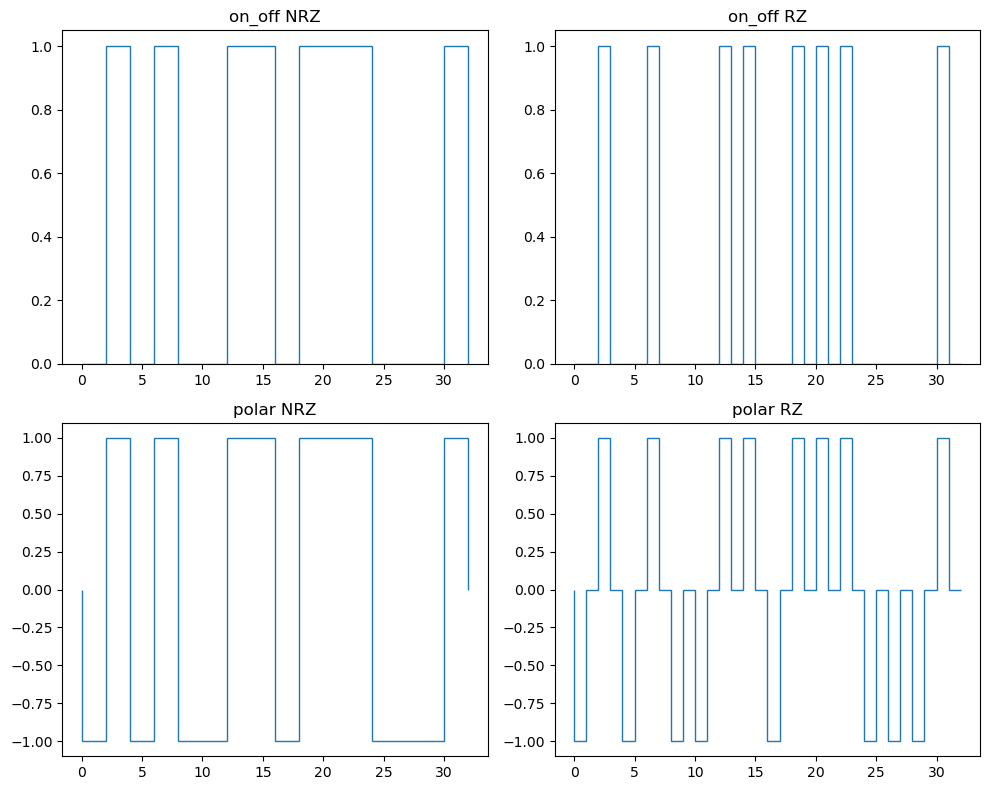

In [6]:
# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# on_off NRZ
pulse0shape = [0,0]
pulse1shape = [1,1]
print("usnig on_off NRZ")
print(PulseShaping(pulse0shape,pulse1shape,sequence))
axs[0, 0].stairs(PulseShaping(pulse0shape, pulse1shape, sequence))
axs[0, 0].set_title('on_off NRZ')
# on_off RZ
pulse0shape = [0,0]
pulse1shape = [1,0]
print("usnig on_off RZ")
print(PulseShaping(pulse0shape,pulse1shape,sequence))
# Plot the on_off RZ output
axs[0, 1].stairs(PulseShaping(pulse0shape, pulse1shape, sequence))
axs[0, 1].set_title('on_off RZ')
# polar NRZ
pulse0shape = [-1,-1]
pulse1shape = [1,1]
print("usnig polar NRZ")
print(PulseShaping(pulse0shape,pulse1shape,sequence))
# Plot the polar NRZ output
axs[1, 0].stairs(PulseShaping(pulse0shape, pulse1shape, sequence))
axs[1, 0].set_title('polar NRZ')
# polar RZ 
pulse0shape = [-1,0]
pulse1shape = [1,0]
print("usnig polar RZ")
print(PulseShaping(pulse0shape,pulse1shape,sequence))
# Plot the polar RZ output
axs[1, 1].stairs(PulseShaping(pulse0shape, pulse1shape, sequence))
axs[1, 1].set_title('polar RZ')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



# 2.3

In [7]:
def AnalogMod(waveform1, waveform2, sampling_freq, carrier_freq):
    time = np.arange(0, len(waveform1) / sampling_freq, 1 / sampling_freq)
    xc = waveform1 * np.cos(2 * np.pi * carrier_freq * time) + waveform2 * np.sin(2 * np.pi * carrier_freq * time)
    return xc

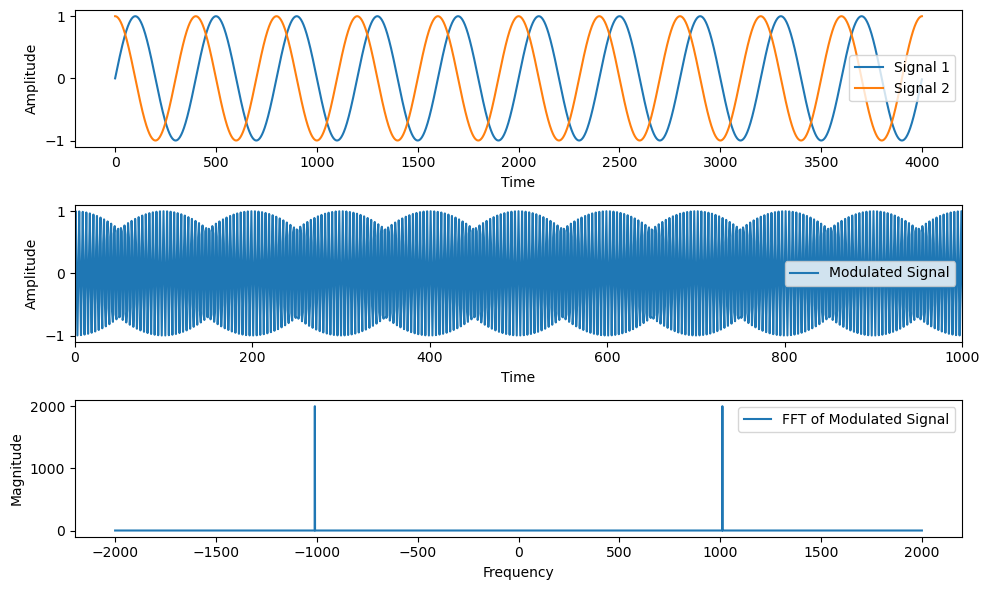

In [8]:
# Define the two signals
sampling_freq = 4000
signal1 = np.sin(2 * np.pi * 10 * np.arange(0, 1, 1/sampling_freq))
signal2 = np.cos(2 * np.pi * 10 * np.arange(0, 1, 1/sampling_freq))

# Set the sampling frequency and carrier frequency
carrier_freq = 1000

# Apply analog modulation
modulated_signal = AnalogMod(signal1, signal2, sampling_freq, carrier_freq)
# Compute the FFT of the modulated signal
fft_modulated_signal = np.fft.fftshift(np.fft.fft(modulated_signal))

# Plot the original signals, the modulated signal, and the FFT
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(signal1, label='Signal 1')
plt.plot(signal2, label='Signal 2')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(modulated_signal, label='Modulated Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(0,1000)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(np.fft.fftshift(np.fft.fftfreq(len(modulated_signal), 1/sampling_freq)),np.abs(fft_modulated_signal), label='FFT of Modulated Signal')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.legend()

plt.tight_layout()
plt.show()


# 2.4

In [9]:
def Channel(input_signal, sampling_freq, center_freq, bandwidth):
    # Compute the FFT of the signal
    fft = np.fft.fftshift(np.fft.fft(input_signal))
    # Compute the frequency bins
    freq = np.fft.fftshift(np.fft.fftfreq(len(input_signal), 1/sampling_freq))
    # Create a rectangular bandpass filter
    bpf = [1 if ((f > center_freq - bandwidth/2) and (f < center_freq + bandwidth/2)) or ((f > -center_freq - bandwidth/2) and (f < -center_freq + bandwidth/2)) else 0 for f in freq]    
    # Apply the filter to the FFT of the signal
    bpf_fft = fft * bpf
    # Compute the inverse FFT of the filtered signal
    out = np.fft.ifft(np.fft.ifftshift(bpf_fft))
    time = np.arange(0, len(input_signal) / sampling_freq, 1 / sampling_freq)
    plt.figure(figsize=(15, 14))
    plt.subplot(3, 1, 1)
    plt.plot(np.abs(freq), np.abs(fft))
    plt.title("Signal before Channel FFT")
    plt.subplot(3, 1, 2)
    plt.plot(np.abs(freq), np.abs(bpf))
    plt.title("Channel")
    plt.subplot(3, 1, 3)
    plt.plot(np.abs(freq), np.abs(bpf_fft))
    plt.title("Signal after Channel FFT")
    return out

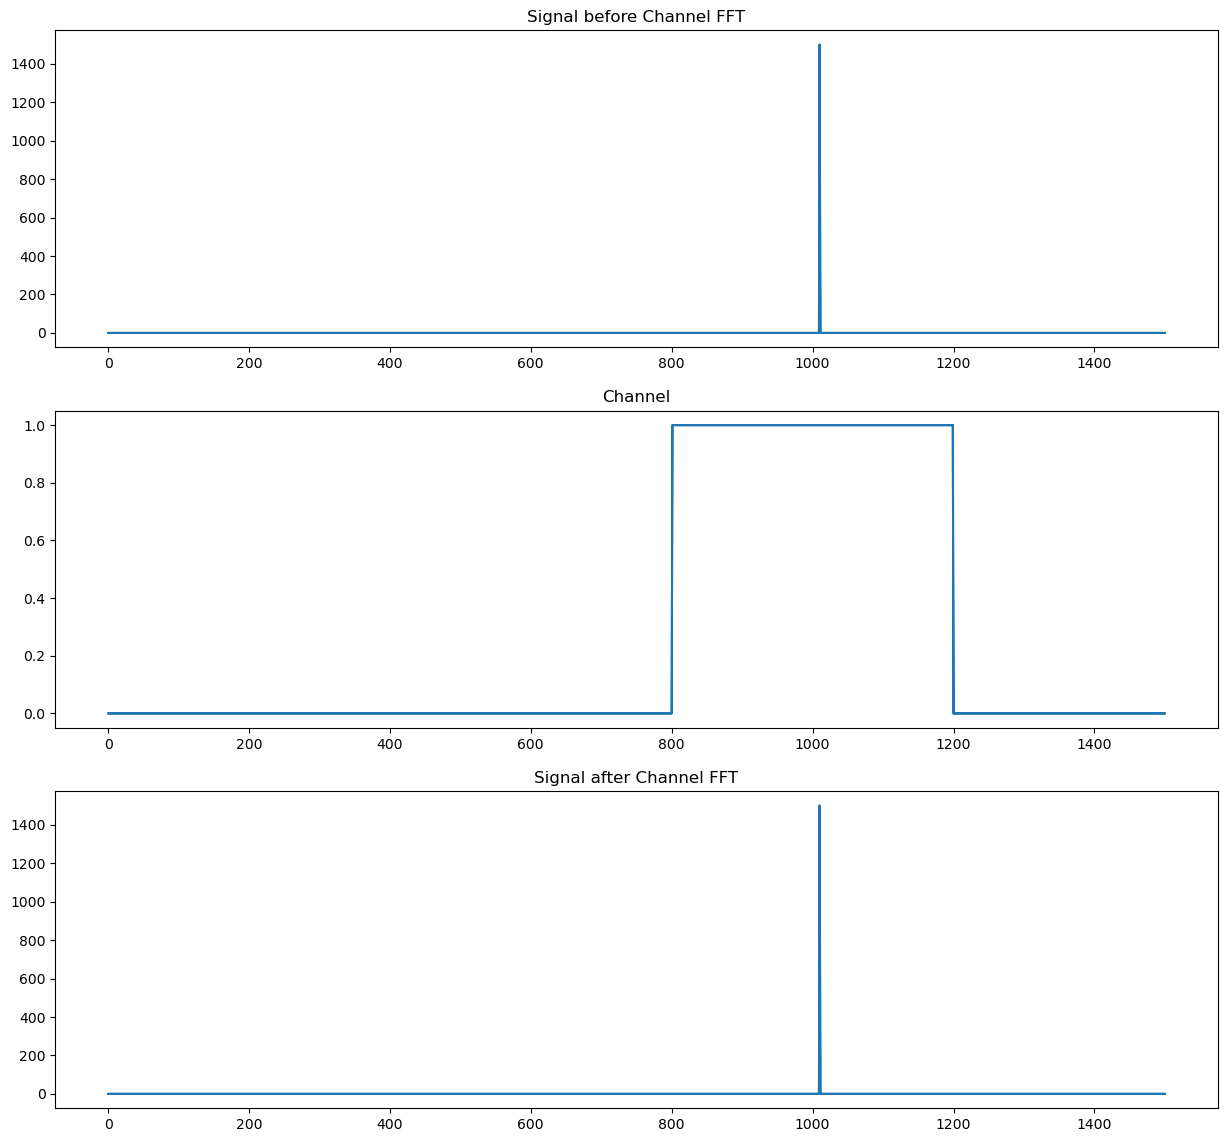

In [10]:
# example that is in the channel bandwidth
t = np.arange(0, 1, 1/3000)
xc = AnalogMod(np.sin(2 * np.pi * 10 * t), np.cos(2 * np.pi * 10 * t), 3000, 1000)
Channel(xc, 3000, 1000, 400)
plt.show()

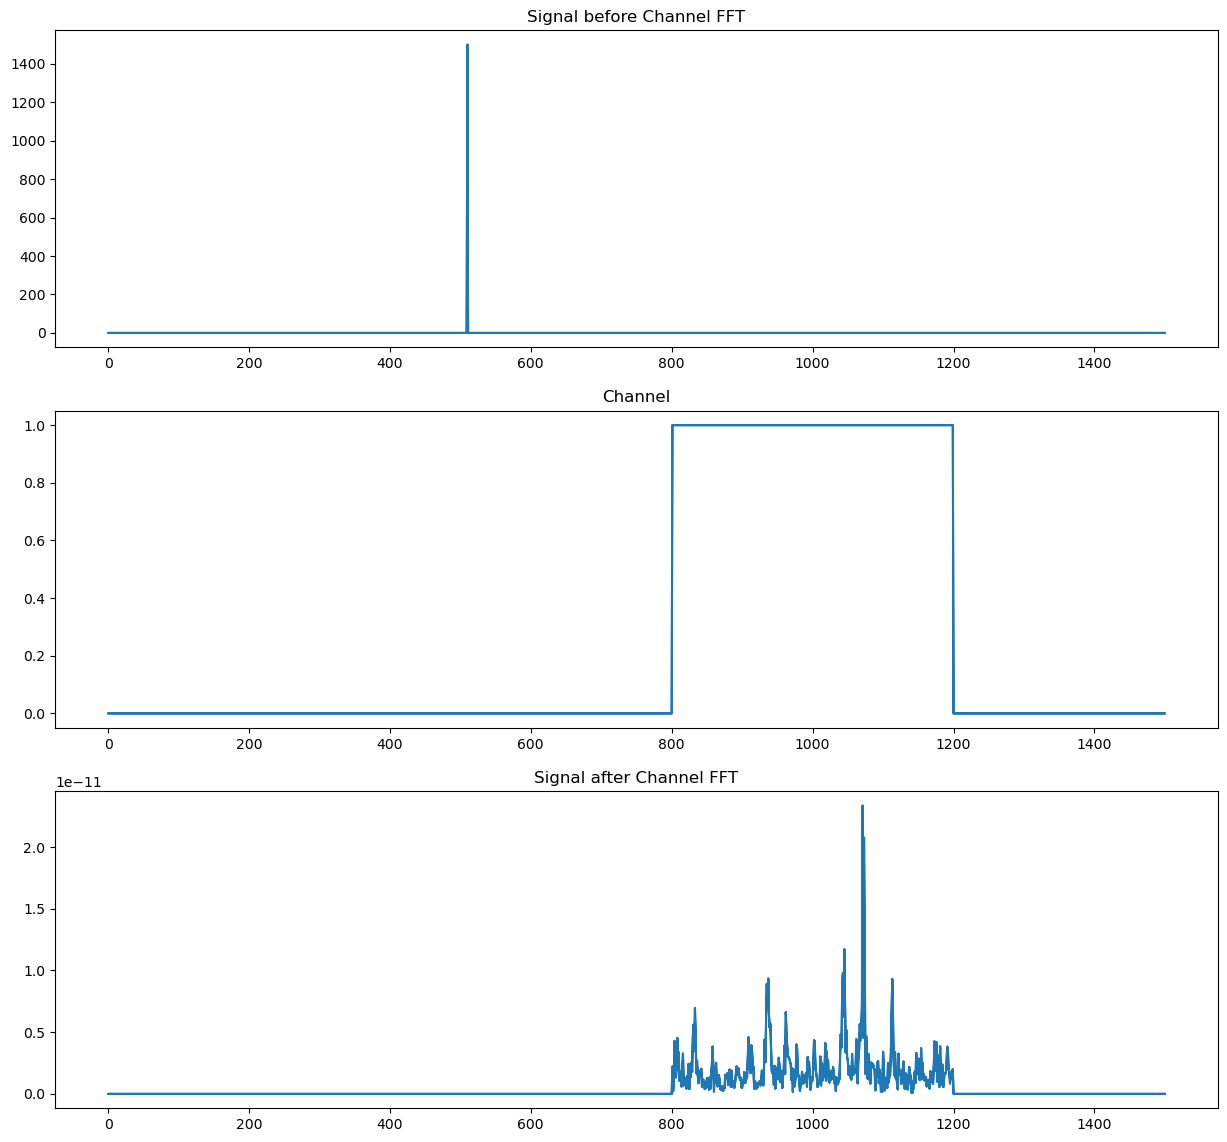

In [11]:
# example that is not in the channel bandwidth
t = np.arange(0, 1, 1/3000)
xc = AnalogMod(np.sin(2 * np.pi * 10 * t), np.cos(2 * np.pi * 10 * t), 3000, 500)
Channel(xc, 3000, 1000, 400)
plt.show()

# 2.5

In [12]:
def AnalogDemod(xc, sampling_freq, carrier_freq, bandwidth):
    # Create the time axis
    time = np.arange(0, len(xc) / sampling_freq, 1 / sampling_freq)
    # Demodulate the input signal
    demodulated_signal1 = xc * np.cos(2 * np.pi * carrier_freq * time)
    demodulated_signal2 = xc * np.sin(2 * np.pi * carrier_freq * time)
    # Design the low-pass filter
    freq = np.fft.fftshift(np.fft.fftfreq(len(xc), 1/sampling_freq))
    lpf = [1 if ((f > -bandwidth/2) and (f < bandwidth/2)) else 0 for f in freq]
    # Apply the low-pass filter
    lpf_demodulated_signal1 = 2*np.fft.fftshift(np.fft.fft(demodulated_signal1)) * lpf
    lpf_demodulated_signal2 = 2*np.fft.fftshift(np.fft.fft(demodulated_signal2)) * lpf
    # Split the filtered signal into two demodulated waveforms
    y1 = np.fft.ifft(np.fft.ifftshift(lpf_demodulated_signal1))
    y2 = np.fft.ifft(np.fft.ifftshift(lpf_demodulated_signal2))
    
    return y1, y2

c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


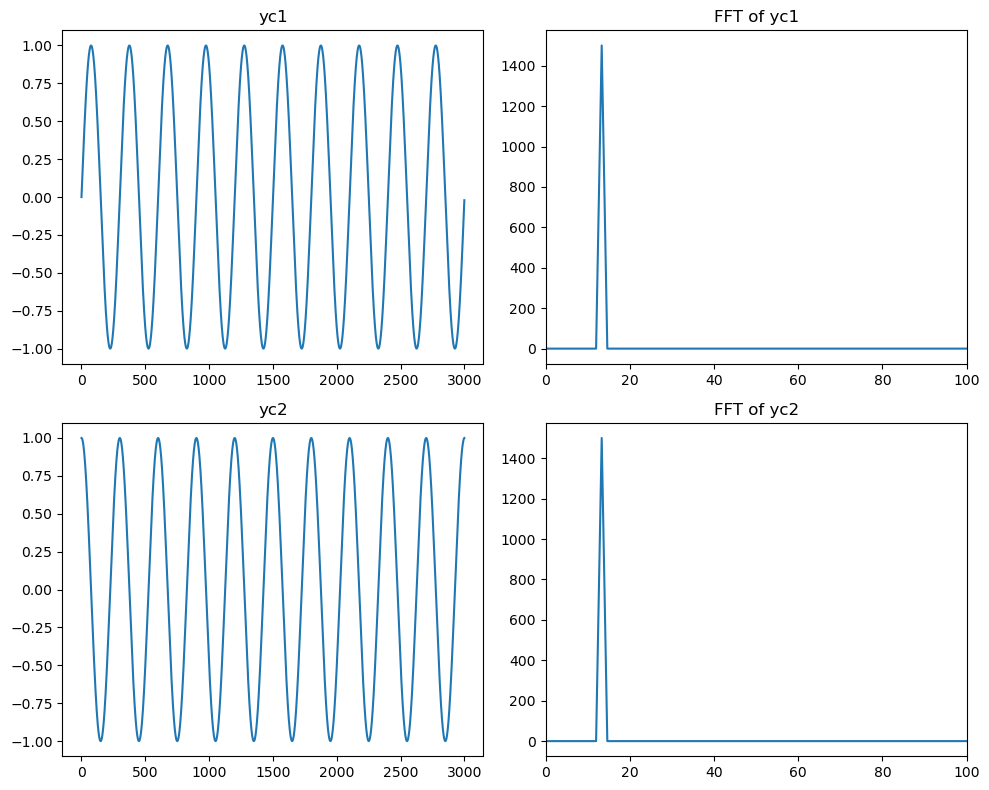

In [13]:
t = np.arange(0, 1, 1/3000)
xc = AnalogMod(np.sin(2 * np.pi * 10 * t), np.cos(2 * np.pi * 10 * t), 3000, 1000)
yc1, yc2 = AnalogDemod(xc,3000,1000,600)

# Compute the FFT of yc1 and yc2
fft_yc1 = np.fft.fftshift(np.fft.fft(yc1))
fft_yc2 = np.fft.fftshift(np.fft.fft(yc2))

freq = np.fft.fftshift(np.fft.fftfreq(len(xc), 1/sampling_freq))


# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot yc1 in the first subplot
axs[0, 0].plot(yc1)
axs[0, 0].set_title('yc1')

# Plot the FFT of yc1 in the second subplot
axs[0, 1].plot(freq, np.abs(fft_yc1))
axs[0, 1].set_title('FFT of yc1')
axs[0, 1].set_xlim(0, 100)  # Set x-axis limits to 0 to 100

# Plot yc2 in the third subplot
axs[1, 0].plot(yc2)
axs[1, 0].set_title('yc2')

# Plot the FFT of yc2 in the fourth subplot
axs[1, 1].plot(freq, np.abs(fft_yc2))
axs[1, 1].set_title('FFT of yc2')
axs[1, 1].set_xlim(0, 100)  # Set x-axis limits to 0 to 100

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()




# 2.6

In [23]:
def MatchedFilt(signal, pulse_one, pulse_zero):
    filter_one = np.flip(pulse_one)
    filter_zero = np.flip(pulse_zero)

    filter_one_fft = np.fft.fft(filter_one)
    filter_zero_fft = np.fft.fft(filter_zero)

    signal_one = np.zeros_like(signal, dtype=np.complex128)
    signal_zero = np.zeros_like(signal, dtype=np.complex128)

    pulse_length = len(pulse_one)
    for i in range(0, len(signal), pulse_length):
        signal_fft = np.fft.fft(signal[i:i + pulse_length])
        signal_one[i:i + pulse_length] = np.fft.ifft(signal_fft * filter_one_fft)
        signal_zero[i:i + pulse_length] = np.fft.ifft(signal_fft * filter_zero_fft)

    matched_filter_one = signal_one[pulse_length - 1::pulse_length]
    matched_filter_zero = signal_zero[pulse_length - 1::pulse_length]

    detected_bits = np.array([1 if matched_filter_one[i] > matched_filter_zero[i] else 0 for i in range(len(matched_filter_one))])

    return matched_filter_one, matched_filter_zero, detected_bits

# 3

In [14]:
fs = 1000000
pulse_duration = 0.01
fc = 10000
f_center = 10000
bw = 1000

# 3.1.a

in 1 second we have 1000000 samples and pulse duration in 0.01 s so in every pulse duration we have 10000 samples

In [15]:
pulse1 = np.concatenate((np.full(int(pulse_duration*fs), 1), np.zeros(int(pulse_duration*fs))))
pulse0 = np.concatenate((np.full(int(pulse_duration*fs), -1), np.zeros(int(pulse_duration*fs))))

sequence_long = np.random.randint(2, size = 1000)

output of divider

for visible outputs i limited x on 50 but the sequence len is 1000 

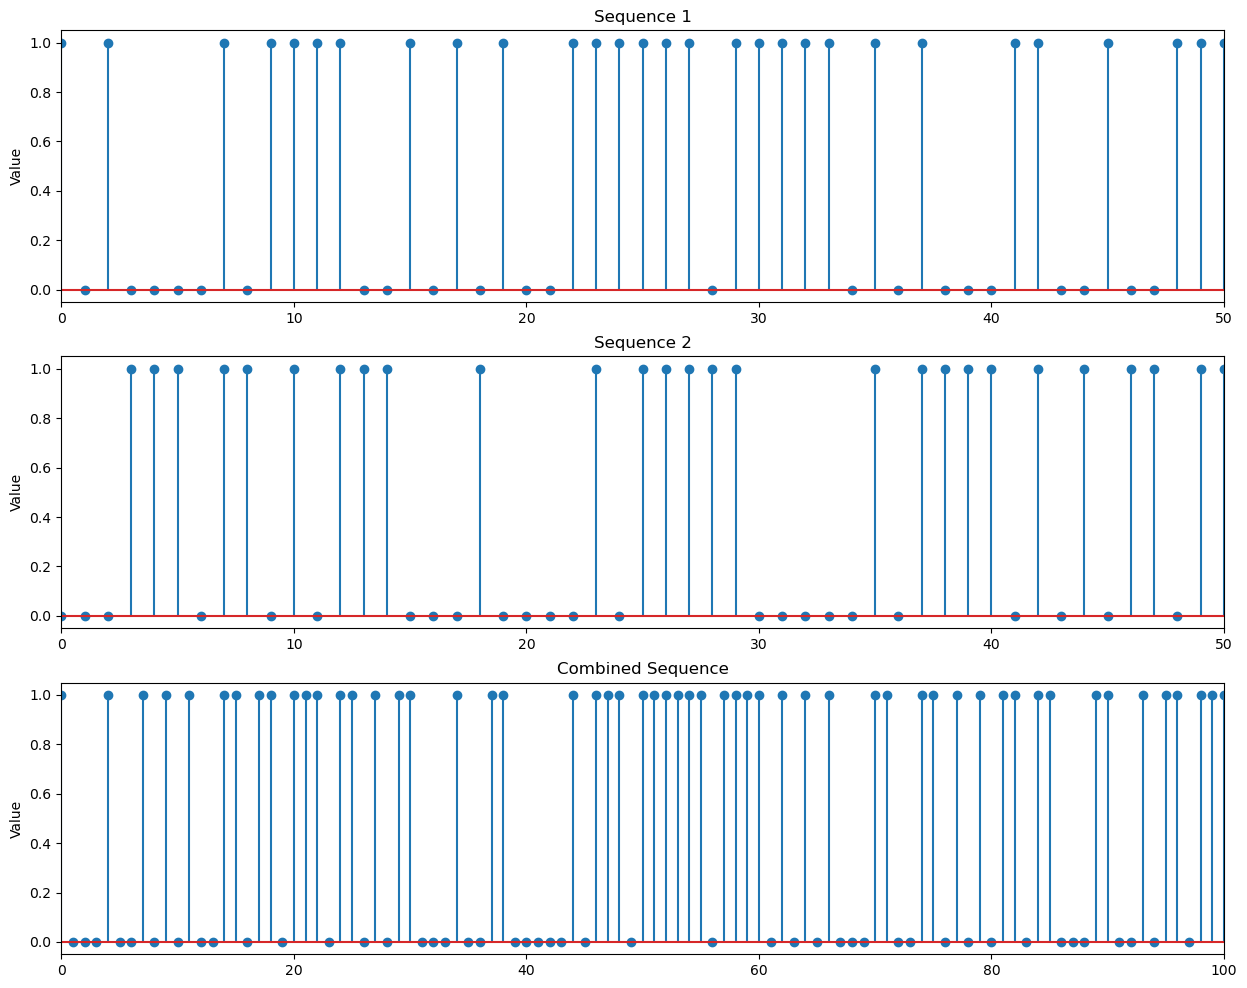

In [16]:
b1 , b2 = Divide(sequence_long)

plt.figure(figsize=(15, 12))
plt.subplot(3,1,1)
plt.stem(np.arange(len(b1)),b1)
plt.xlim(0,50)
plt.title('Sequence 1')
plt.ylabel('Value')

plt.subplot(3,1,2)
plt.stem(np.arange(len(b2)),b2)
plt.xlim(0,50)
plt.title('Sequence 2')
plt.ylabel('Value')

plt.subplot(3,1,3)
plt.stem(np.arange(len(sequence_long)),sequence_long)
plt.xlim(0,100)
plt.title('Combined Sequence')
plt.ylabel('Value')

plt.show()


output of pulse shaping

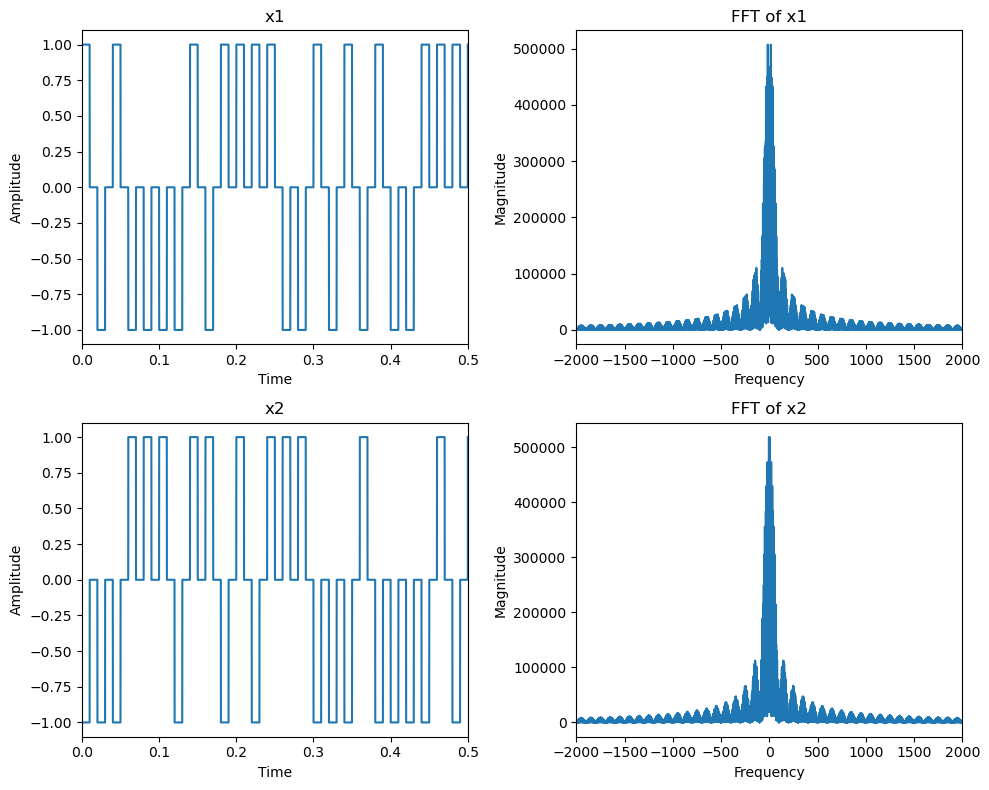

In [17]:
x1 = PulseShaping(pulse0,pulse1,b1)
x2 = PulseShaping(pulse0,pulse1,b2)
time = np.arange(0, len(sequence_long)*pulse_duration, 1/fs)

# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot x1 in the first subplot
axs[0, 0].plot(time, x1)
axs[0, 0].set_title('x1')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].set_xlim(0,0.5)

# Compute the FFT of x1
fft_x1 = np.fft.fftshift(np.fft.fft(x1))
freq_x1 = np.fft.fftshift(np.fft.fftfreq(len(x1), 1/fs))

# Plot the FFT of x1 in the second subplot
axs[0, 1].plot(freq_x1, np.abs(fft_x1))
axs[0, 1].set_title('FFT of x1')
axs[0, 1].set_xlabel('Frequency')
axs[0, 1].set_ylabel('Magnitude')
axs[0, 1].set_xlim(-2000,2000)

# Plot x2 in the third subplot
axs[1, 0].plot(time, x2)
axs[1, 0].set_title('x2')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Amplitude')
axs[1, 0].set_xlim(0,0.5)

# Compute the FFT of x2
fft_x2 = np.fft.fftshift(np.fft.fft(x2))
freq_x2 = np.fft.fftshift(np.fft.fftfreq(len(x2), 1/fs))

# Plot the FFT of x2 in the fourth subplot
axs[1, 1].plot(freq_x2, np.abs(fft_x2))
axs[1, 1].set_title('FFT of x2')
axs[1, 1].set_xlabel('Frequency')
axs[1, 1].set_ylabel('Magnitude')
axs[1, 1].set_xlim(-2000,2000)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



output of AnalogMod

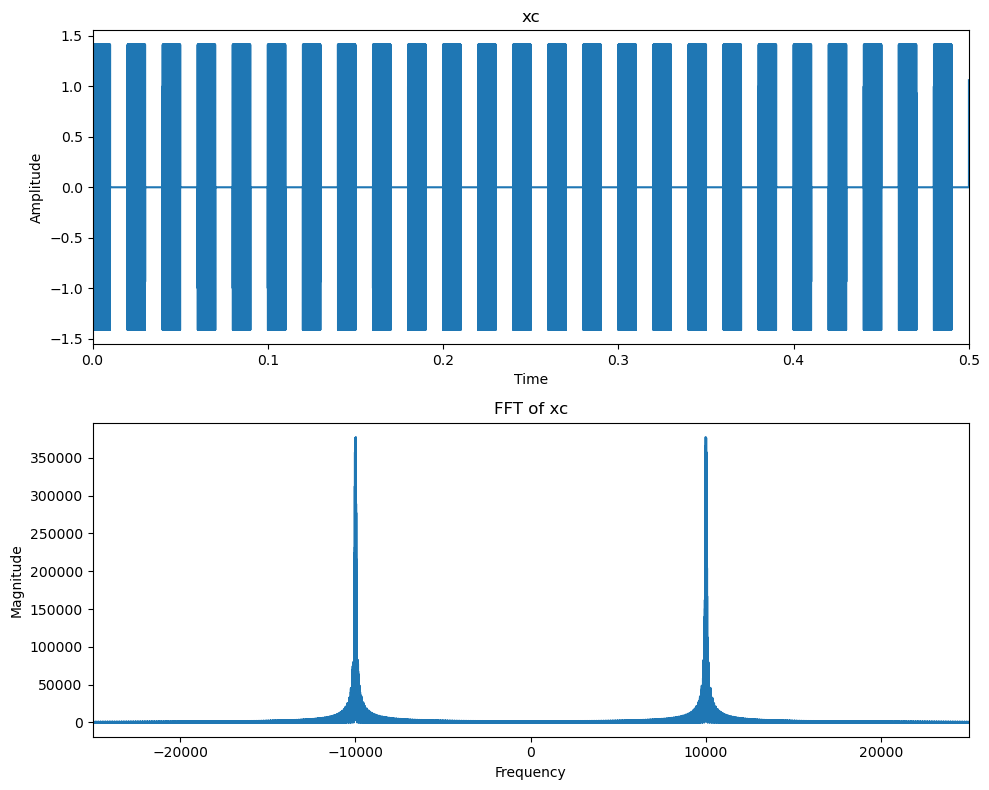

In [18]:
xc = AnalogMod(x1,x2,fs,fc)

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot xc in the first subplot
axs[0].plot(time, xc)
axs[0].set_title('xc')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')
axs[0].set_xlim(0,0.5)

# Compute the FFT of xc
fft_xc = np.fft.fftshift(np.fft.fft(xc))
freq_xc = np.fft.fftshift(np.fft.fftfreq(len(xc), 1/fs))

# Plot the FFT of xc in the second subplot
axs[1].plot(freq_xc, np.abs(fft_xc))
axs[1].set_title('FFT of xc')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlim(-25000,25000)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


output of Channel

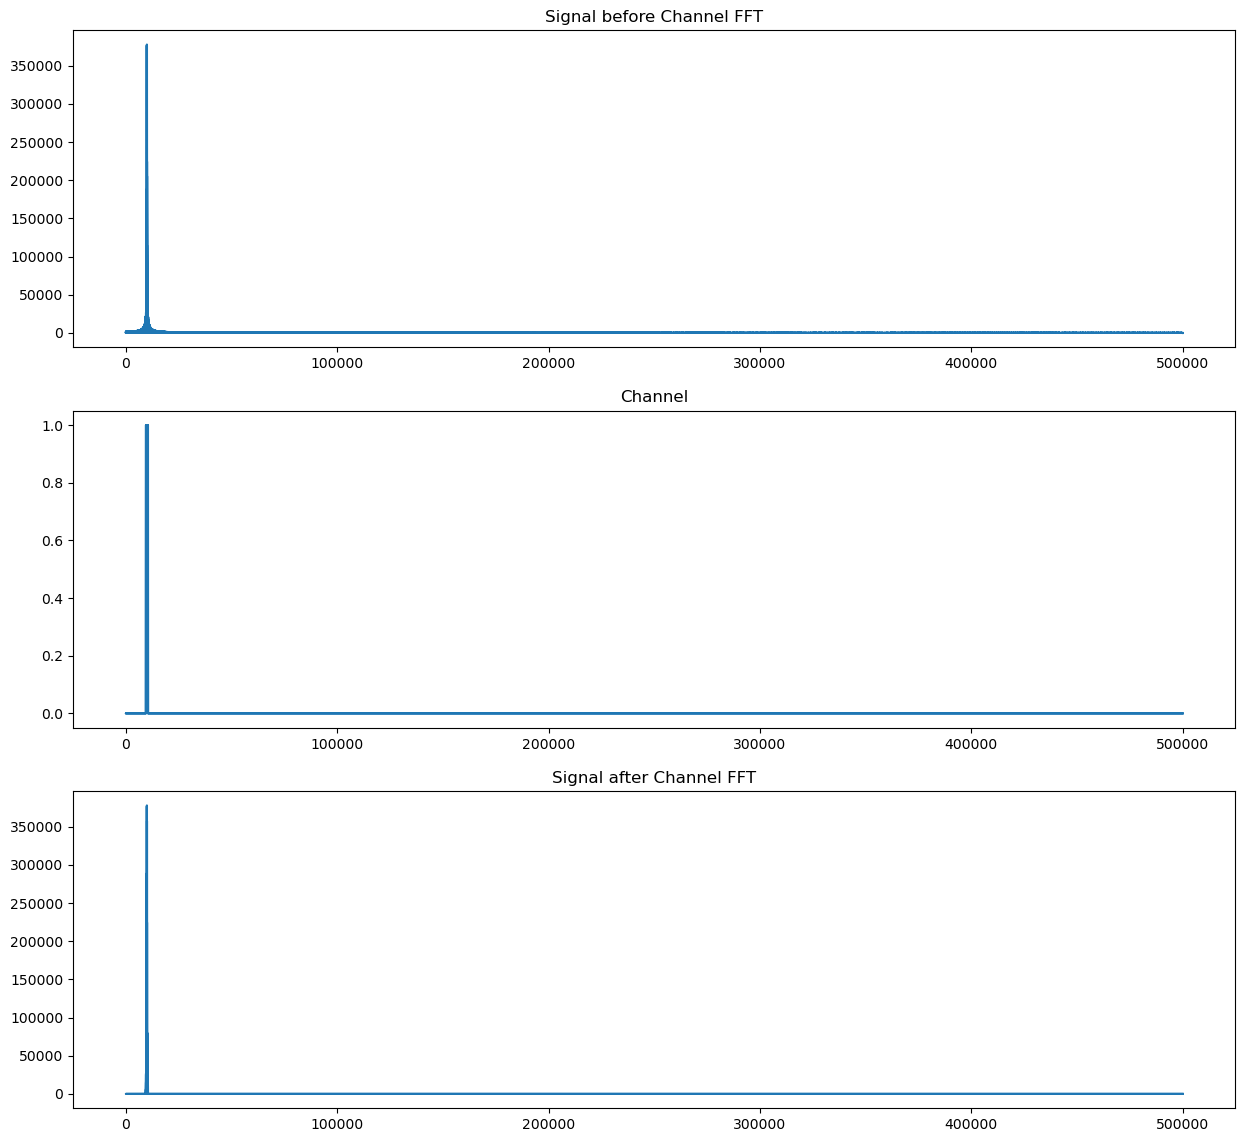

In [19]:
xcr = Channel(xc,fs,f_center,bw)

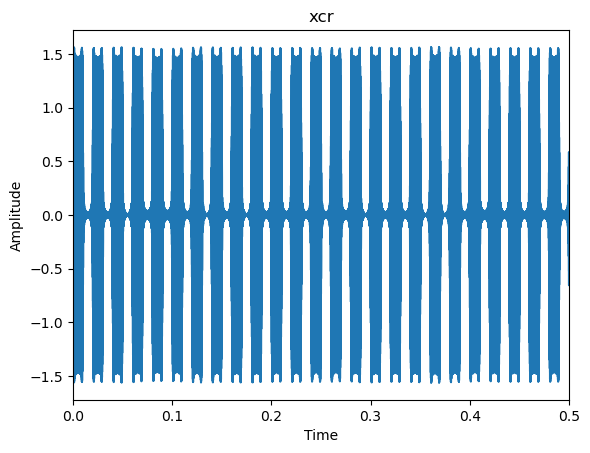

In [20]:
plt.plot(time, xcr)
plt.title('xcr')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(0, 0.5)
plt.show()

output of AnalogDemod

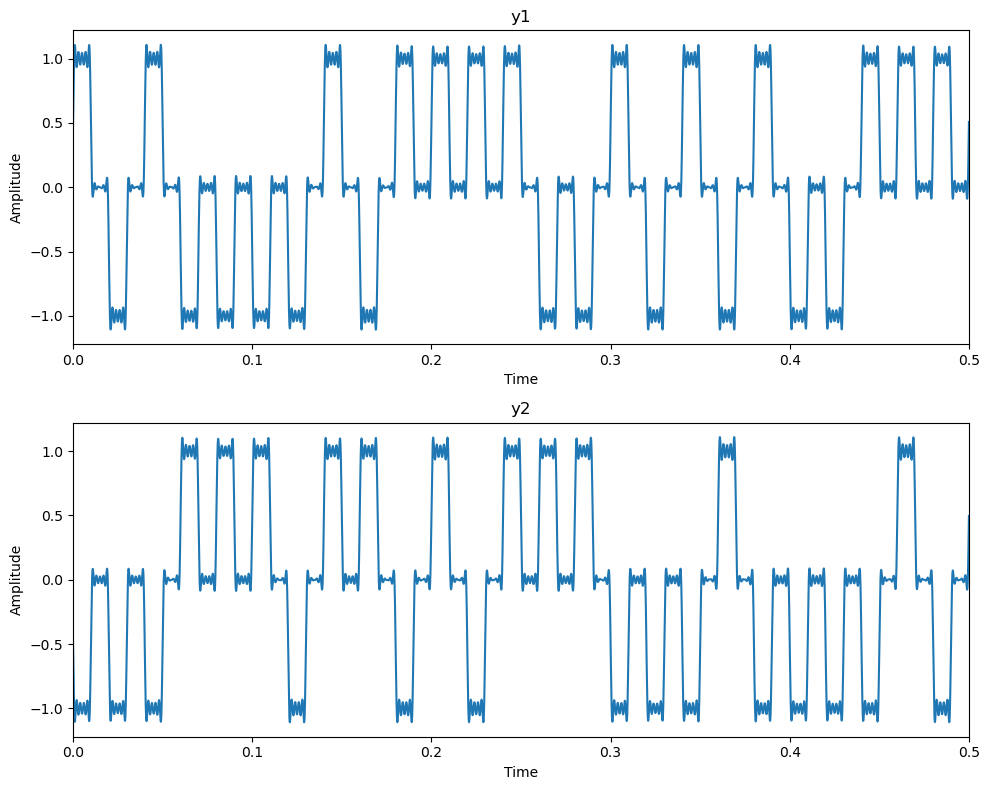

In [21]:
y1 , y2 = AnalogDemod(xcr,fs,fc,bw)

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot y1 in the first subplot
axs[0].plot(time, y1)
axs[0].set_title('y1')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')
axs[0].set_xlim(0, 0.5)  # Set x-axis limits to 0 to 0.5

# Plot y2 in the second subplot
axs[1].plot(time, y2)
axs[1].set_title('y2')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')
axs[1].set_xlim(0, 0.5)  # Set x-axis limits to 0 to 0.5

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


output of MatchedFilter

c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


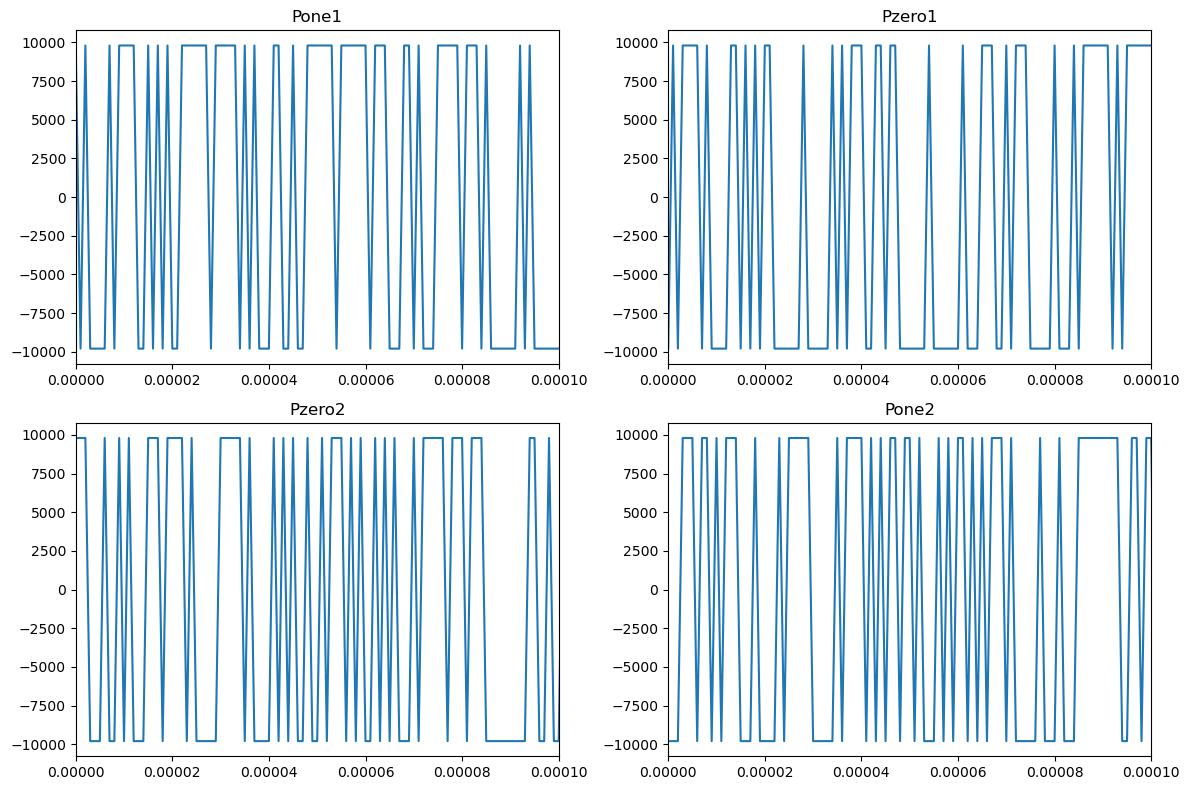

In [37]:
Pone1, Pzero1, bhat1 = MatchedFilt(y1, pulse1, pulse0)
Pone2, Pzero2, bhat2 = MatchedFilt(y2, pulse1, pulse0)

# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Pone1 in the first subplot
axs[0, 0].plot(np.arange(len(Pone1))/fs, Pone1)
axs[0, 0].set_title('Pone1')
axs[0, 0].set_xlim(0, 0.0001)

# Plot Pzero1 in the second subplot
axs[0, 1].plot(np.arange(len(Pzero1))/fs, Pzero1)
axs[0, 1].set_title('Pzero1')
axs[0, 1].set_xlim(0, 0.0001)

# Plot bhat1 in the third subplot
axs[1, 0].plot(np.arange(len(Pzero2))/fs, Pzero2)
axs[1, 0].set_title('Pzero2')
axs[1, 0].set_xlim(0, 0.0001)

# Plot Pone2 in the fourth subplot
axs[1, 1].plot(np.arange(len(Pone2))/fs, Pone2)
axs[1, 1].set_title('Pone2')
axs[1, 1].set_xlim(0, 0.0001)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


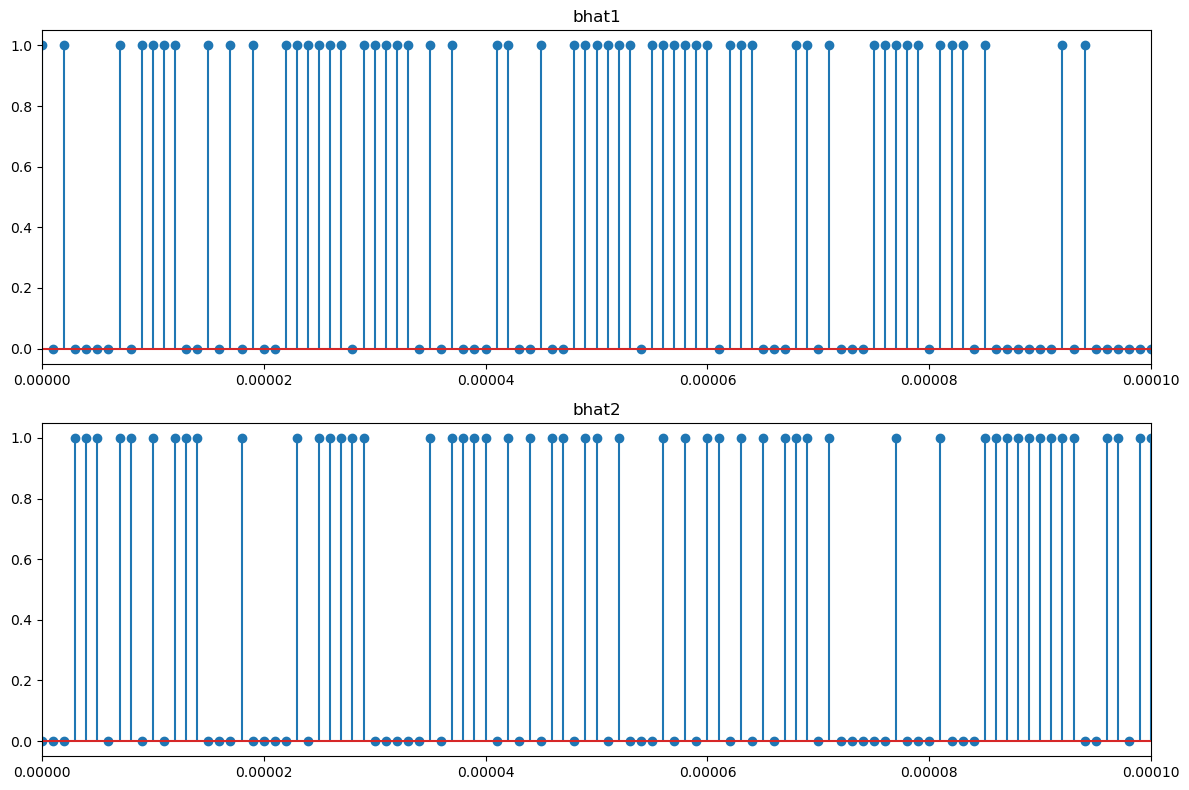

In [35]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].stem(np.arange(len(bhat1))/fs, bhat1)
axs[0].set_title('bhat1')
axs[0].set_xlim(0, 0.0001)

axs[1].stem(np.arange(len(bhat2))/fs, bhat2)
axs[1].set_title('bhat2')
axs[1].set_xlim(0, 0.0001)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


output of Combine

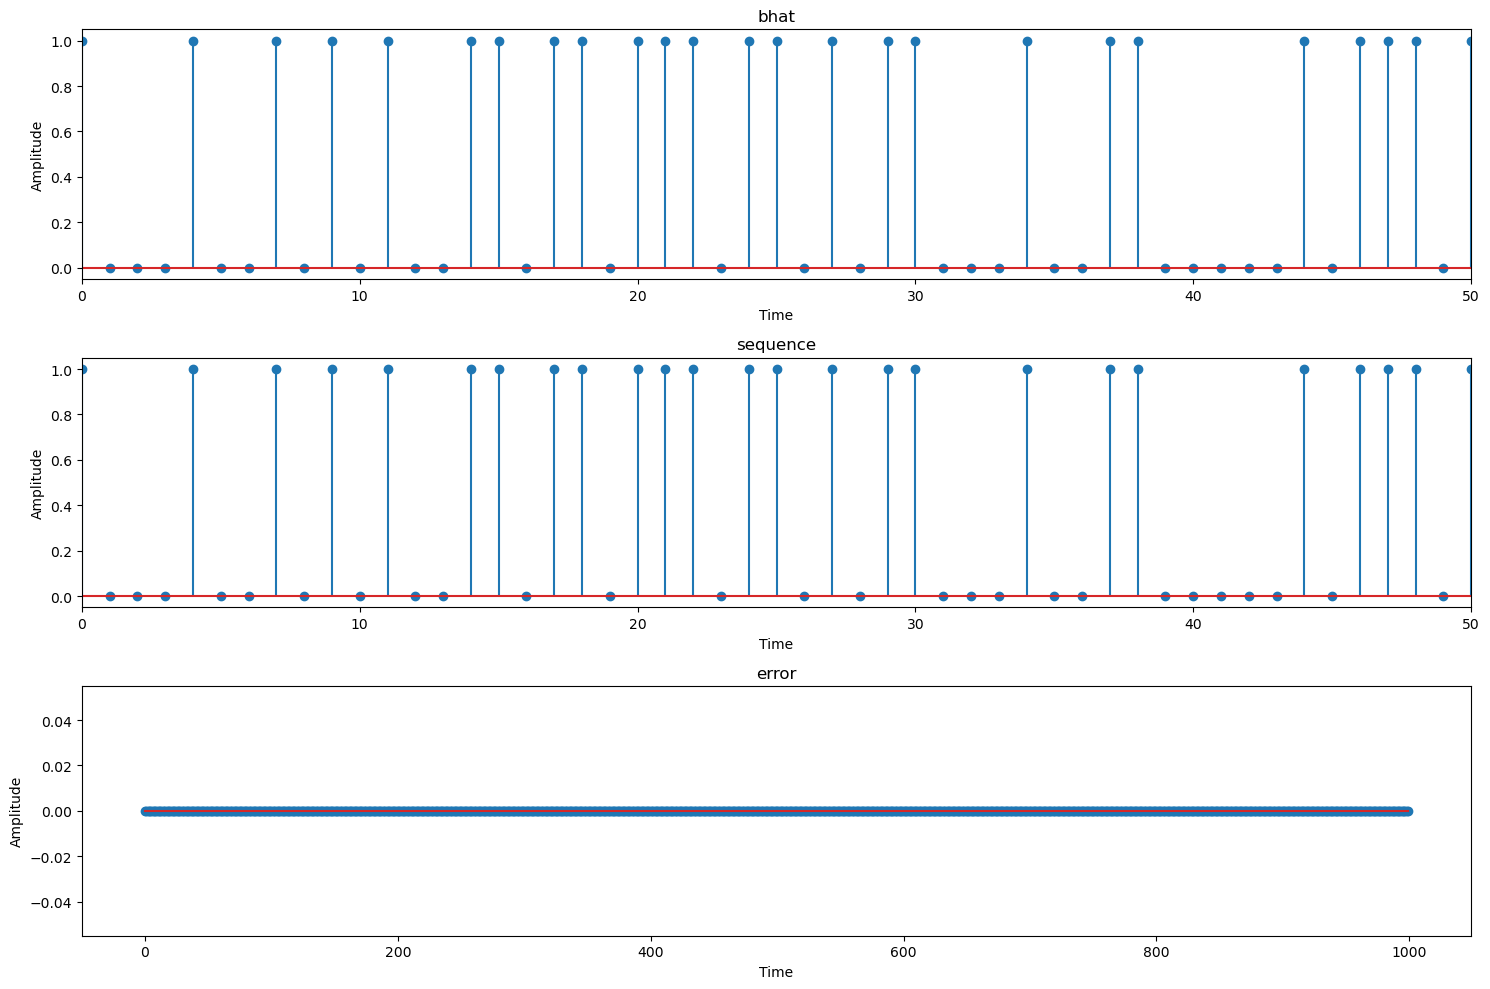

In [42]:
bhat = Combine(bhat1,bhat2)

plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
plt.stem(bhat)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('bhat')
plt.xlim(0, 50)

plt.subplot(3,1,2)
plt.stem(sequence_long)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('sequence')
plt.xlim(0, 50)

plt.subplot(3,1,3)
plt.stem(bhat-sequence_long)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('error')
#plt.xlim(0, 50)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# 3.1.b

In [53]:
error = []
# Define the parameters for the AWGN
mean = 0  # Mean of the Gaussian distribution
for i in range(50) :
    # Generate the AWGN
    noise = np.random.normal(mean, 4*i, len(xcr))
    xcr_noisy = xcr + noise
    y1_noisy , y2_noisy = AnalogDemod(xcr_noisy,fs,fc,bw)
    _ , _ , bhat1_noisy = MatchedFilt(y1_noisy,pulse1,pulse0)
    _ , _ , bhat2_noisy = MatchedFilt(y2_noisy,pulse1,pulse0)
    bhat_noisy = Combine(bhat1_noisy,bhat2_noisy)
    error.append(np.sum((bhat_noisy - sequence_long) ** 2) / len(sequence_long))


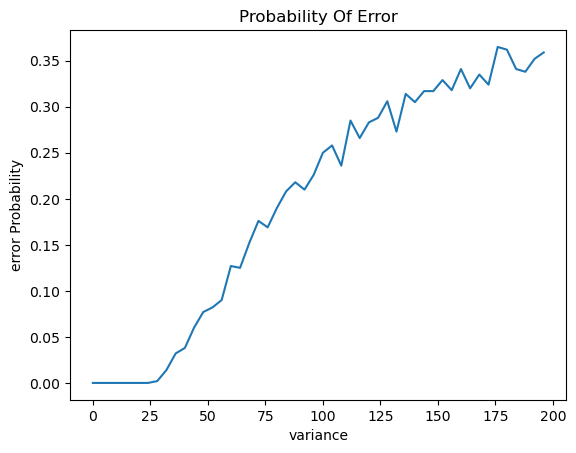

In [54]:
plt.figure()
plt.plot(np.arange(0, 200, 4) , error)
plt.title('Probability Of Error')
plt.xlabel('variance')
plt.ylabel('error Probability')
plt.show()

# 3.1.c

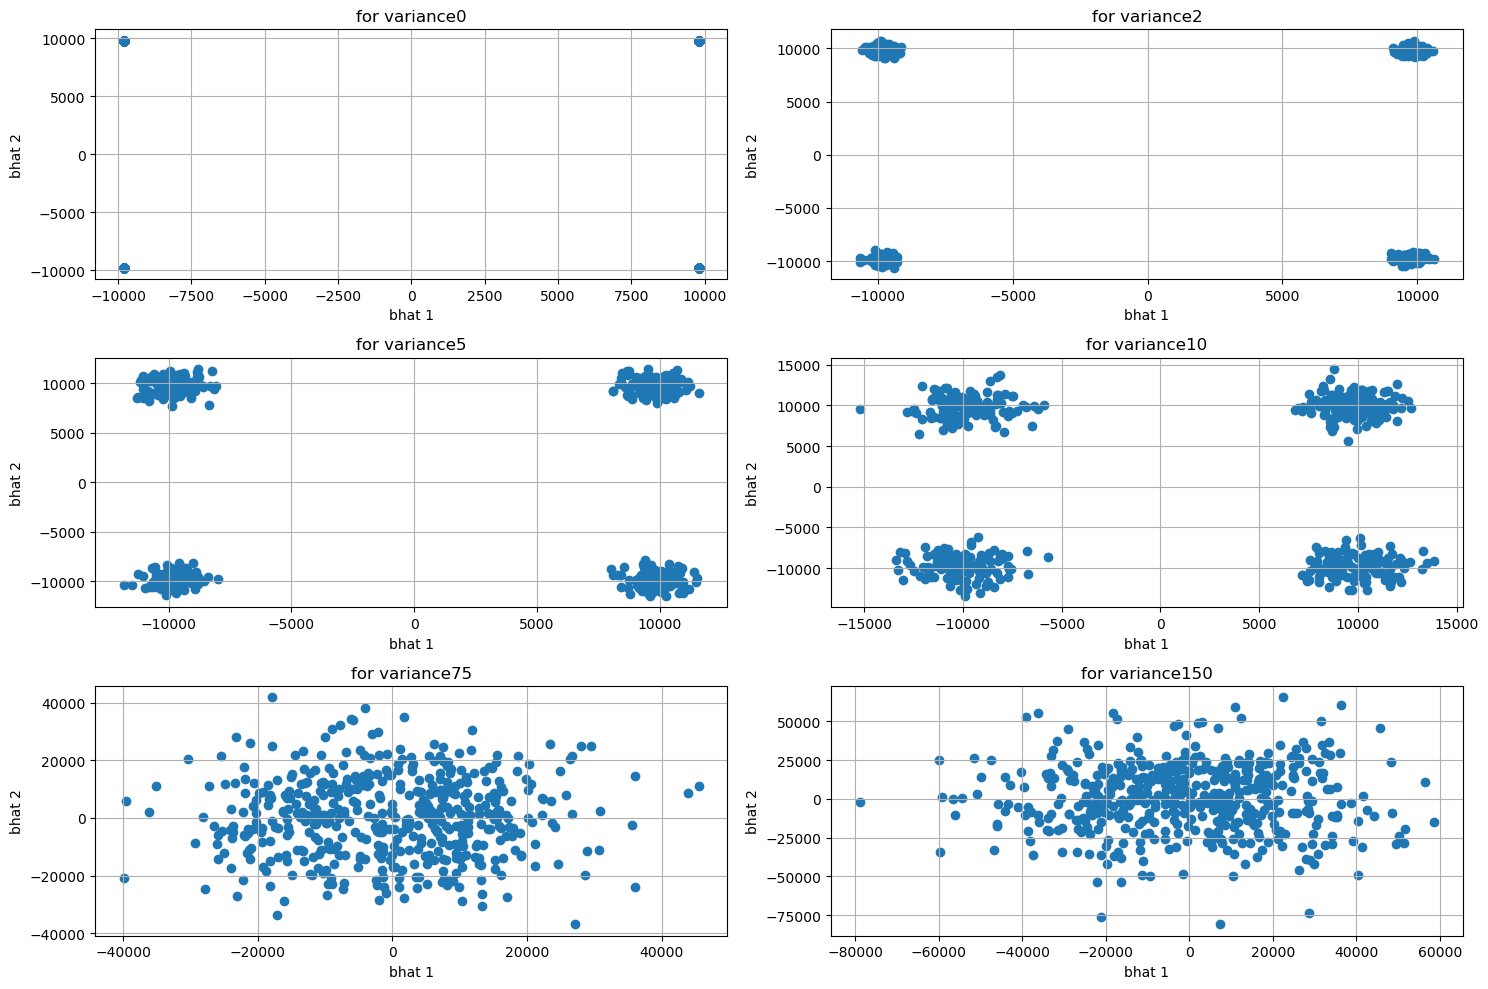

In [58]:
variance = [0,2,5,10,75,150]
countplot = 1
plt.figure(figsize=(15, 10))
for i in variance :
    noise = np.random.normal(mean, i, len(xcr))
    xcr_noisy = xcr + noise
    y1_noisy , y2_noisy = AnalogDemod(xcr_noisy,fs,fc,bw)
    plot1 , _ , bhat1_noisy = MatchedFilt(y1_noisy,pulse1,pulse0)
    plot2 , _ , bhat2_noisy = MatchedFilt(y2_noisy,pulse1,pulse0)
    bhat_noisy = Combine(bhat1_noisy,bhat2_noisy)
    plt.subplot(3,2,countplot)
    plt.scatter(plot1, plot2)
    string = str(i)
    plt.title('for variance'+string)
    plt.xlabel('bhat 1')
    plt.ylabel('bhat 2')
    plt.grid(True)
    countplot = countplot + 1
    
plt.tight_layout()
plt.show()


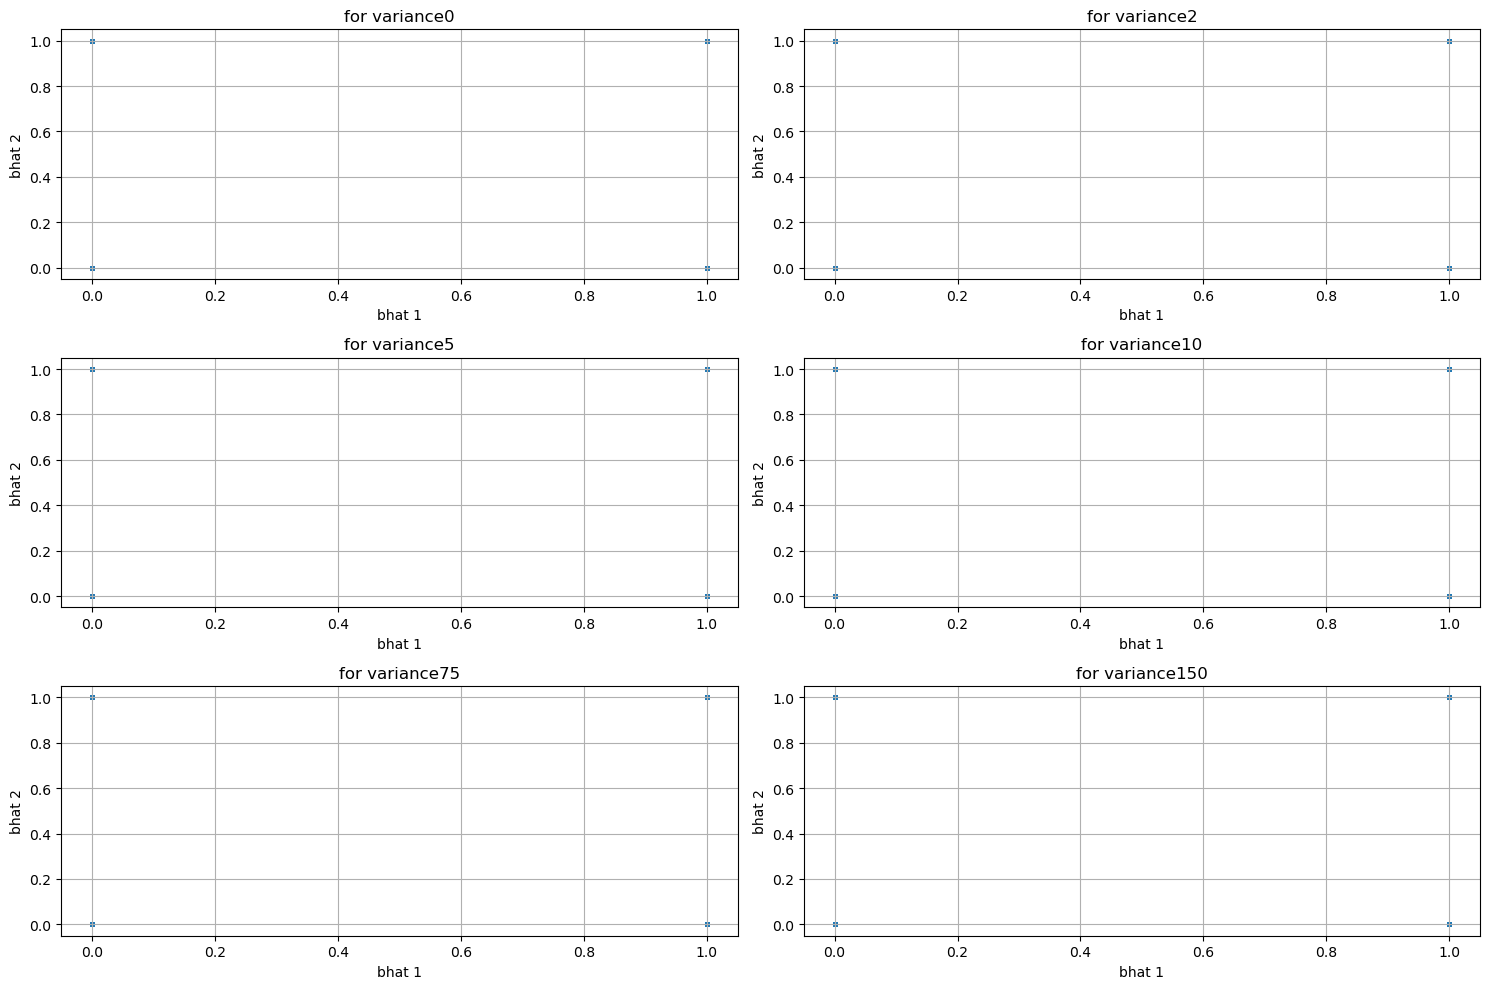

In [59]:
variance = [0,2,5,10,75,150]
countplot = 1
plt.figure(figsize=(15, 10))
for i in variance :
    noise = np.random.normal(mean, i, len(xcr))
    xcr_noisy = xcr + noise
    y1_noisy , y2_noisy = AnalogDemod(xcr_noisy,fs,fc,bw)
    plot1 , _ , bhat1_noisy = MatchedFilt(y1_noisy,pulse1,pulse0)
    plot2 , _ , bhat2_noisy = MatchedFilt(y2_noisy,pulse1,pulse0)
    bhat_noisy = Combine(bhat1_noisy,bhat2_noisy)
    plt.subplot(3,2,countplot)
    plt.scatter(bhat1_noisy, bhat2_noisy, s=5)
    string = str(i)
    plt.title('for variance'+string)
    plt.xlabel('bhat 1')
    plt.ylabel('bhat 2')
    plt.grid(True)
    countplot = countplot + 1
    
plt.tight_layout()
plt.show()


# 3.2.a

In [60]:
t = np.arange(0, 10000) / fs
pulse1 = np.sin(2 * np.pi * 500 * t) 
pulse0 = -np.sin(2 * np.pi * 500 * t)

output of Divide

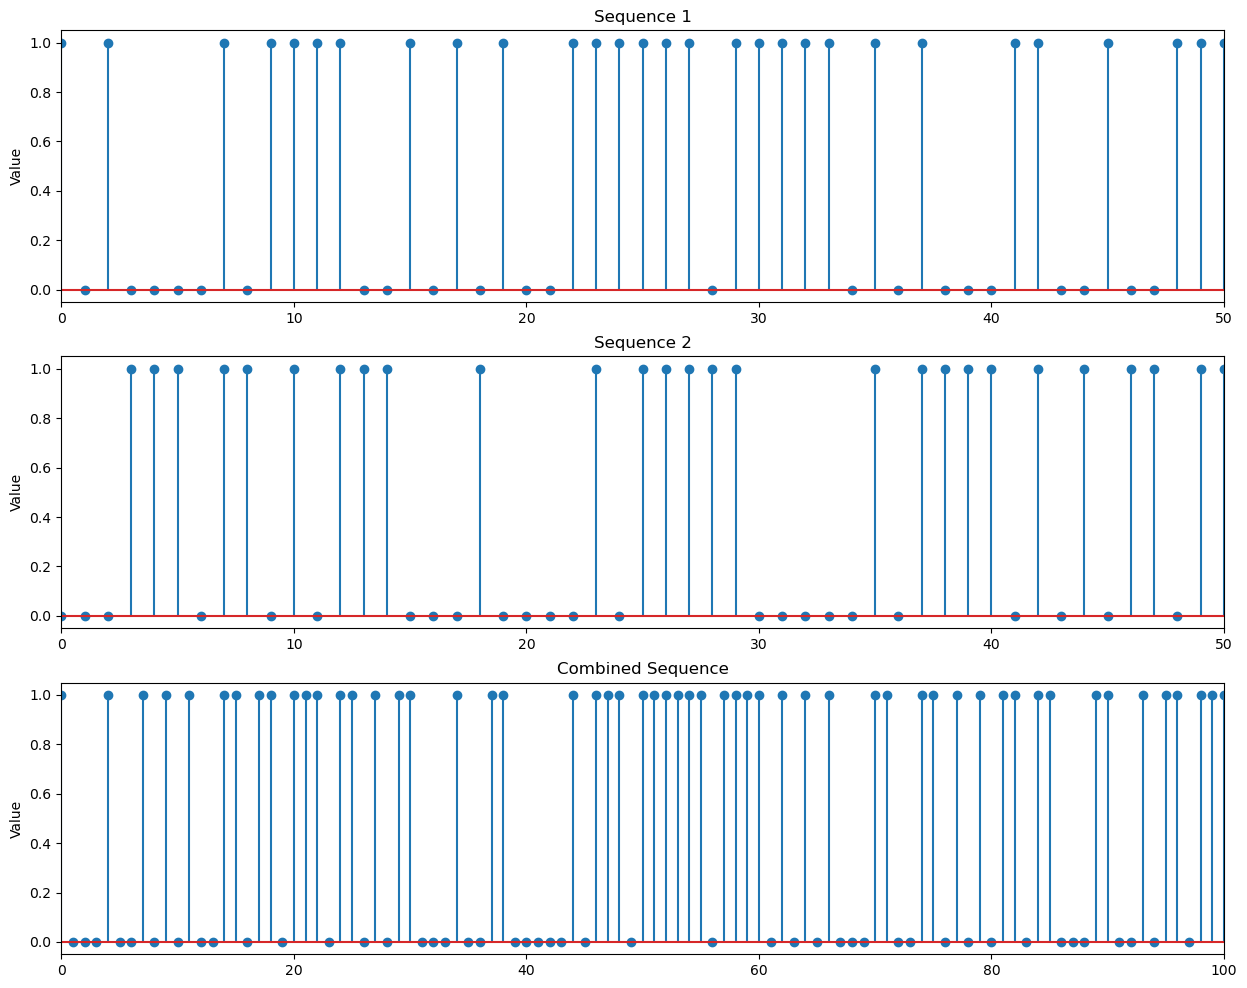

In [61]:
b1 , b2 = Divide(sequence_long)

plt.figure(figsize=(15, 12))
plt.subplot(3,1,1)
plt.stem(np.arange(len(b1)),b1)
plt.xlim(0,50)
plt.title('Sequence 1')
plt.ylabel('Value')

plt.subplot(3,1,2)
plt.stem(np.arange(len(b2)),b2)
plt.xlim(0,50)
plt.title('Sequence 2')
plt.ylabel('Value')

plt.subplot(3,1,3)
plt.stem(np.arange(len(sequence_long)),sequence_long)
plt.xlim(0,100)
plt.title('Combined Sequence')
plt.ylabel('Value')

plt.show()


output of PulseShaping

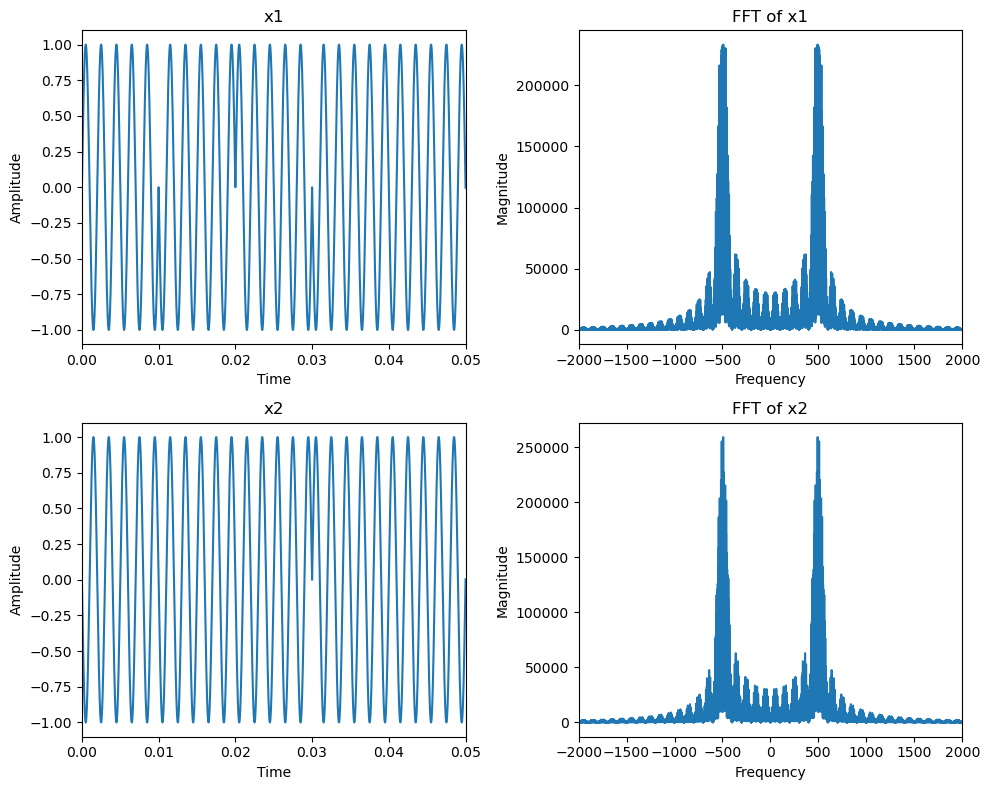

In [64]:
x1 = PulseShaping(pulse0,pulse1,b1)
x2 = PulseShaping(pulse0,pulse1,b2)
time = np.arange(0, len(sequence_long)*pulse_duration/2, 1/fs)

# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot x1 in the first subplot
axs[0, 0].plot(time, x1)
axs[0, 0].set_title('x1')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].set_xlim(0,0.05)

# Compute the FFT of x1
fft_x1 = np.fft.fftshift(np.fft.fft(x1))
freq_x1 = np.fft.fftshift(np.fft.fftfreq(len(x1), 1/fs))

# Plot the FFT of x1 in the second subplot
axs[0, 1].plot(freq_x1, np.abs(fft_x1))
axs[0, 1].set_title('FFT of x1')
axs[0, 1].set_xlabel('Frequency')
axs[0, 1].set_ylabel('Magnitude')
axs[0, 1].set_xlim(-2000,2000)

# Plot x2 in the third subplot
axs[1, 0].plot(time, x2)
axs[1, 0].set_title('x2')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Amplitude')
axs[1, 0].set_xlim(0,0.05)

# Compute the FFT of x2
fft_x2 = np.fft.fftshift(np.fft.fft(x2))
freq_x2 = np.fft.fftshift(np.fft.fftfreq(len(x2), 1/fs))

# Plot the FFT of x2 in the fourth subplot
axs[1, 1].plot(freq_x2, np.abs(fft_x2))
axs[1, 1].set_title('FFT of x2')
axs[1, 1].set_xlabel('Frequency')
axs[1, 1].set_ylabel('Magnitude')
axs[1, 1].set_xlim(-2000,2000)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



output of AnalogMod

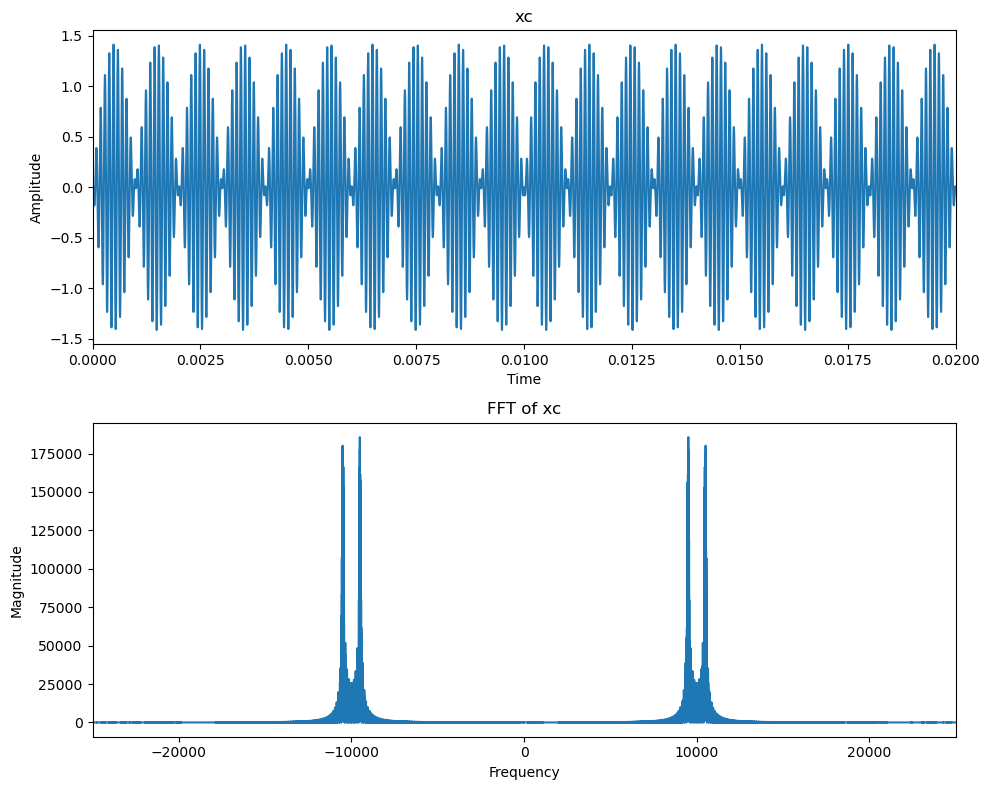

In [67]:
xc = AnalogMod(x1,x2,fs,fc)

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot xc in the first subplot
axs[0].plot(time, xc)
axs[0].set_title('xc')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')
axs[0].set_xlim(0,0.02)

# Compute the FFT of xc
fft_xc = np.fft.fftshift(np.fft.fft(xc))
freq_xc = np.fft.fftshift(np.fft.fftfreq(len(xc), 1/fs))

# Plot the FFT of xc in the second subplot
axs[1].plot(freq_xc, np.abs(fft_xc))
axs[1].set_title('FFT of xc')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlim(-25000,25000)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


output of Channel

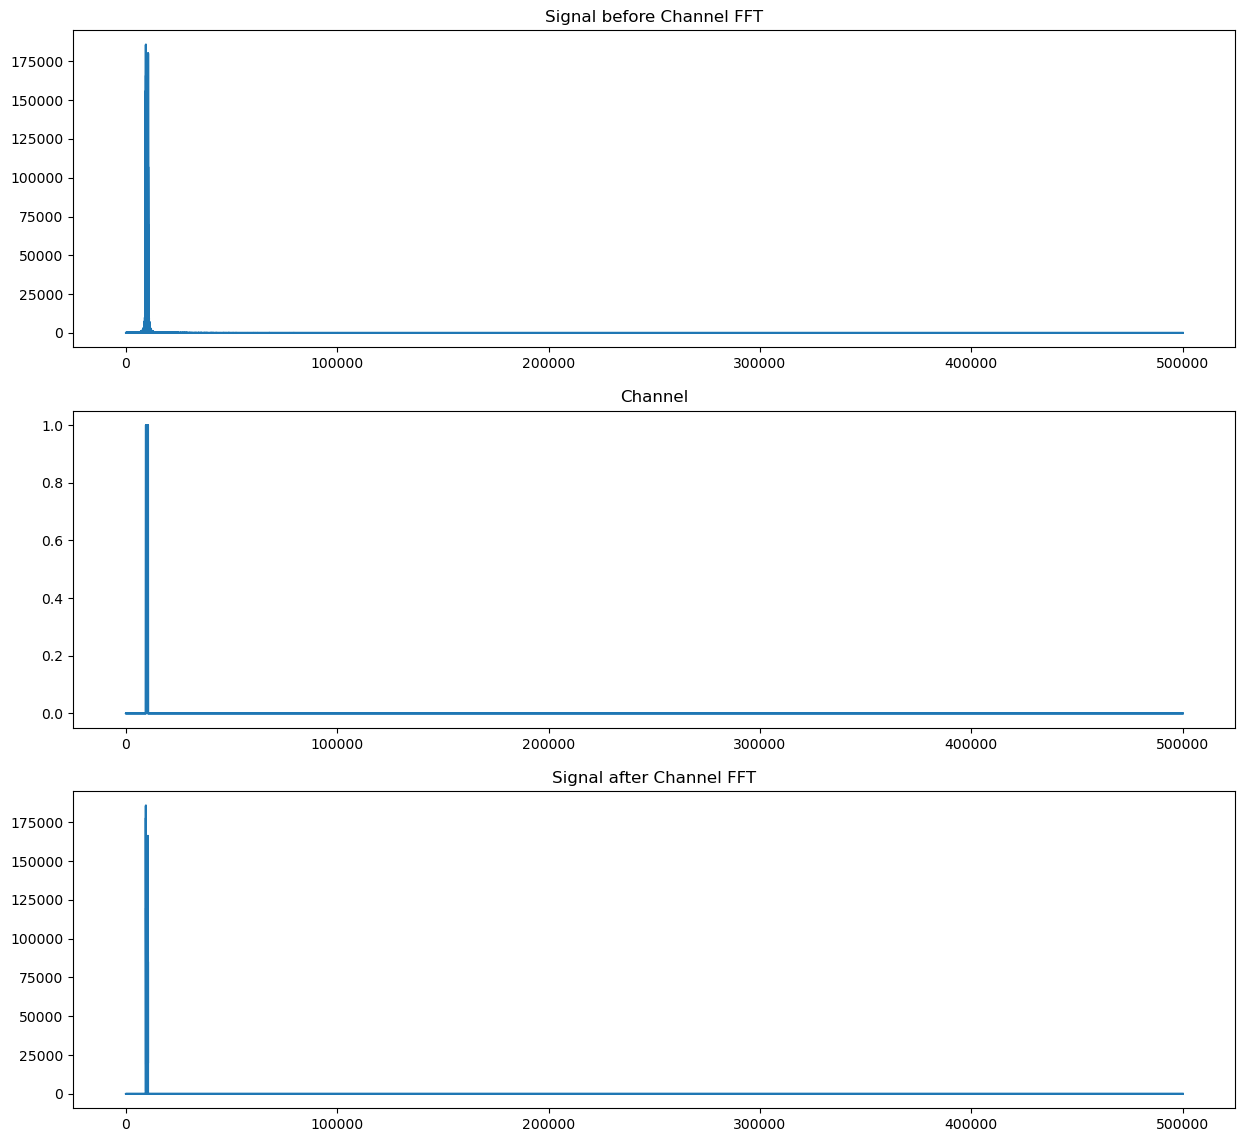

In [68]:
xcr = Channel(xc,fs,f_center,bw)

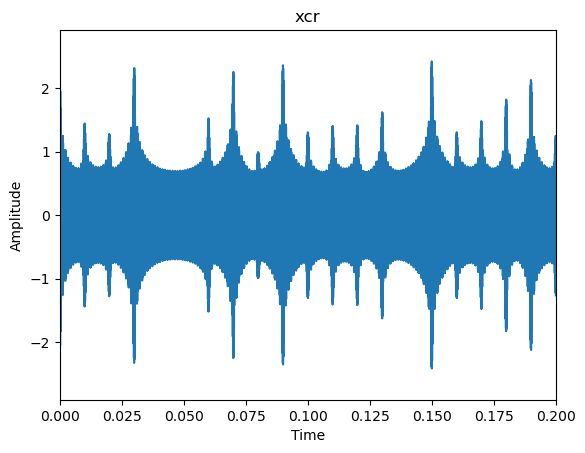

In [73]:
plt.plot(time, xcr)
plt.title('xcr')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(0, 0.2)
plt.show()

output AnalodDemod

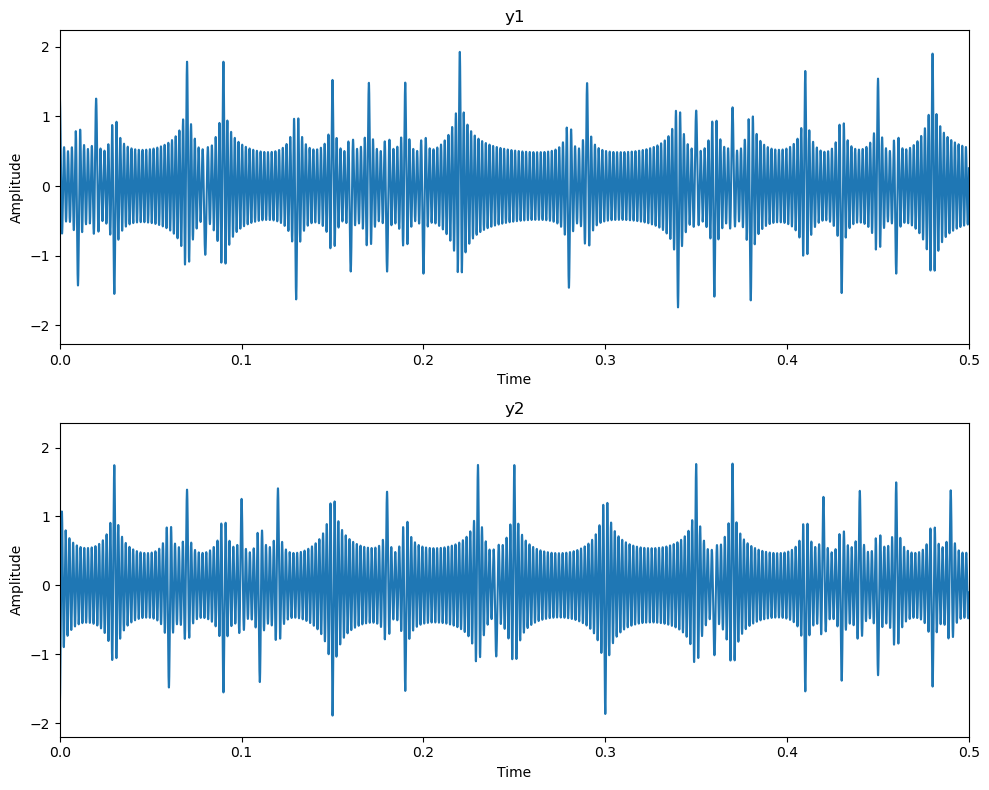

In [74]:
y1 , y2 = AnalogDemod(xcr,fs,fc,bw)

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot y1 in the first subplot
axs[0].plot(time, y1)
axs[0].set_title('y1')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')
axs[0].set_xlim(0, 0.5)  # Set x-axis limits to 0 to 0.5

# Plot y2 in the second subplot
axs[1].plot(time, y2)
axs[1].set_title('y2')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')
axs[1].set_xlim(0, 0.5)  # Set x-axis limits to 0 to 0.5

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


output of MatchedFilter

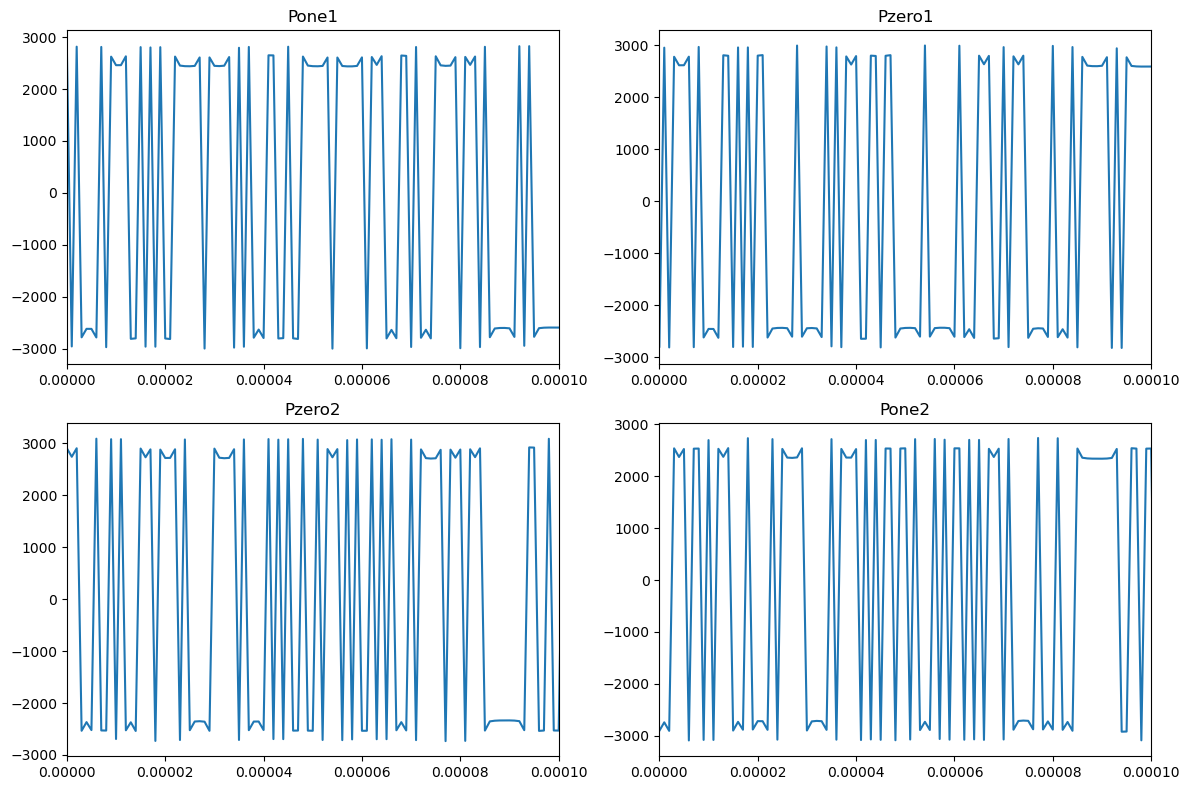

In [75]:
Pone1, Pzero1, bhat1 = MatchedFilt(y1, pulse1, pulse0)
Pone2, Pzero2, bhat2 = MatchedFilt(y2, pulse1, pulse0)

# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Pone1 in the first subplot
axs[0, 0].plot(np.arange(len(Pone1))/fs, Pone1)
axs[0, 0].set_title('Pone1')
axs[0, 0].set_xlim(0, 0.0001)

# Plot Pzero1 in the second subplot
axs[0, 1].plot(np.arange(len(Pzero1))/fs, Pzero1)
axs[0, 1].set_title('Pzero1')
axs[0, 1].set_xlim(0, 0.0001)

# Plot bhat1 in the third subplot
axs[1, 0].plot(np.arange(len(Pzero2))/fs, Pzero2)
axs[1, 0].set_title('Pzero2')
axs[1, 0].set_xlim(0, 0.0001)

# Plot Pone2 in the fourth subplot
axs[1, 1].plot(np.arange(len(Pone2))/fs, Pone2)
axs[1, 1].set_title('Pone2')
axs[1, 1].set_xlim(0, 0.0001)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


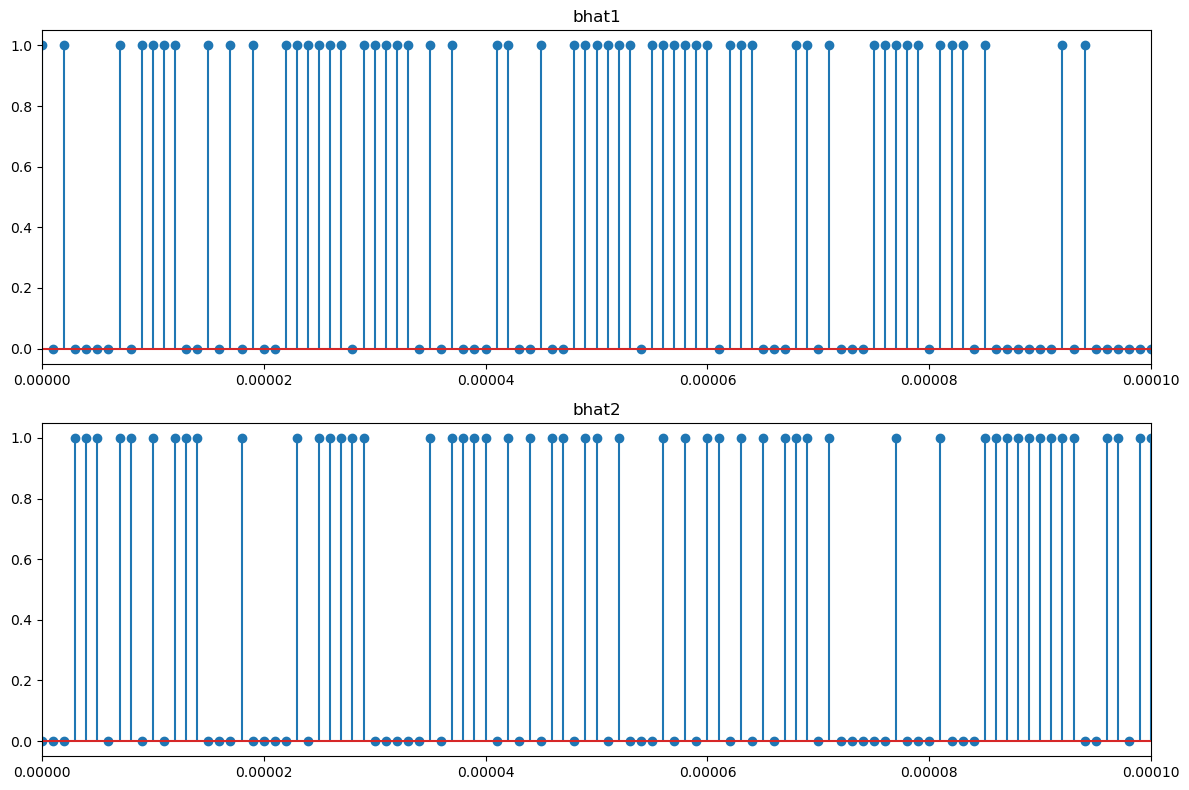

In [76]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].stem(np.arange(len(bhat1))/fs, bhat1)
axs[0].set_title('bhat1')
axs[0].set_xlim(0, 0.0001)

axs[1].stem(np.arange(len(bhat2))/fs, bhat2)
axs[1].set_title('bhat2')
axs[1].set_xlim(0, 0.0001)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


output of Combine

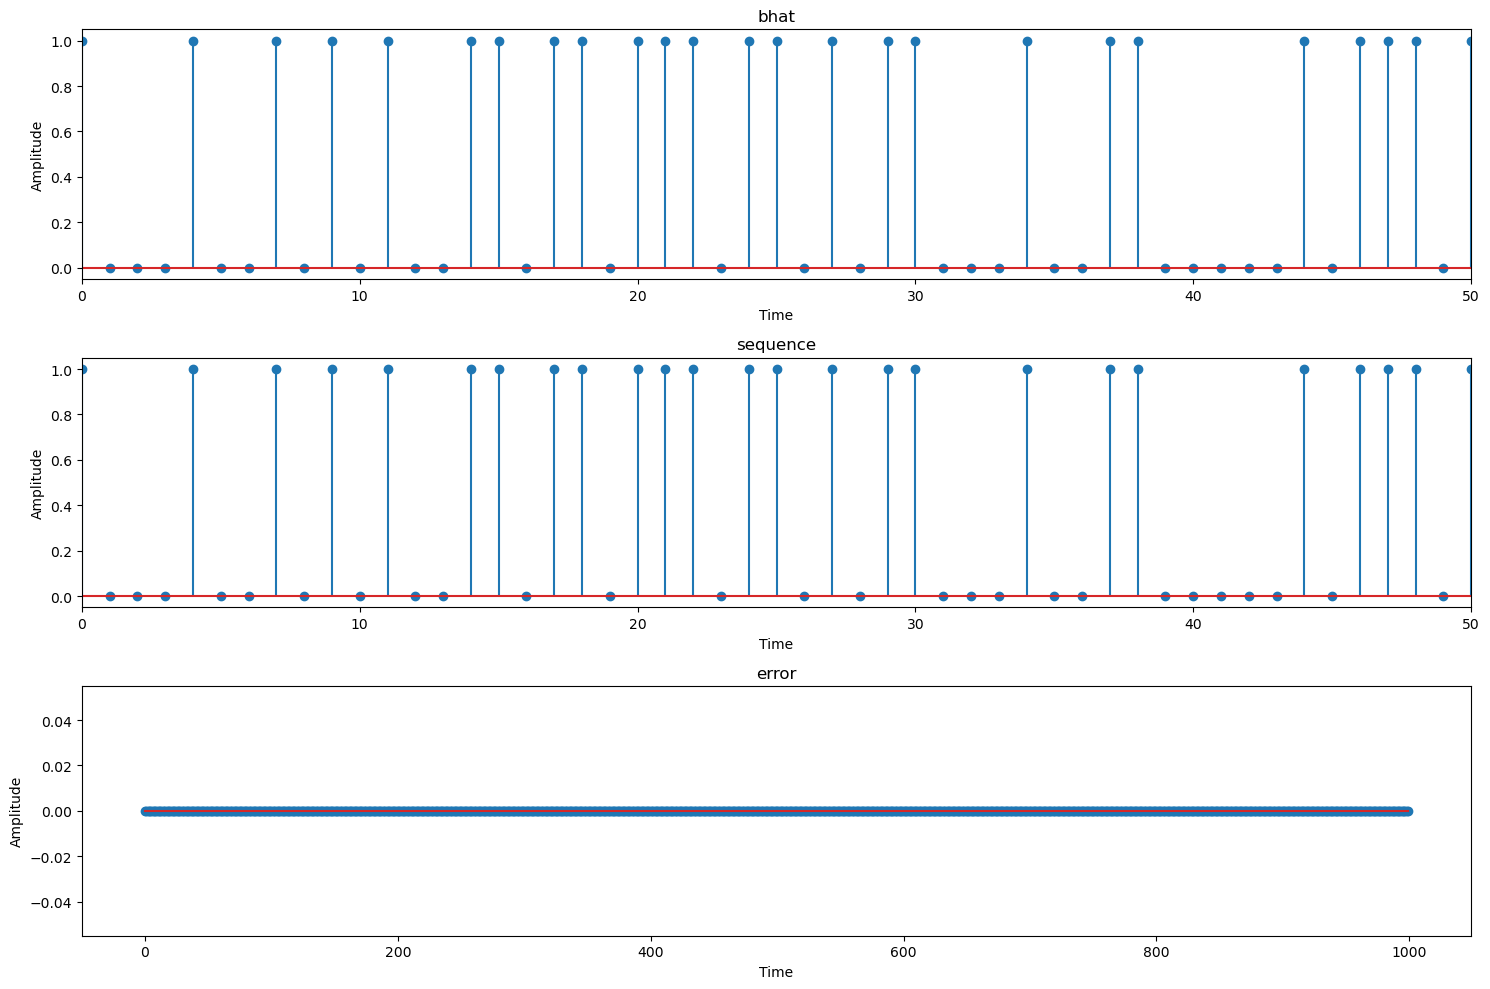

In [77]:
bhat = Combine(bhat1,bhat2)

plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
plt.stem(bhat)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('bhat')
plt.xlim(0, 50)

plt.subplot(3,1,2)
plt.stem(sequence_long)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('sequence')
plt.xlim(0, 50)

plt.subplot(3,1,3)
plt.stem(bhat-sequence_long)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('error')
#plt.xlim(0, 50)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# 3.2.b

In [78]:
error = []
# Define the parameters for the AWGN
mean = 0  # Mean of the Gaussian distribution
for i in range(50) :
    # Generate the AWGN
    noise = np.random.normal(mean, 4*i, len(xcr))
    xcr_noisy = xcr + noise
    y1_noisy , y2_noisy = AnalogDemod(xcr_noisy,fs,fc,bw)
    _ , _ , bhat1_noisy = MatchedFilt(y1_noisy,pulse1,pulse0)
    _ , _ , bhat2_noisy = MatchedFilt(y2_noisy,pulse1,pulse0)
    bhat_noisy = Combine(bhat1_noisy,bhat2_noisy)
    error.append(np.sum((bhat_noisy - sequence_long) ** 2) / len(sequence_long))


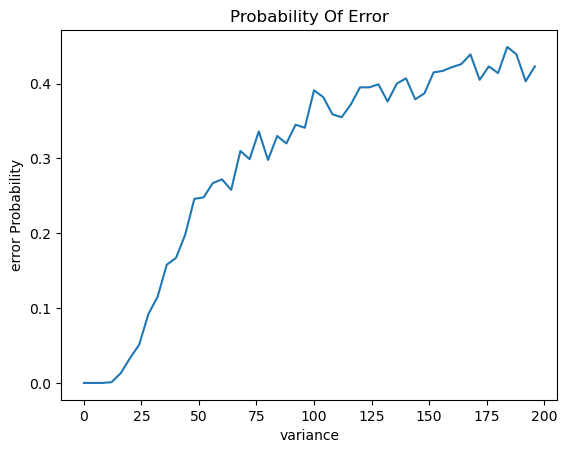

In [79]:
plt.figure()
plt.plot(np.arange(0, 200, 4) , error)
plt.title('Probability Of Error')
plt.xlabel('variance')
plt.ylabel('error Probability')
plt.show()

# 3.2.c

c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


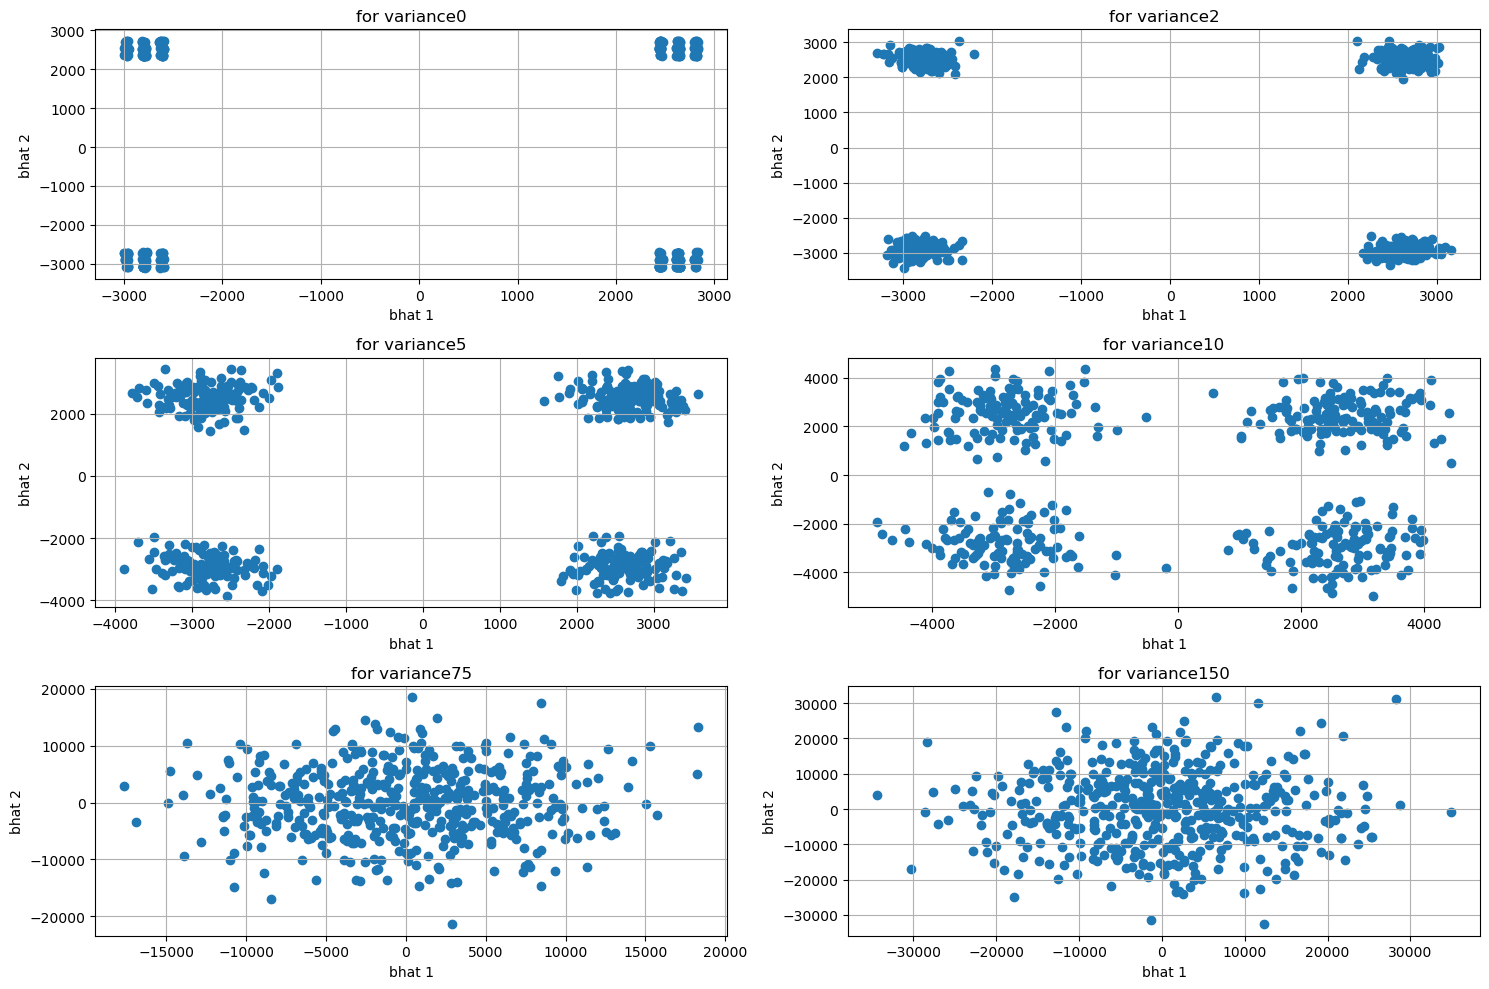

In [80]:
variance = [0,2,5,10,75,150]
countplot = 1
plt.figure(figsize=(15, 10))
for i in variance :
    noise = np.random.normal(mean, i, len(xcr))
    xcr_noisy = xcr + noise
    y1_noisy , y2_noisy = AnalogDemod(xcr_noisy,fs,fc,bw)
    plot1 , _ , bhat1_noisy = MatchedFilt(y1_noisy,pulse1,pulse0)
    plot2 , _ , bhat2_noisy = MatchedFilt(y2_noisy,pulse1,pulse0)
    bhat_noisy = Combine(bhat1_noisy,bhat2_noisy)
    plt.subplot(3,2,countplot)
    plt.scatter(plot1, plot2)
    string = str(i)
    plt.title('for variance'+string)
    plt.xlabel('bhat 1')
    plt.ylabel('bhat 2')
    plt.grid(True)
    countplot = countplot + 1
    
plt.tight_layout()
plt.show()


# 3.3.b

In [81]:
t = np.arange(0, 10000) / fs
pulse0 = np.sin(2 * np.pi * 150 * t) 
pulse1 = np.sin(2 * np.pi * 100 * t)

output of Divide

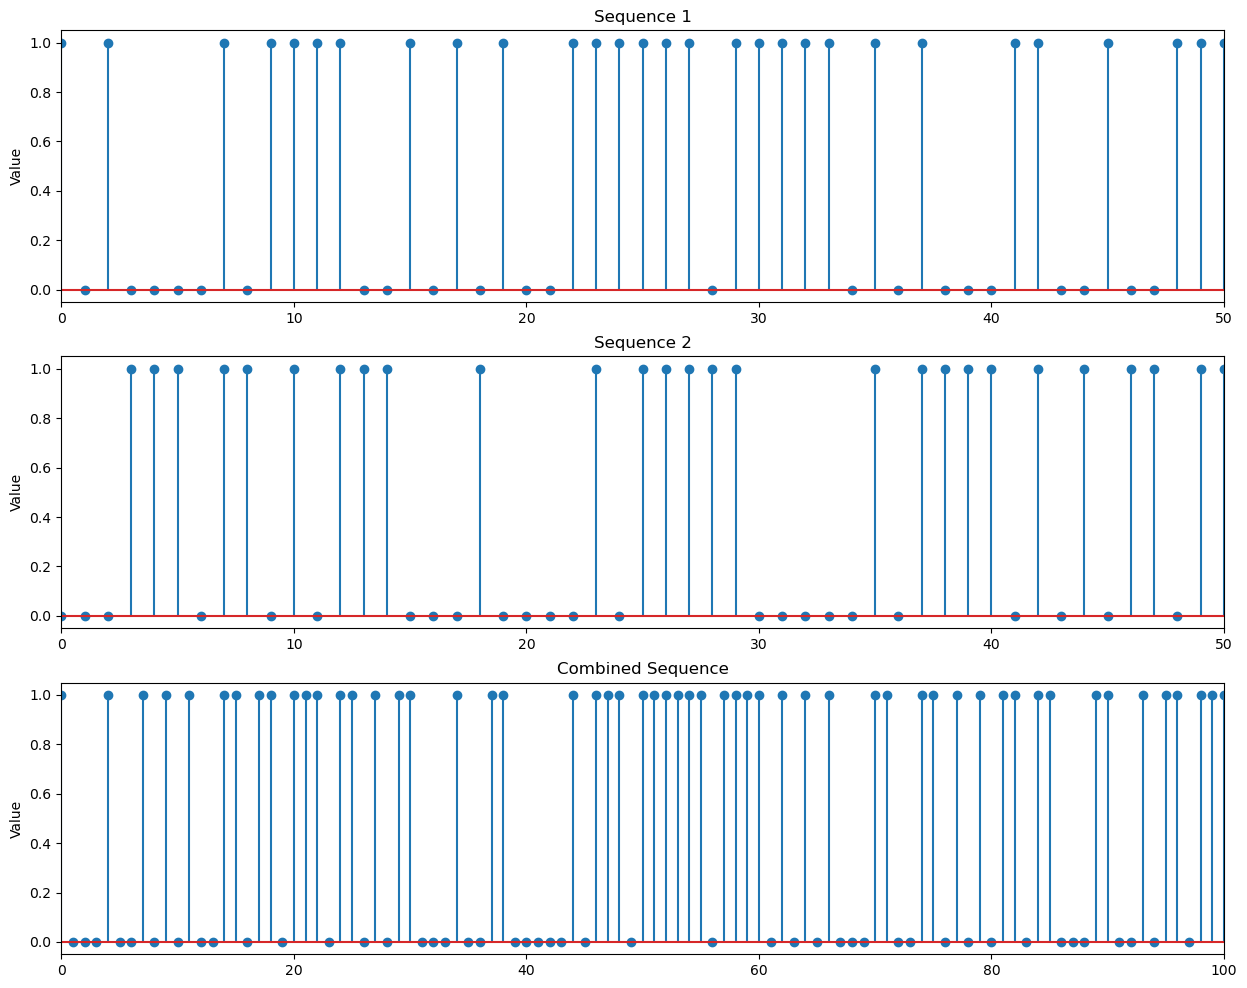

In [82]:
b1 , b2 = Divide(sequence_long)

plt.figure(figsize=(15, 12))
plt.subplot(3,1,1)
plt.stem(np.arange(len(b1)),b1)
plt.xlim(0,50)
plt.title('Sequence 1')
plt.ylabel('Value')

plt.subplot(3,1,2)
plt.stem(np.arange(len(b2)),b2)
plt.xlim(0,50)
plt.title('Sequence 2')
plt.ylabel('Value')

plt.subplot(3,1,3)
plt.stem(np.arange(len(sequence_long)),sequence_long)
plt.xlim(0,100)
plt.title('Combined Sequence')
plt.ylabel('Value')

plt.show()


output of PulseShaping

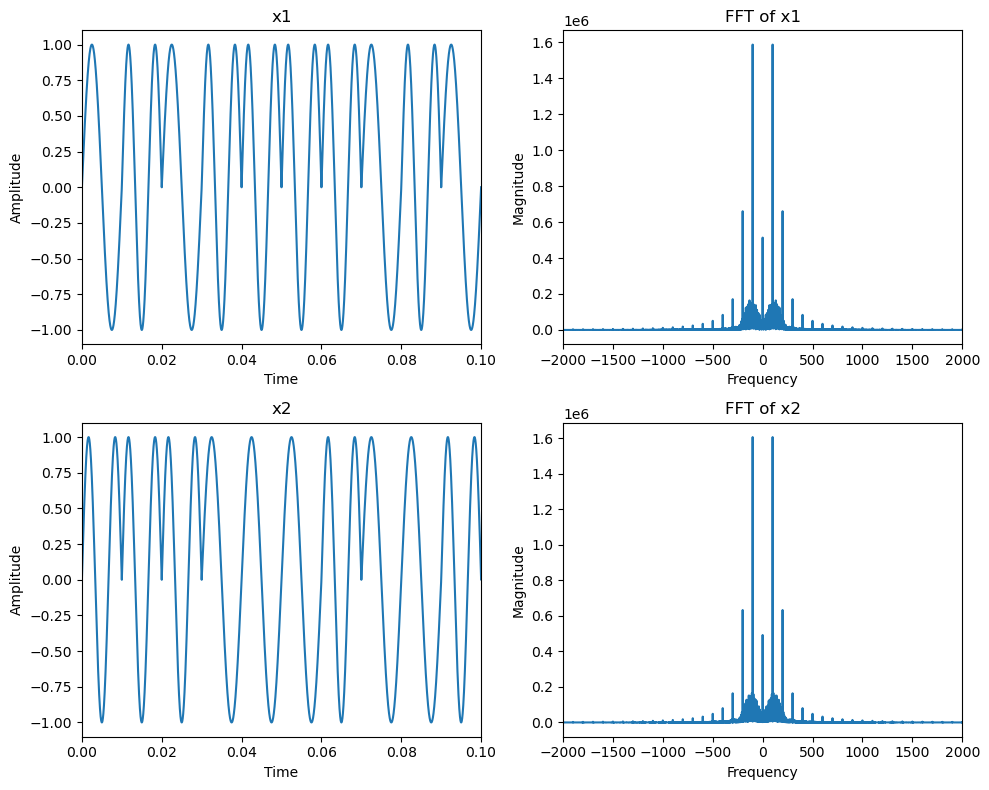

In [86]:
x1 = PulseShaping(pulse0,pulse1,b1)
x2 = PulseShaping(pulse0,pulse1,b2)
time = np.arange(0, len(sequence_long)*pulse_duration/2, 1/fs)

# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot x1 in the first subplot
axs[0, 0].plot(time, x1)
axs[0, 0].set_title('x1')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].set_xlim(0,0.1)

# Compute the FFT of x1
fft_x1 = np.fft.fftshift(np.fft.fft(x1))
freq_x1 = np.fft.fftshift(np.fft.fftfreq(len(x1), 1/fs))

# Plot the FFT of x1 in the second subplot
axs[0, 1].plot(freq_x1, np.abs(fft_x1))
axs[0, 1].set_title('FFT of x1')
axs[0, 1].set_xlabel('Frequency')
axs[0, 1].set_ylabel('Magnitude')
axs[0, 1].set_xlim(-2000,2000)

# Plot x2 in the third subplot
axs[1, 0].plot(time, x2)
axs[1, 0].set_title('x2')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Amplitude')
axs[1, 0].set_xlim(0,0.1)

# Compute the FFT of x2
fft_x2 = np.fft.fftshift(np.fft.fft(x2))
freq_x2 = np.fft.fftshift(np.fft.fftfreq(len(x2), 1/fs))

# Plot the FFT of x2 in the fourth subplot
axs[1, 1].plot(freq_x2, np.abs(fft_x2))
axs[1, 1].set_title('FFT of x2')
axs[1, 1].set_xlabel('Frequency')
axs[1, 1].set_ylabel('Magnitude')
axs[1, 1].set_xlim(-2000,2000)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



output of AnalogMod

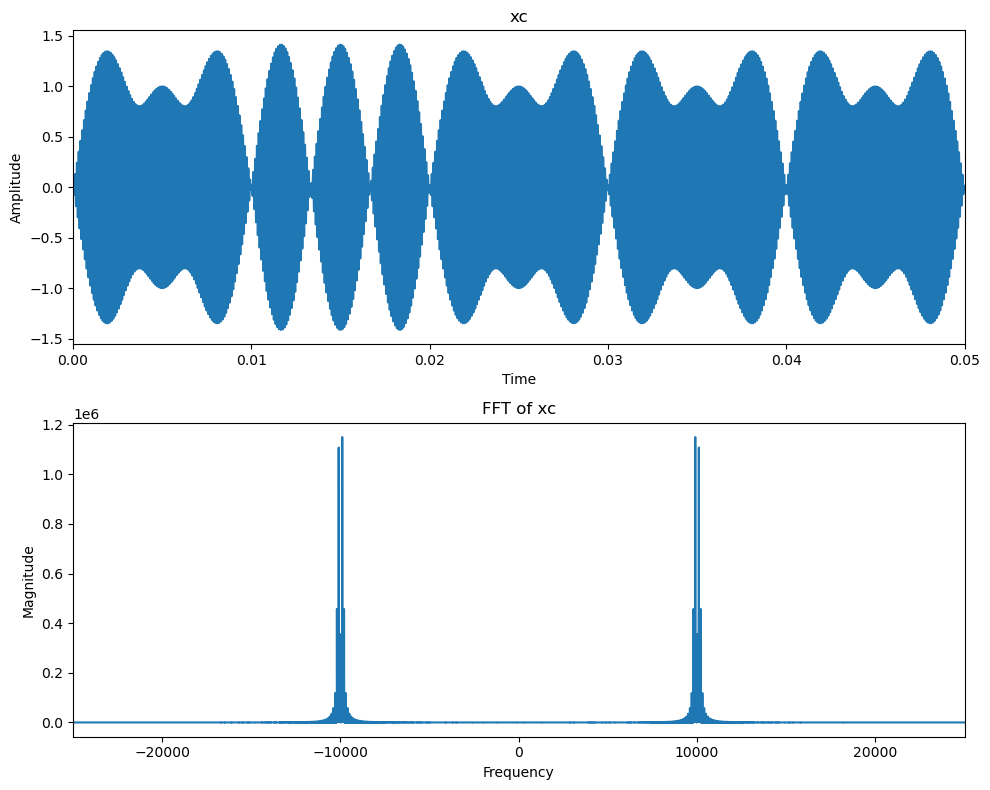

In [88]:
xc = AnalogMod(x1,x2,fs,fc)

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot xc in the first subplot
axs[0].plot(time, xc)
axs[0].set_title('xc')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')
axs[0].set_xlim(0,0.05)

# Compute the FFT of xc
fft_xc = np.fft.fftshift(np.fft.fft(xc))
freq_xc = np.fft.fftshift(np.fft.fftfreq(len(xc), 1/fs))

# Plot the FFT of xc in the second subplot
axs[1].plot(freq_xc, np.abs(fft_xc))
axs[1].set_title('FFT of xc')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlim(-25000,25000)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


output of Channel

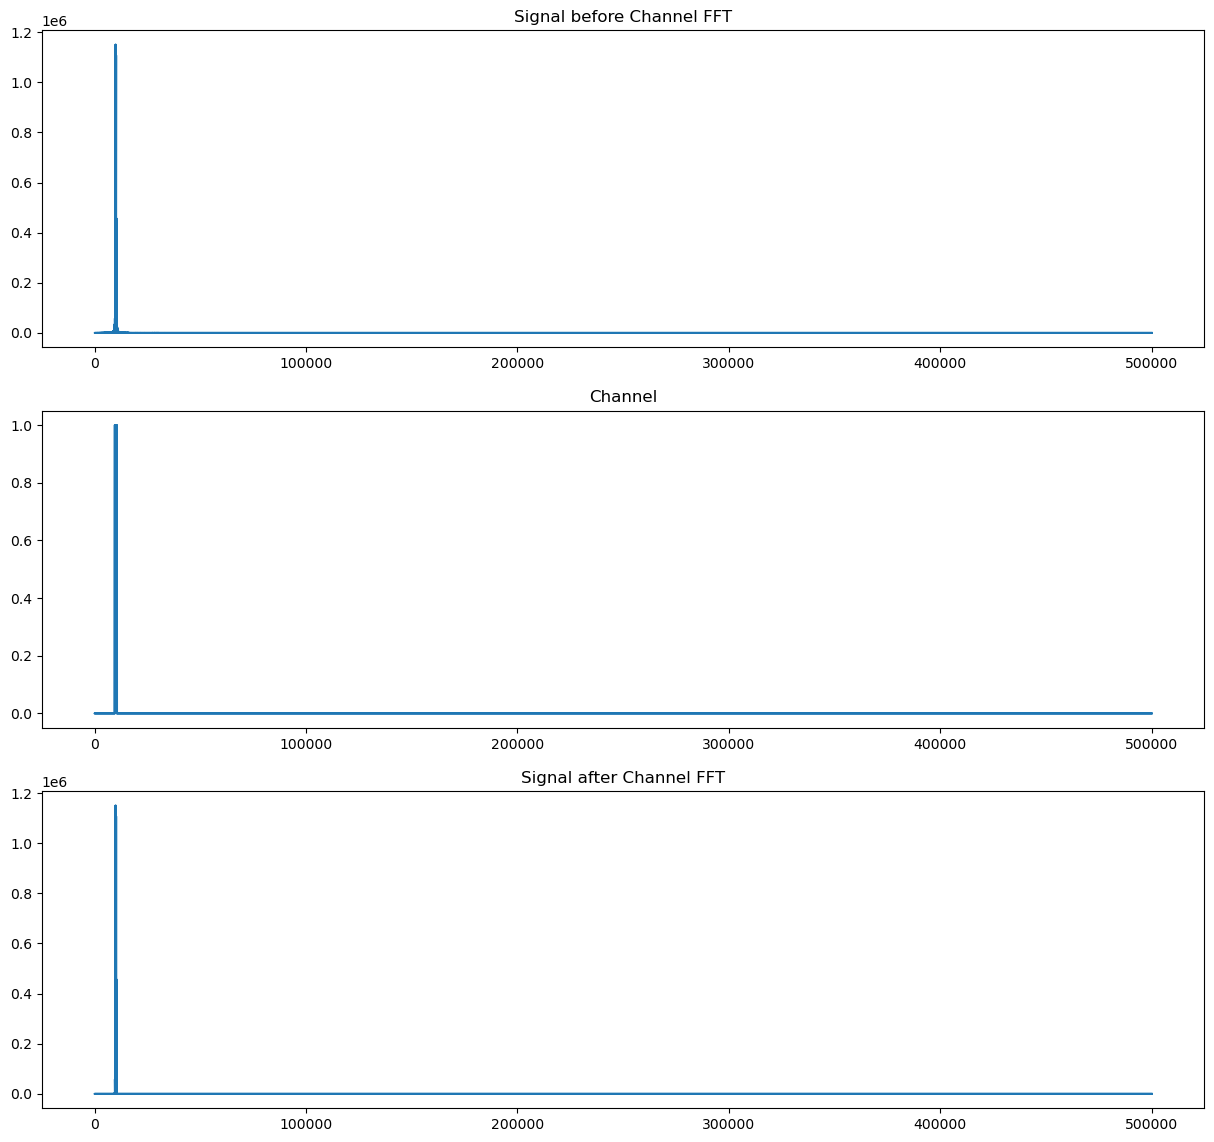

In [89]:
xcr = Channel(xc,fs,f_center,bw)

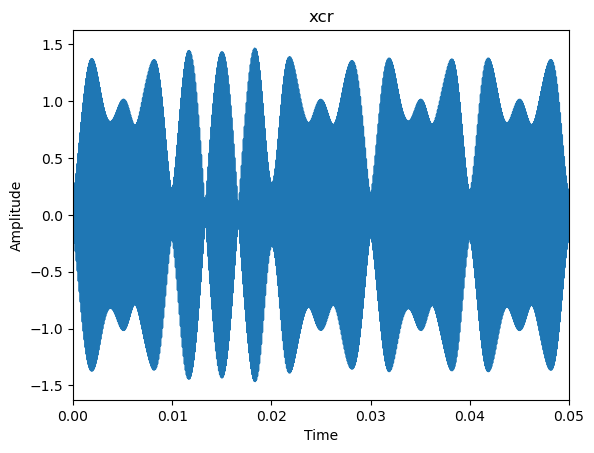

In [91]:
plt.plot(time, xcr)
plt.title('xcr')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(0, 0.05)
plt.show()

output of AnalogDemod

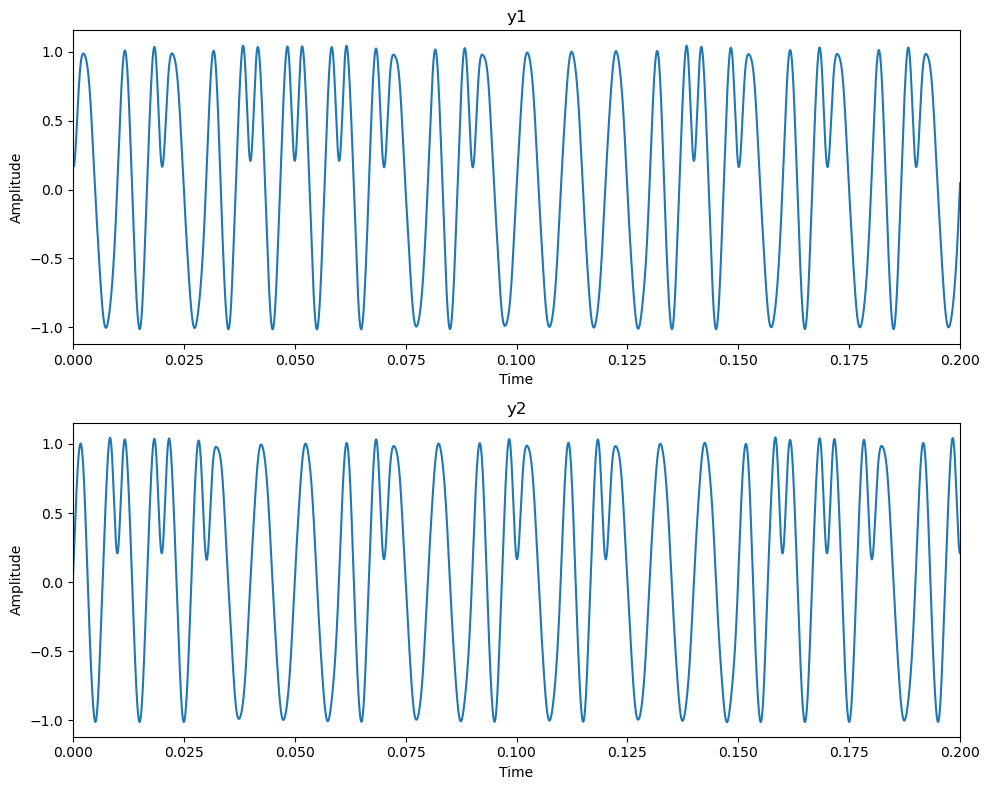

In [94]:
y1 , y2 = AnalogDemod(xcr,fs,fc,bw)

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot y1 in the first subplot
axs[0].plot(time, y1)
axs[0].set_title('y1')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')
axs[0].set_xlim(0, 0.2)  # Set x-axis limits to 0 to 0.5

# Plot y2 in the second subplot
axs[1].plot(time, y2)
axs[1].set_title('y2')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')
axs[1].set_xlim(0, 0.2)  # Set x-axis limits to 0 to 0.5

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


output of MatchedFilter

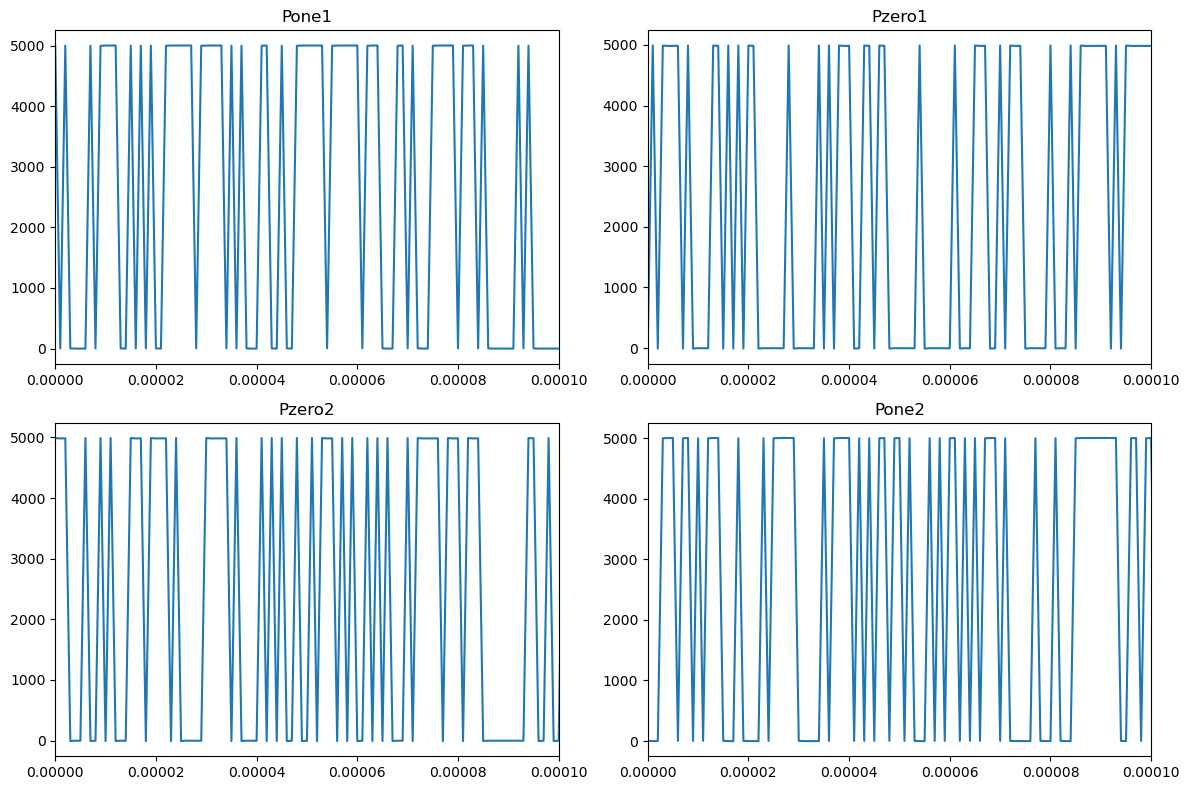

In [95]:
Pone1, Pzero1, bhat1 = MatchedFilt(y1, pulse1, pulse0)
Pone2, Pzero2, bhat2 = MatchedFilt(y2, pulse1, pulse0)

# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Pone1 in the first subplot
axs[0, 0].plot(np.arange(len(Pone1))/fs, Pone1)
axs[0, 0].set_title('Pone1')
axs[0, 0].set_xlim(0, 0.0001)

# Plot Pzero1 in the second subplot
axs[0, 1].plot(np.arange(len(Pzero1))/fs, Pzero1)
axs[0, 1].set_title('Pzero1')
axs[0, 1].set_xlim(0, 0.0001)

# Plot bhat1 in the third subplot
axs[1, 0].plot(np.arange(len(Pzero2))/fs, Pzero2)
axs[1, 0].set_title('Pzero2')
axs[1, 0].set_xlim(0, 0.0001)

# Plot Pone2 in the fourth subplot
axs[1, 1].plot(np.arange(len(Pone2))/fs, Pone2)
axs[1, 1].set_title('Pone2')
axs[1, 1].set_xlim(0, 0.0001)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


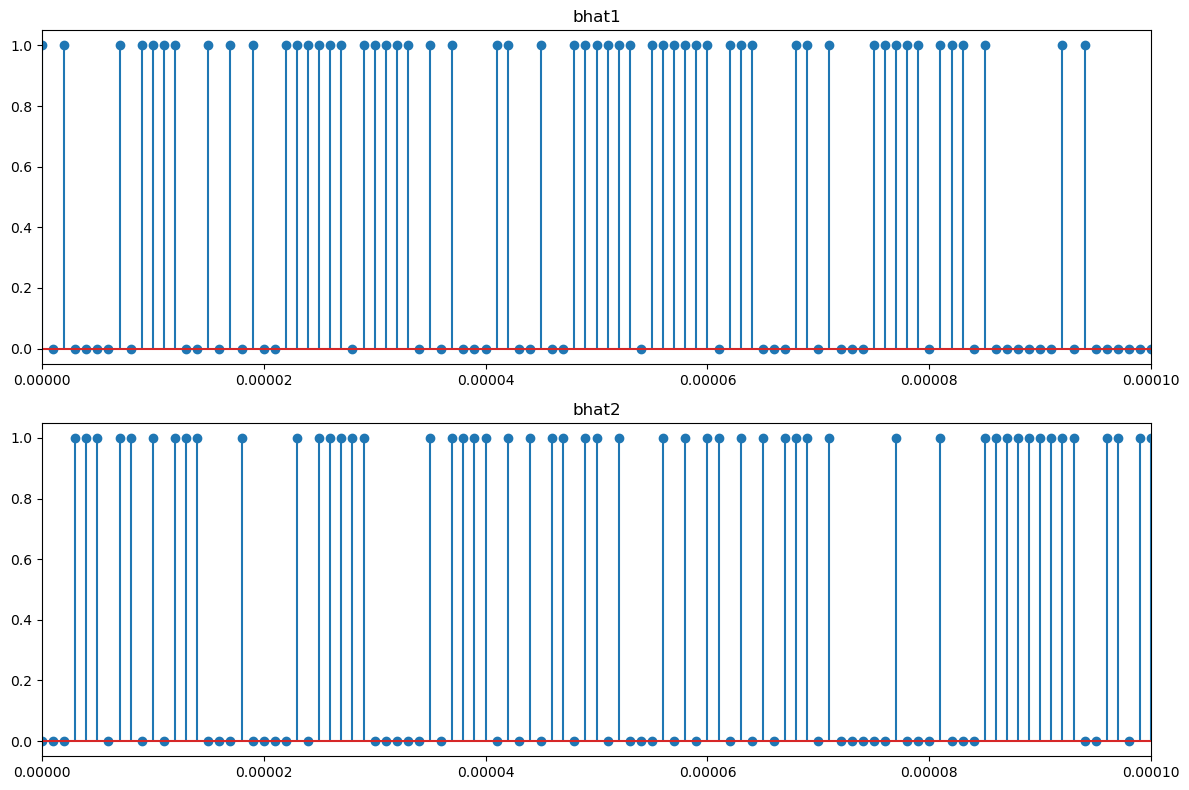

In [96]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].stem(np.arange(len(bhat1))/fs, bhat1)
axs[0].set_title('bhat1')
axs[0].set_xlim(0, 0.0001)

axs[1].stem(np.arange(len(bhat2))/fs, bhat2)
axs[1].set_title('bhat2')
axs[1].set_xlim(0, 0.0001)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


output of Combine

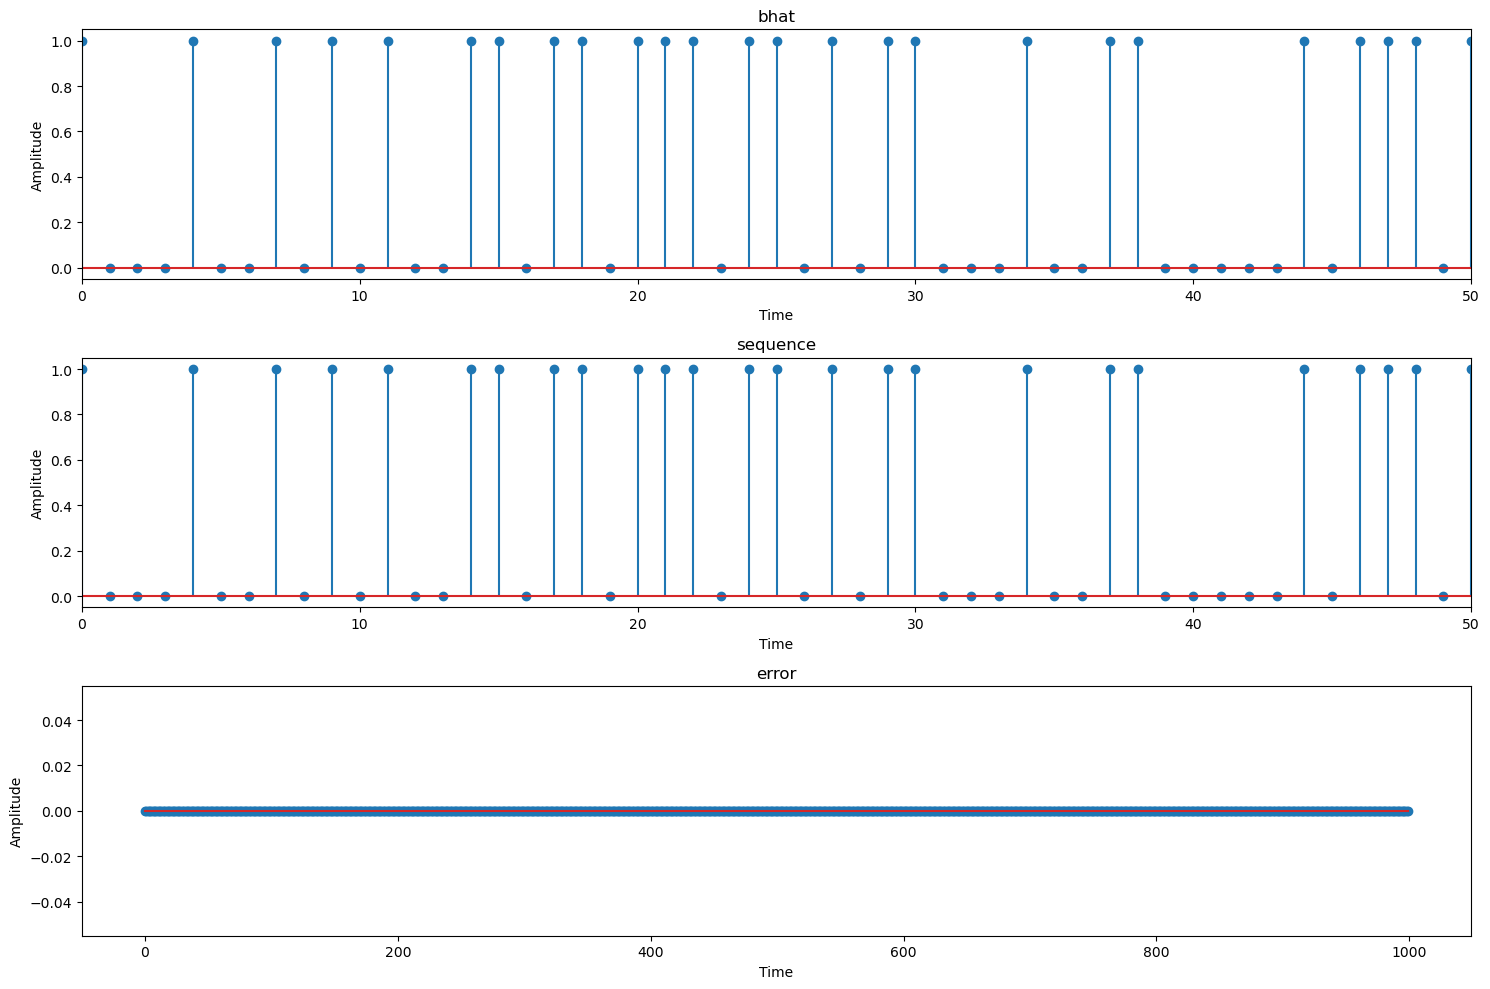

In [97]:
bhat = Combine(bhat1,bhat2)

plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
plt.stem(bhat)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('bhat')
plt.xlim(0, 50)

plt.subplot(3,1,2)
plt.stem(sequence_long)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('sequence')
plt.xlim(0, 50)

plt.subplot(3,1,3)
plt.stem(bhat-sequence_long)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('error')
#plt.xlim(0, 50)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# 3.3.c

In [98]:
error = []
# Define the parameters for the AWGN
mean = 0  # Mean of the Gaussian distribution
for i in range(50) :
    # Generate the AWGN
    noise = np.random.normal(mean, 4*i, len(xcr))
    xcr_noisy = xcr + noise
    y1_noisy , y2_noisy = AnalogDemod(xcr_noisy,fs,fc,bw)
    _ , _ , bhat1_noisy = MatchedFilt(y1_noisy,pulse1,pulse0)
    _ , _ , bhat2_noisy = MatchedFilt(y2_noisy,pulse1,pulse0)
    bhat_noisy = Combine(bhat1_noisy,bhat2_noisy)
    error.append(np.sum((bhat_noisy - sequence_long) ** 2) / len(sequence_long))


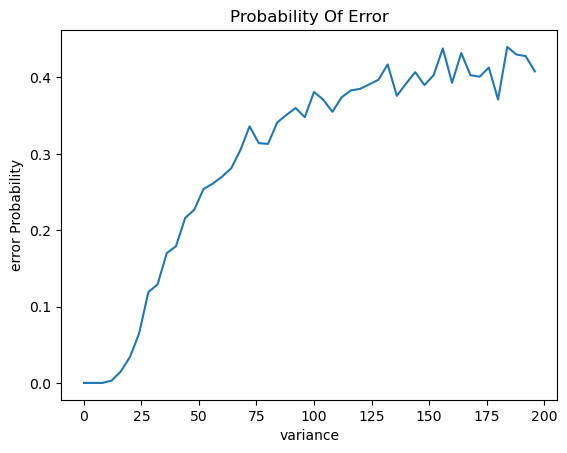

In [99]:
plt.figure()
plt.plot(np.arange(0, 200, 4) , error)
plt.title('Probability Of Error')
plt.xlabel('variance')
plt.ylabel('error Probability')
plt.show()

c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\collections.py:196: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


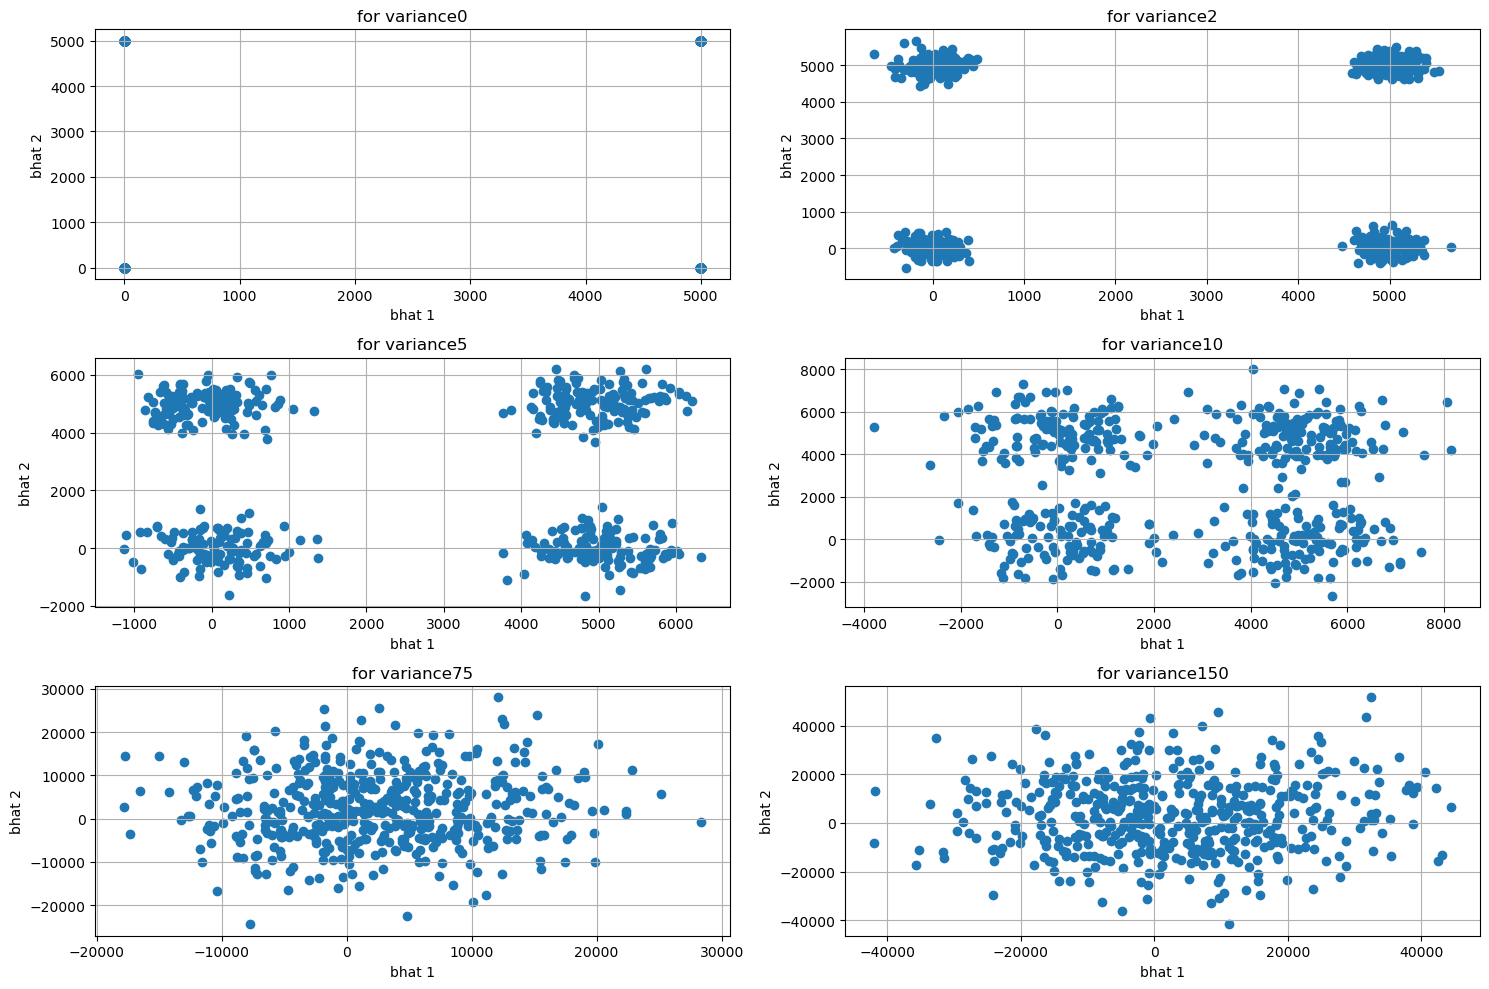

In [100]:
variance = [0,2,5,10,75,150]
countplot = 1
plt.figure(figsize=(15, 10))
for i in variance :
    noise = np.random.normal(mean, i, len(xcr))
    xcr_noisy = xcr + noise
    y1_noisy , y2_noisy = AnalogDemod(xcr_noisy,fs,fc,bw)
    plot1 , _ , bhat1_noisy = MatchedFilt(y1_noisy,pulse1,pulse0)
    plot2 , _ , bhat2_noisy = MatchedFilt(y2_noisy,pulse1,pulse0)
    bhat_noisy = Combine(bhat1_noisy,bhat2_noisy)
    plt.subplot(3,2,countplot)
    plt.scatter(plot1, plot2)
    string = str(i)
    plt.title('for variance'+string)
    plt.xlabel('bhat 1')
    plt.ylabel('bhat 2')
    plt.grid(True)
    countplot = countplot + 1
    
plt.tight_layout()
plt.show()


# 4.1

In [107]:
def SourceGenerator(sequence):
    binary_sequence = [bin(num)[2:].zfill(8) for num in sequence]
    binary_string = ''.join(binary_sequence)
    binary_list = [int(bit) for bit in binary_string]
    return binary_list

def OutputDecoder(binary_list):
    binary_string = ''.join(str(bit) for bit in binary_list)
    binary_sequence = [int(binary_string[i:i+8], 2) for i in range(0, len(binary_string), 8)]
    return binary_sequence


# 4.2

In [110]:
# we want to have len 1000 and we have 8 bit numbers so we need 1000/8 = 125 numbers
input255 = np.random.randint(0 , 255 , size = 125)
pulse1 = np.concatenate((np.ones(5000), np.zeros(5000)))
pulse0 = np.concatenate((np.full(5000, -1), np.zeros(5000)))
sequence_long = SourceGenerator(input255)

output of Divide

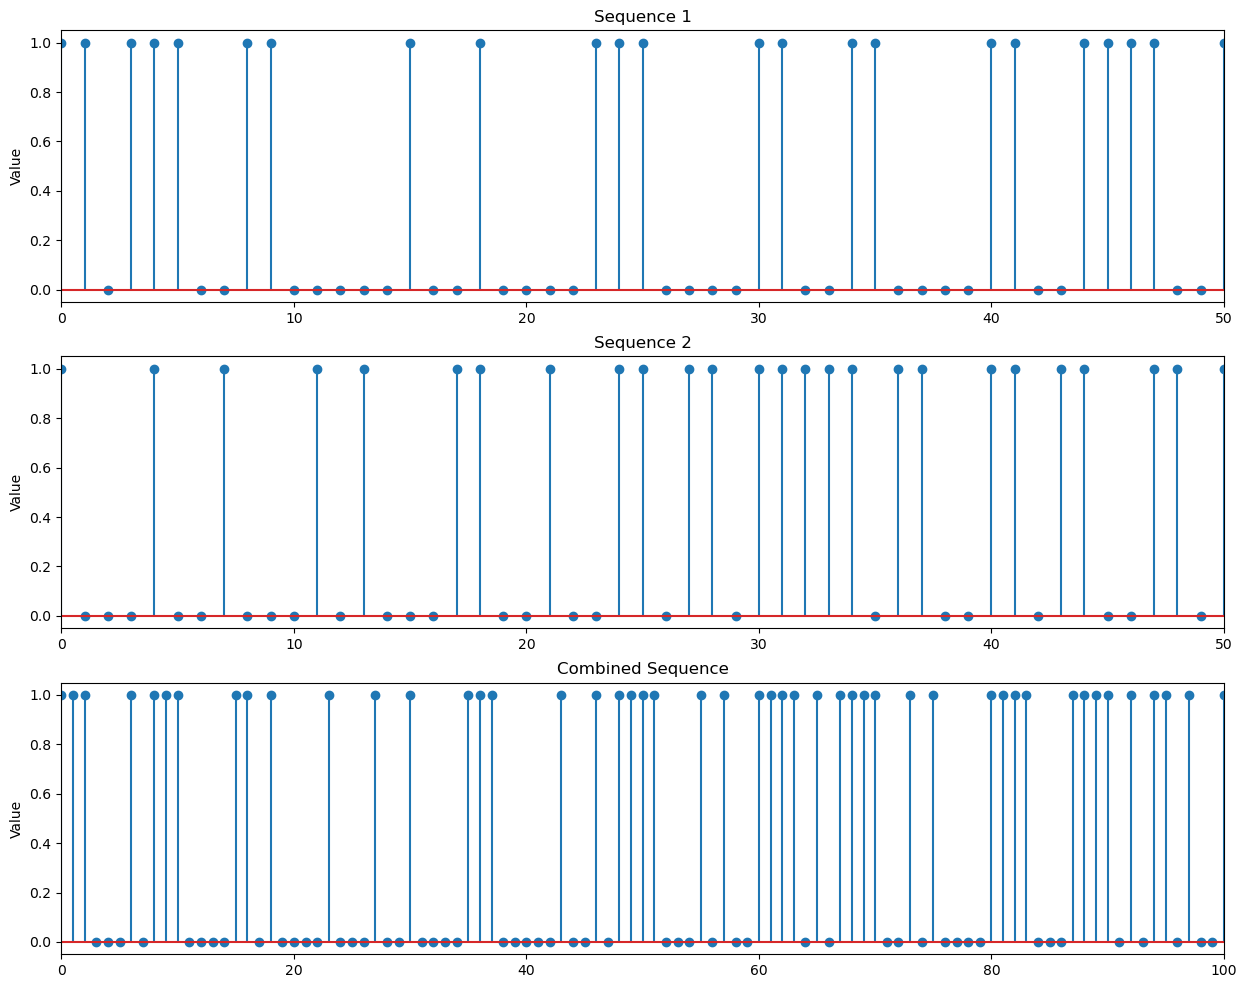

In [111]:
b1 , b2 = Divide(sequence_long)

plt.figure(figsize=(15, 12))
plt.subplot(3,1,1)
plt.stem(np.arange(len(b1)),b1)
plt.xlim(0,50)
plt.title('Sequence 1')
plt.ylabel('Value')

plt.subplot(3,1,2)
plt.stem(np.arange(len(b2)),b2)
plt.xlim(0,50)
plt.title('Sequence 2')
plt.ylabel('Value')

plt.subplot(3,1,3)
plt.stem(np.arange(len(sequence_long)),sequence_long)
plt.xlim(0,100)
plt.title('Combined Sequence')
plt.ylabel('Value')

plt.show()


output of PulseShaping

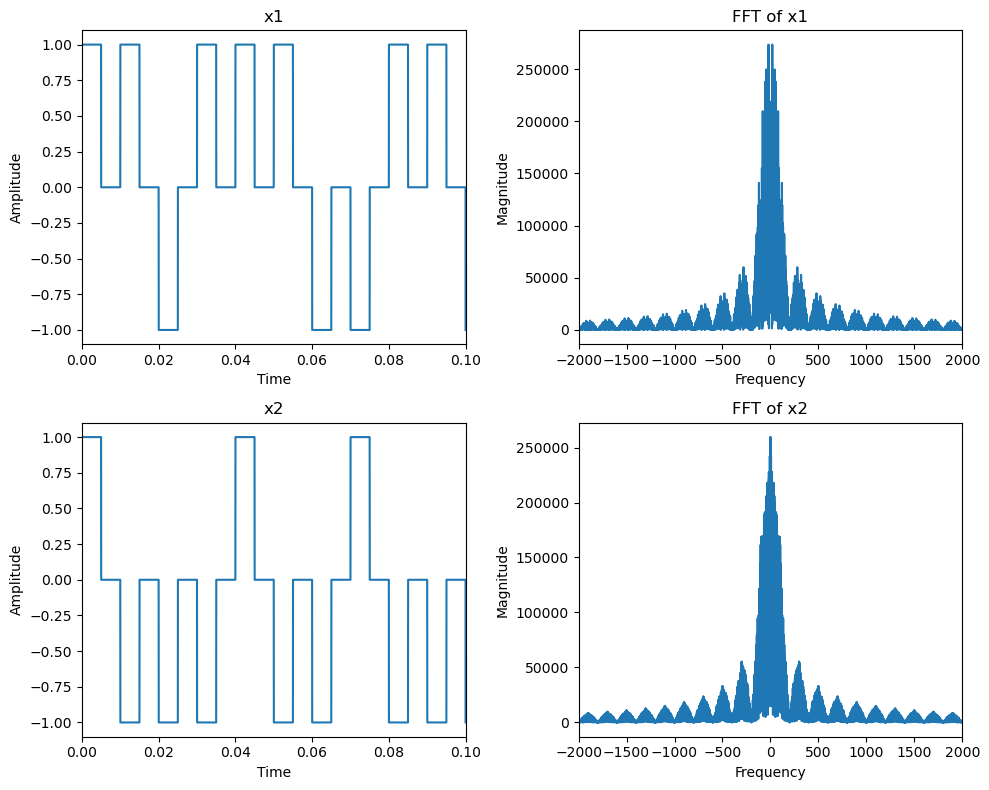

In [112]:
x1 = PulseShaping(pulse0,pulse1,b1)
x2 = PulseShaping(pulse0,pulse1,b2)
time = np.arange(0, len(sequence_long)*pulse_duration/2, 1/fs)

# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot x1 in the first subplot
axs[0, 0].plot(time, x1)
axs[0, 0].set_title('x1')
axs[0, 0].set_xlabel('Time')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].set_xlim(0,0.1)

# Compute the FFT of x1
fft_x1 = np.fft.fftshift(np.fft.fft(x1))
freq_x1 = np.fft.fftshift(np.fft.fftfreq(len(x1), 1/fs))

# Plot the FFT of x1 in the second subplot
axs[0, 1].plot(freq_x1, np.abs(fft_x1))
axs[0, 1].set_title('FFT of x1')
axs[0, 1].set_xlabel('Frequency')
axs[0, 1].set_ylabel('Magnitude')
axs[0, 1].set_xlim(-2000,2000)

# Plot x2 in the third subplot
axs[1, 0].plot(time, x2)
axs[1, 0].set_title('x2')
axs[1, 0].set_xlabel('Time')
axs[1, 0].set_ylabel('Amplitude')
axs[1, 0].set_xlim(0,0.1)

# Compute the FFT of x2
fft_x2 = np.fft.fftshift(np.fft.fft(x2))
freq_x2 = np.fft.fftshift(np.fft.fftfreq(len(x2), 1/fs))

# Plot the FFT of x2 in the fourth subplot
axs[1, 1].plot(freq_x2, np.abs(fft_x2))
axs[1, 1].set_title('FFT of x2')
axs[1, 1].set_xlabel('Frequency')
axs[1, 1].set_ylabel('Magnitude')
axs[1, 1].set_xlim(-2000,2000)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



output of AnalogMod

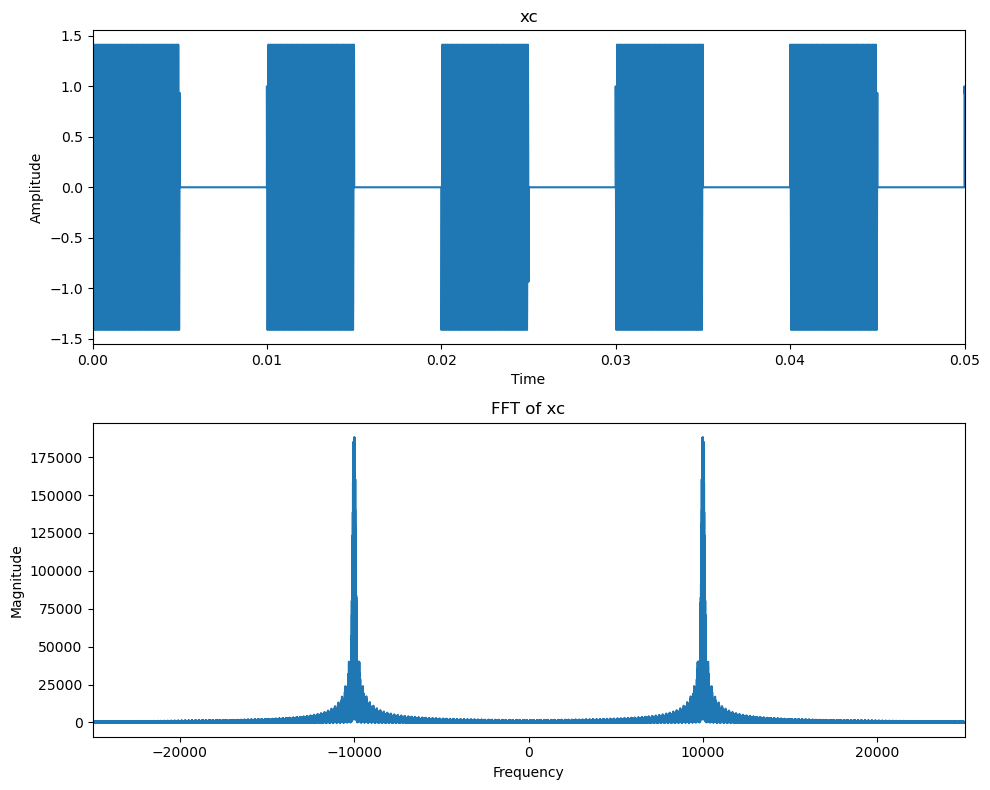

In [113]:
xc = AnalogMod(x1,x2,fs,fc)

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot xc in the first subplot
axs[0].plot(time, xc)
axs[0].set_title('xc')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')
axs[0].set_xlim(0,0.05)

# Compute the FFT of xc
fft_xc = np.fft.fftshift(np.fft.fft(xc))
freq_xc = np.fft.fftshift(np.fft.fftfreq(len(xc), 1/fs))

# Plot the FFT of xc in the second subplot
axs[1].plot(freq_xc, np.abs(fft_xc))
axs[1].set_title('FFT of xc')
axs[1].set_xlabel('Frequency')
axs[1].set_ylabel('Magnitude')
axs[1].set_xlim(-25000,25000)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


output of Channel

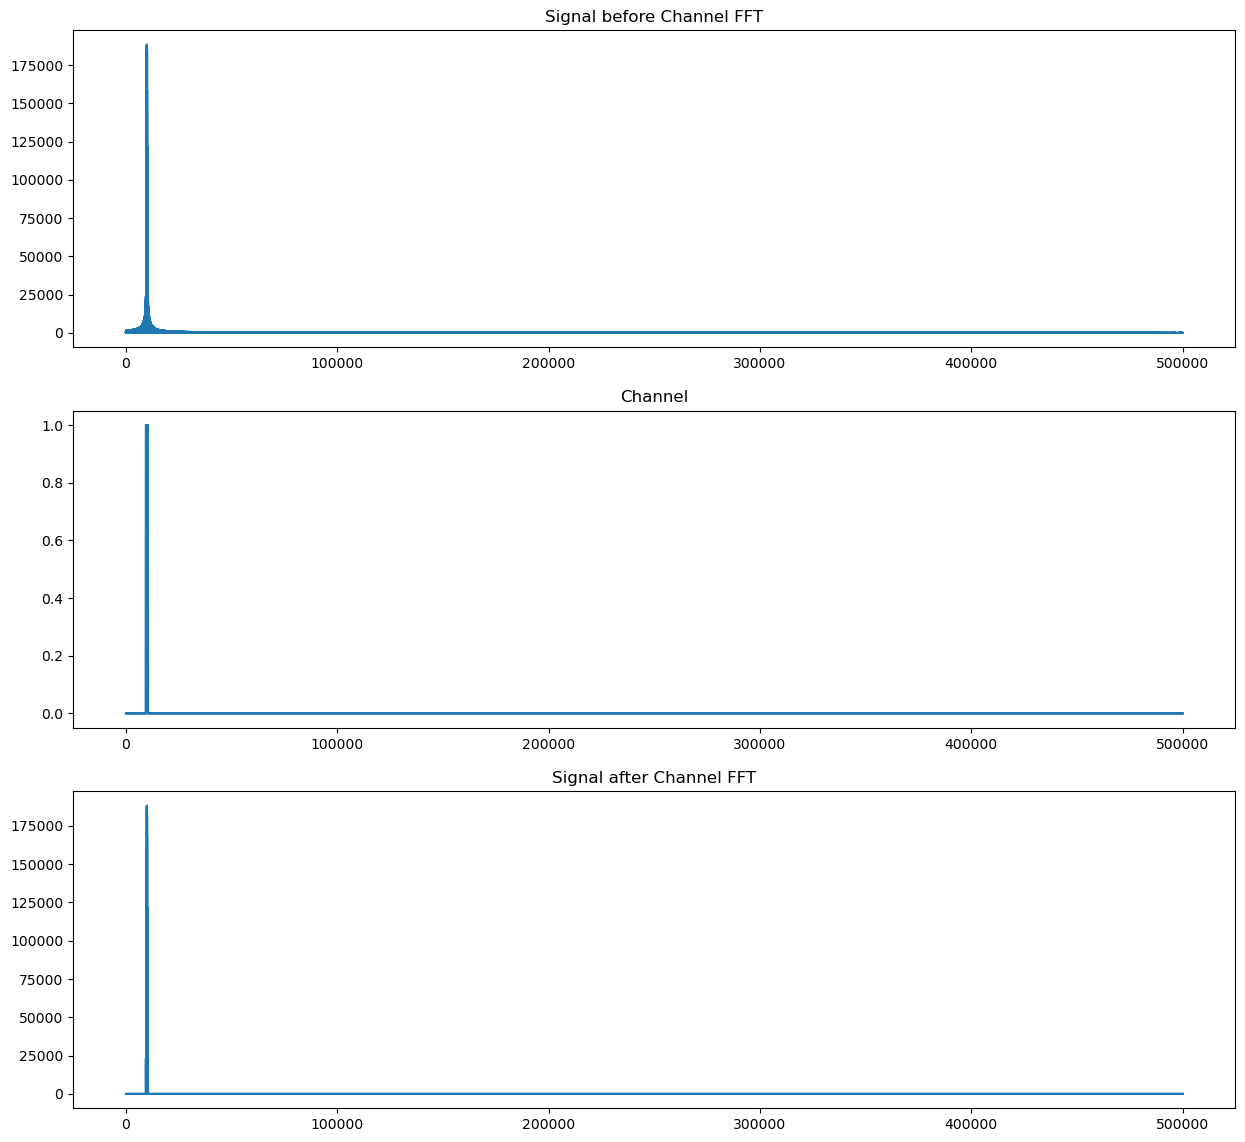

In [114]:
xcr = Channel(xc,fs,f_center,bw)

c:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


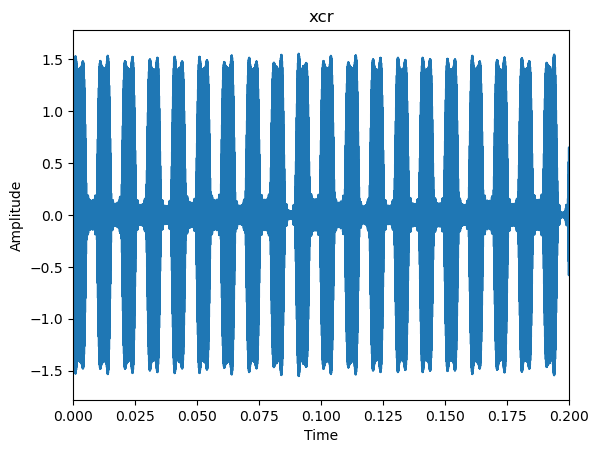

In [115]:
plt.plot(time, xcr)
plt.title('xcr')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(0, 0.2)
plt.show()

output of AnalogDemod

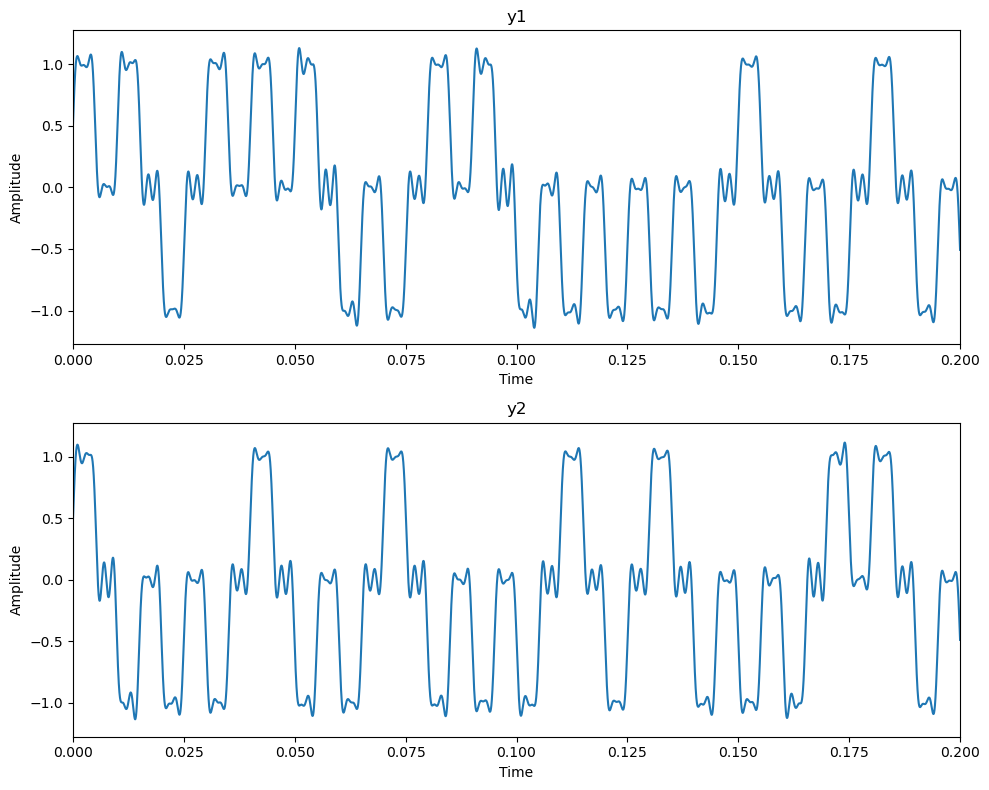

In [116]:
y1 , y2 = AnalogDemod(xcr,fs,fc,bw)

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot y1 in the first subplot
axs[0].plot(time, y1)
axs[0].set_title('y1')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')
axs[0].set_xlim(0, 0.2)  # Set x-axis limits to 0 to 0.5

# Plot y2 in the second subplot
axs[1].plot(time, y2)
axs[1].set_title('y2')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')
axs[1].set_xlim(0, 0.2)  # Set x-axis limits to 0 to 0.5

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


output of MatchedFilter

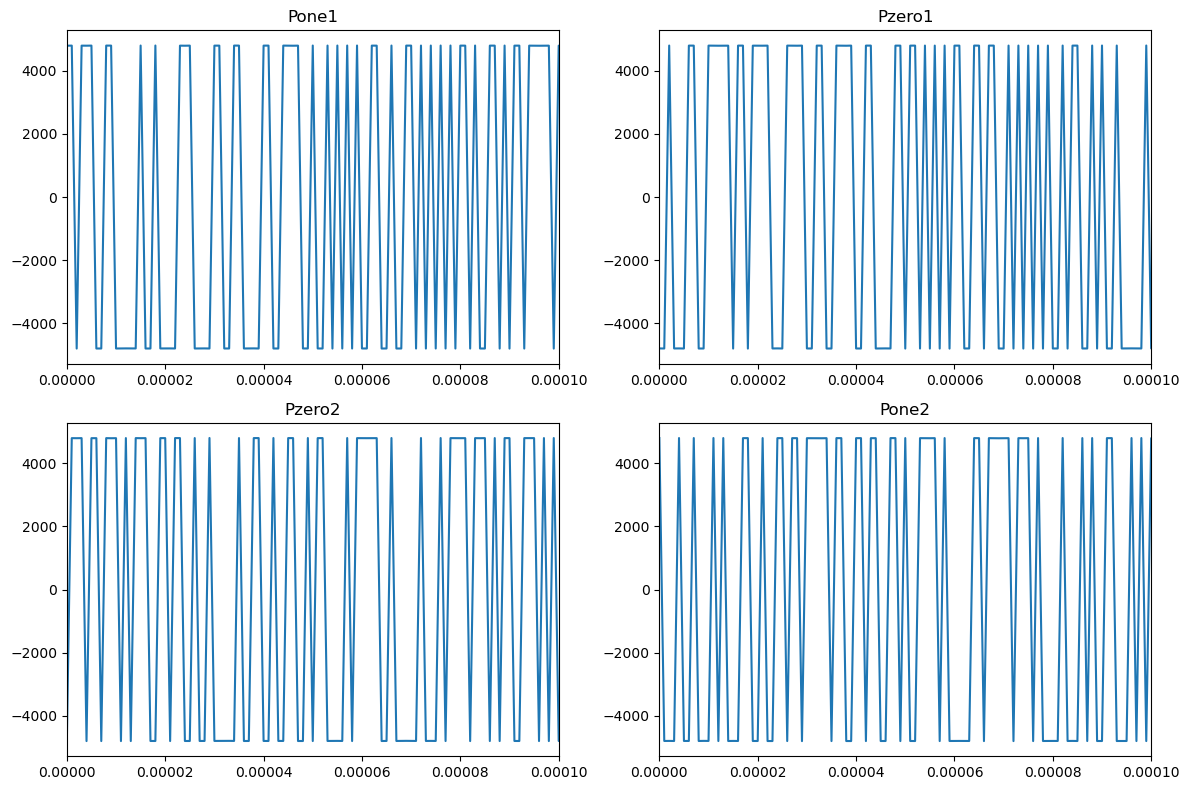

In [117]:
Pone1, Pzero1, bhat1 = MatchedFilt(y1, pulse1, pulse0)
Pone2, Pzero2, bhat2 = MatchedFilt(y2, pulse1, pulse0)

# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Pone1 in the first subplot
axs[0, 0].plot(np.arange(len(Pone1))/fs, Pone1)
axs[0, 0].set_title('Pone1')
axs[0, 0].set_xlim(0, 0.0001)

# Plot Pzero1 in the second subplot
axs[0, 1].plot(np.arange(len(Pzero1))/fs, Pzero1)
axs[0, 1].set_title('Pzero1')
axs[0, 1].set_xlim(0, 0.0001)

# Plot bhat1 in the third subplot
axs[1, 0].plot(np.arange(len(Pzero2))/fs, Pzero2)
axs[1, 0].set_title('Pzero2')
axs[1, 0].set_xlim(0, 0.0001)

# Plot Pone2 in the fourth subplot
axs[1, 1].plot(np.arange(len(Pone2))/fs, Pone2)
axs[1, 1].set_title('Pone2')
axs[1, 1].set_xlim(0, 0.0001)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


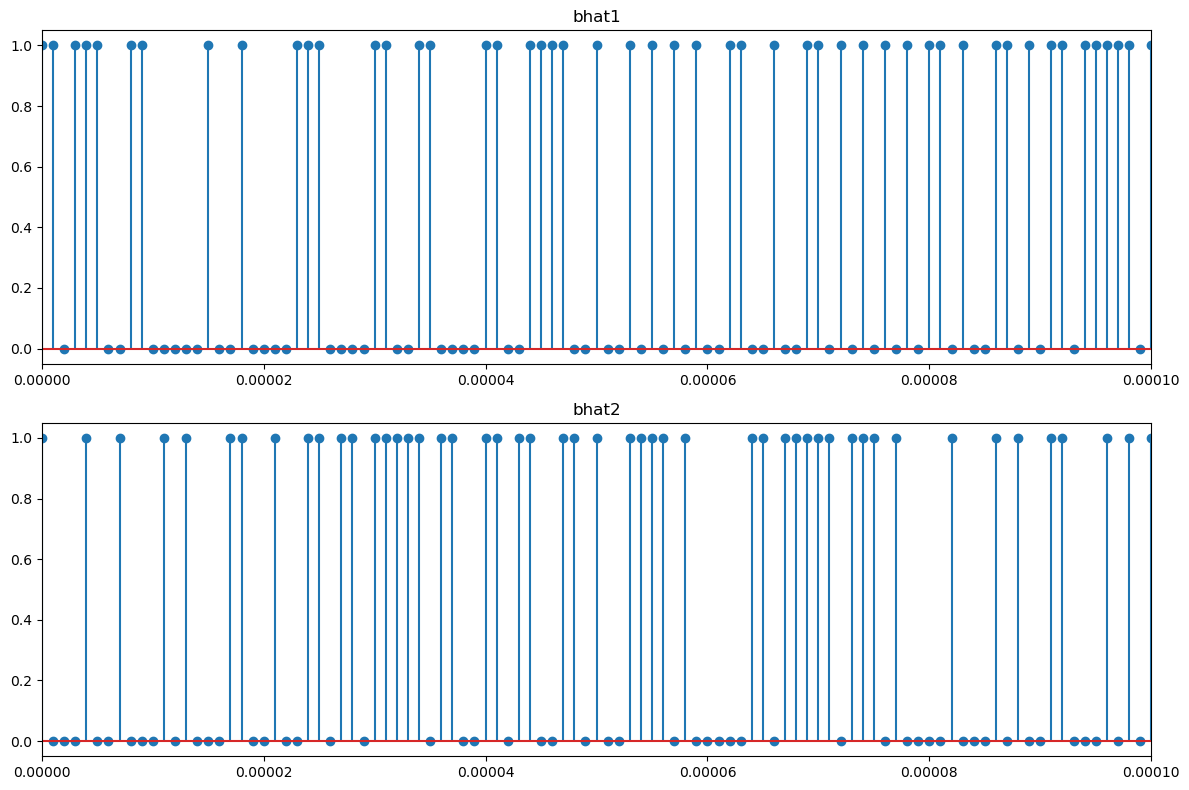

In [118]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].stem(np.arange(len(bhat1))/fs, bhat1)
axs[0].set_title('bhat1')
axs[0].set_xlim(0, 0.0001)

axs[1].stem(np.arange(len(bhat2))/fs, bhat2)
axs[1].set_title('bhat2')
axs[1].set_xlim(0, 0.0001)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


output of Combine

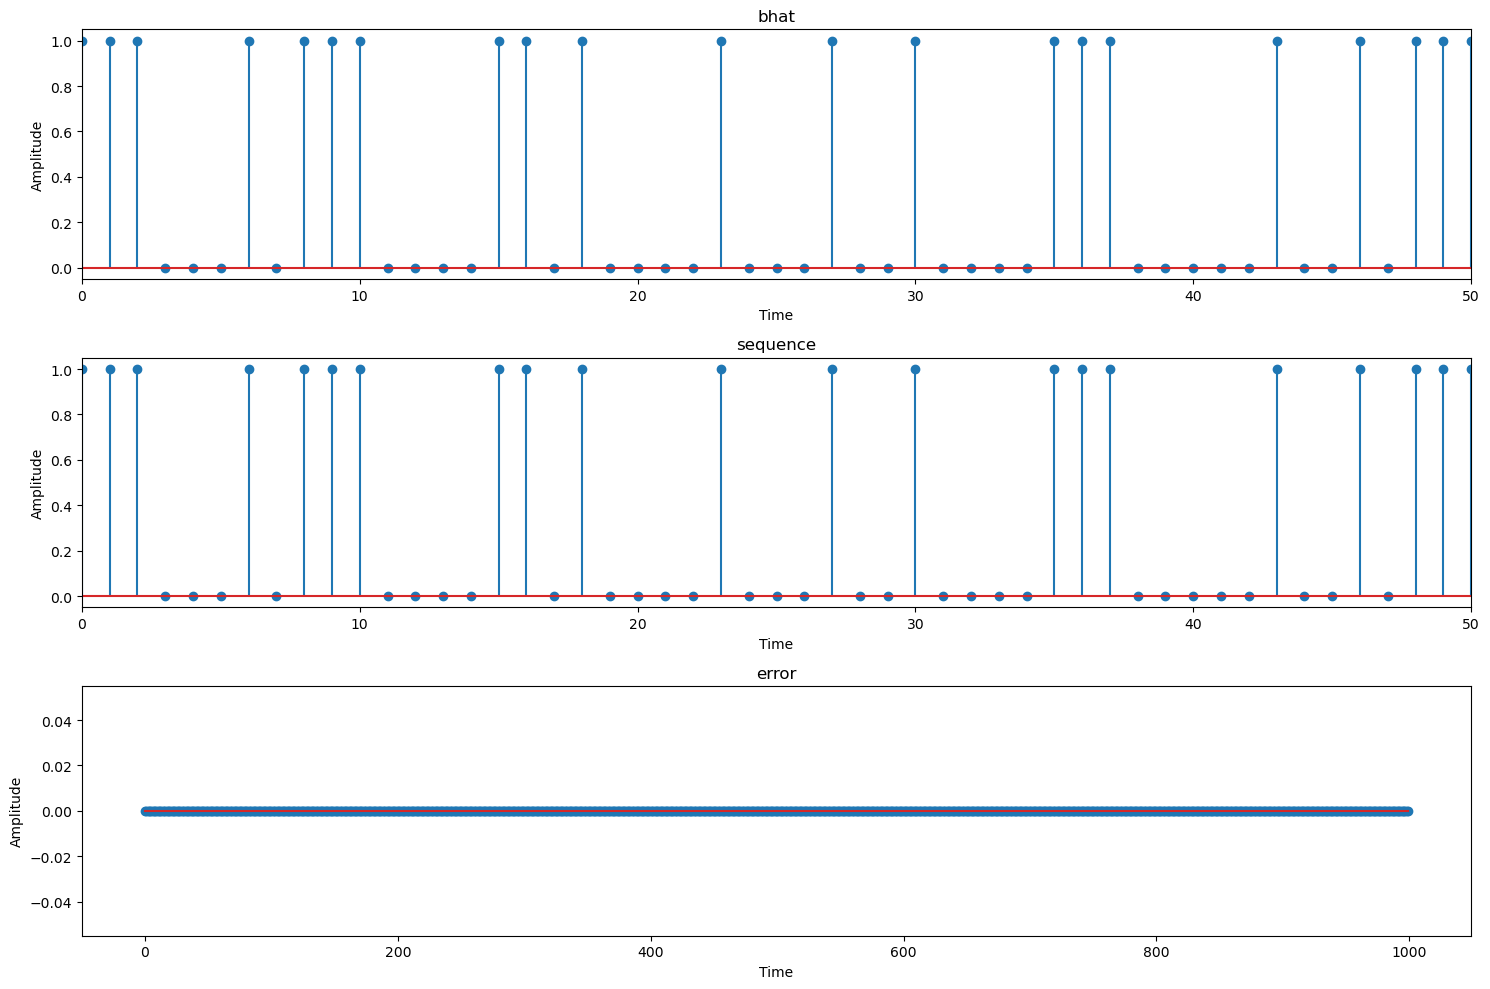

In [120]:
bhat = Combine(bhat1,bhat2)
# Calculate the difference between corresponding elements in bhat and sequence_long
diff = [i - j for i, j in zip(bhat, sequence_long)]

plt.figure(figsize=(15, 10))
plt.subplot(3,1,1)
plt.stem(bhat)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('bhat')
plt.xlim(0, 50)

plt.subplot(3,1,2)
plt.stem(sequence_long)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('sequence')
plt.xlim(0, 50)

plt.subplot(3,1,3)
plt.stem(diff)  # Use the diff list here
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('error')
#plt.xlim(0, 50)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



In [122]:
output255 = OutputDecoder(bhat)
diff255 = [i - j for i, j in zip(output255, input255)]
print(input255)
print(output255)
print(diff255)

[226 225 161  18  28  18 241  79  94  80 241 235  76  55 102  10  89 125
 157 152 166  14  99 202 236 244 127 174 157 231 128  50 198 218 168  18
  67 115 224 165 241 155  18 240 133  83 154 207  47 116 199 137 148 250
 164   8  38 230  46 121 163  80  39  92  80  51  34 242 128 142 152  47
  39  72 188  37 114 222   3 244 151  52 237 177 116  83  61  70 154 115
  99 149 232 228 217 173  95  82 102 200  27  47  74 159  28 105 181 215
  93 149 230 211  73 184  30  85  88  29 111  20  37 197 233  81 218]
[226, 225, 161, 18, 28, 18, 241, 79, 94, 80, 241, 235, 76, 55, 102, 10, 89, 125, 157, 152, 166, 14, 99, 202, 236, 244, 127, 174, 157, 231, 128, 50, 198, 218, 168, 18, 67, 115, 224, 165, 241, 155, 18, 240, 133, 83, 154, 207, 47, 116, 199, 137, 148, 250, 164, 8, 38, 230, 46, 121, 163, 80, 39, 92, 80, 51, 34, 242, 128, 142, 152, 47, 39, 72, 188, 37, 114, 222, 3, 244, 151, 52, 237, 177, 116, 83, 61, 70, 154, 115, 99, 149, 232, 228, 217, 173, 95, 82, 102, 200, 27, 47, 74, 159, 28, 105, 181, 2

# 4.3

adding noise with different variances to the receiving signal

In [123]:
error = []
# Define the parameters for the AWGN
mean = 0  # Mean of the Gaussian distribution
for i in range(50) :
    # Generate the AWGN
    noise = np.random.normal(mean, 4*i, len(xcr))
    xcr_noisy = xcr + noise
    y1_noisy , y2_noisy = AnalogDemod(xcr_noisy,fs,fc,bw)
    _ , _ , bhat1_noisy = MatchedFilt(y1_noisy,pulse1,pulse0)
    _ , _ , bhat2_noisy = MatchedFilt(y2_noisy,pulse1,pulse0)
    bhat_noisy = Combine(bhat1_noisy,bhat2_noisy)
    output255_noisy = OutputDecoder(bhat_noisy)
    error.append(np.var((input255 - output255_noisy) ** 2))

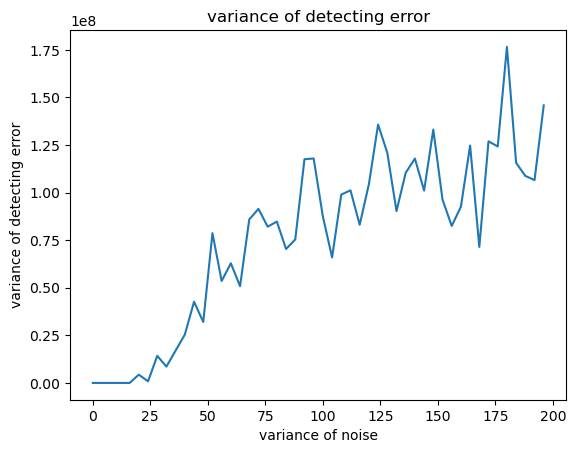

In [125]:
plt.figure()
plt.plot(np.arange(0, 200, 4) , error)
plt.title('variance of detecting error')
plt.xlabel('variance of noise')
plt.ylabel('variance of detecting error')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18748\1808152101.py:13: RuntimeWarning: invalid value encountered in true_divide
  error = error /np.max(error)


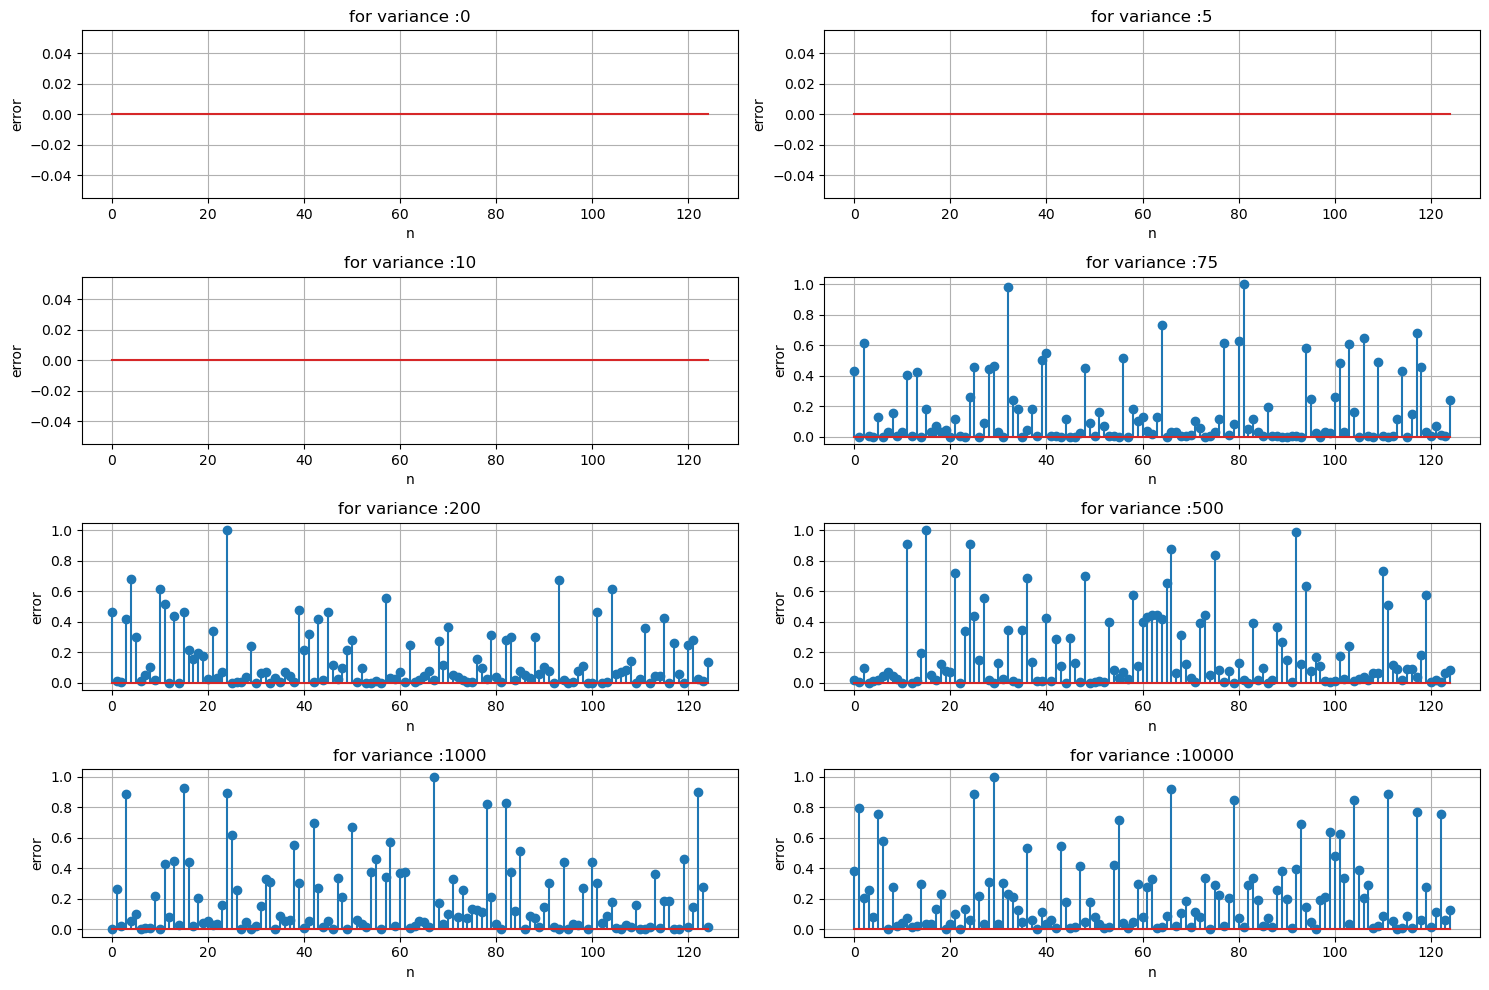

In [129]:
variance = [0,5,10,75,200,500,1000,10000]
countplot = 1
plt.figure(figsize=(15, 10))
for i in variance :
    noise = np.random.normal(mean, i, len(xcr))
    xcr_noisy = xcr + noise
    y1_noisy , y2_noisy = AnalogDemod(xcr_noisy,fs,fc,bw)
    plot1 , _ , bhat1_noisy = MatchedFilt(y1_noisy,pulse1,pulse0)
    plot2 , _ , bhat2_noisy = MatchedFilt(y2_noisy,pulse1,pulse0)
    bhat_noisy = Combine(bhat1_noisy,bhat2_noisy)
    output255_noisy = OutputDecoder(bhat_noisy)
    error = ((input255 - output255_noisy) ** 2)
    error = error /np.max(error)
    plt.subplot(4,2,countplot)
    plt.stem(error)
    string = str(i)
    plt.title('for variance :'+string)
    plt.xlabel('n')
    plt.ylabel('error')
    plt.grid(True)
    countplot = countplot + 1
    
plt.tight_layout()
plt.show()




# 4.4

test with a very large noise variance : 100000000

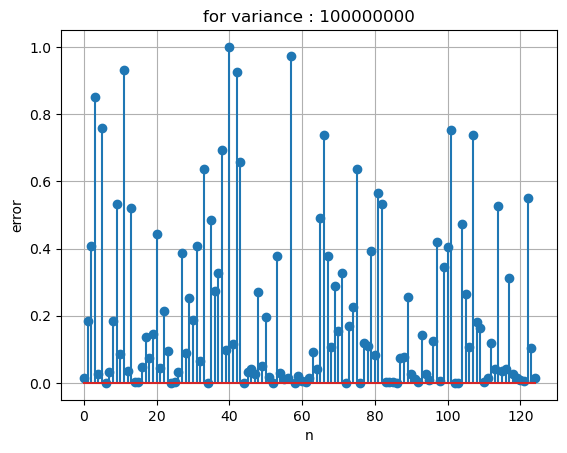

In [130]:
noise = np.random.normal(mean, 100000000, len(xcr))
xcr_noisy = xcr + noise
y1_noisy , y2_noisy = AnalogDemod(xcr_noisy,fs,fc,bw)
plot1 , _ , bhat1_noisy = MatchedFilt(y1_noisy,pulse1,pulse0)
plot2 , _ , bhat2_noisy = MatchedFilt(y2_noisy,pulse1,pulse0)
bhat_noisy = Combine(bhat1_noisy,bhat2_noisy)
output255_noisy = OutputDecoder(bhat_noisy)
error = ((input255 - output255_noisy) ** 2)
error = error /np.max(error)
plt.stem(error)
plt.title('for variance : 100000000')
plt.xlabel('n')
plt.ylabel('error')
plt.grid(True)

# 5.1

In [154]:
def mu_law_companding(signal, mu):
    companded_signal = []
    for s in signal:
        companded_signal.append(np.sign(s) * np.log(1 + mu * np.abs(s)) / np.log(1 + mu))
    return np.array(companded_signal)

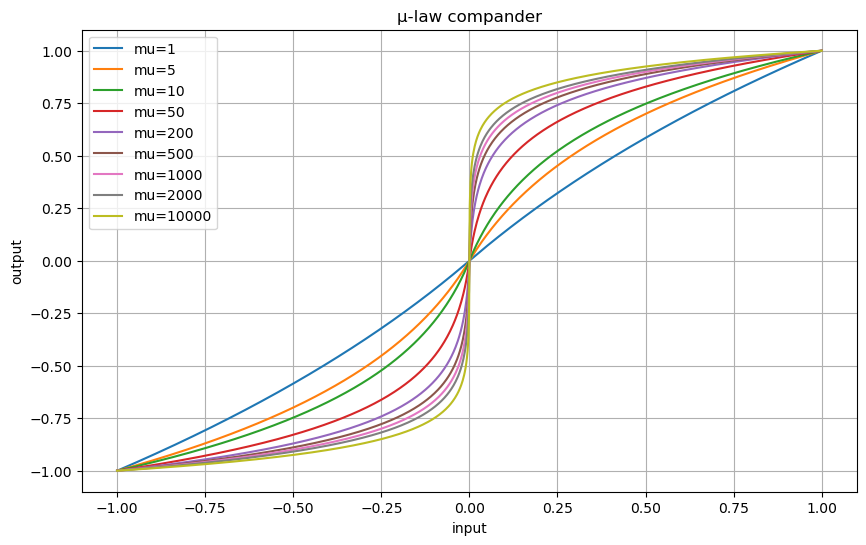

In [155]:
tcomp = np.linspace(-1, 1, 1000)
mus = [1,5,10,50,200,500,1000,2000,10000]
fig, ax = plt.subplots(figsize=(10, 6))
[ax.plot(tcomp, mu_law_companding(tcomp, mu), label=f'mu={mu}') for mu in mus]
ax.set_title('µ-law compander')
ax.set_xlabel('input')
ax.set_ylabel('output')
ax.legend()
ax.grid(True)
plt.show()

# 5.2

# !!notice : dont run the cell below(for recording audio)

In [141]:
# Function to record audio
def audio_recorder(time, sample_rate):
    """Record audio for a specific time and sample rate."""
    recorded_audio = sounddevice.rec(int(time * sample_rate), samplerate=sample_rate, channels=1)
    sounddevice.wait()  # Wait for the recording to end
    return recorded_audio

# Record audio for 20 seconds
audio = audio_recorder(60, 48000)
# Save the recorded audio as a .wav file
wavfile.write('audio.wav', 48000, audio)

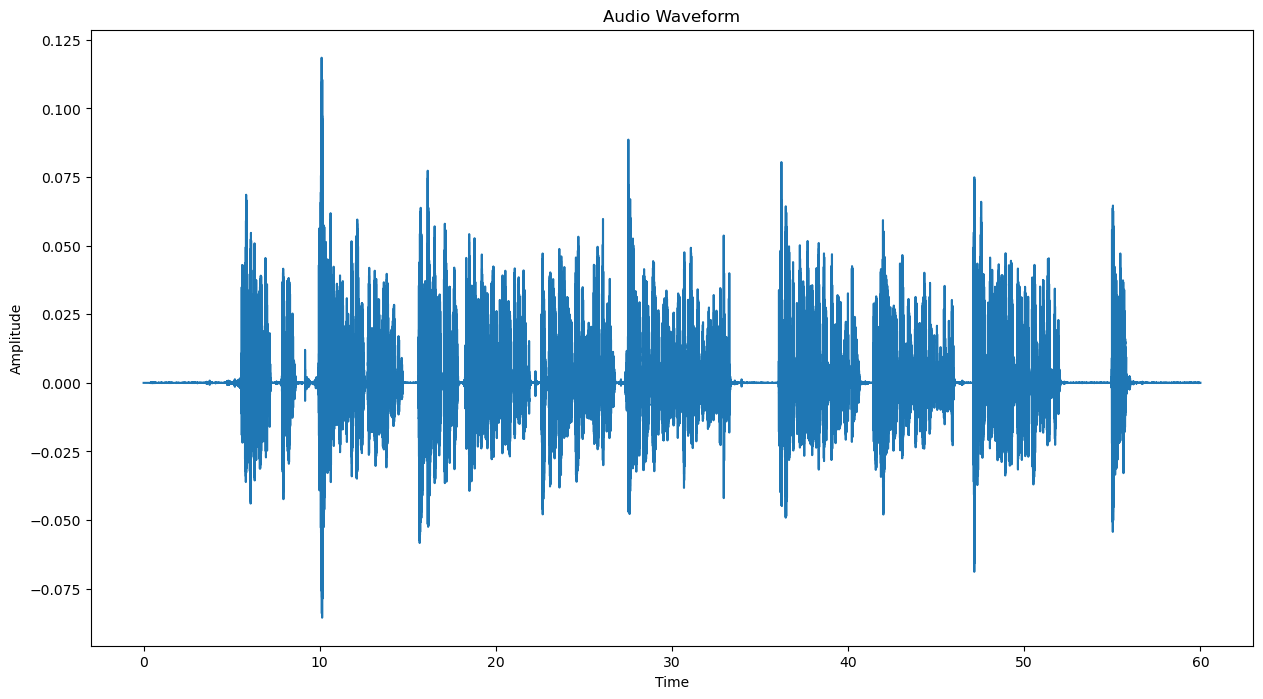

In [146]:
# Load the audio file
sample_rate, audio = wavfile.read('audio.wav')
audio_t = np.arange(0, len(audio))/sample_rate
# Play the audio
sounddevice.play(audio, sample_rate)

# Plot the audio waveform
plt.figure(figsize=(15,8))
plt.plot(audio_t,audio)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()


# 5.3

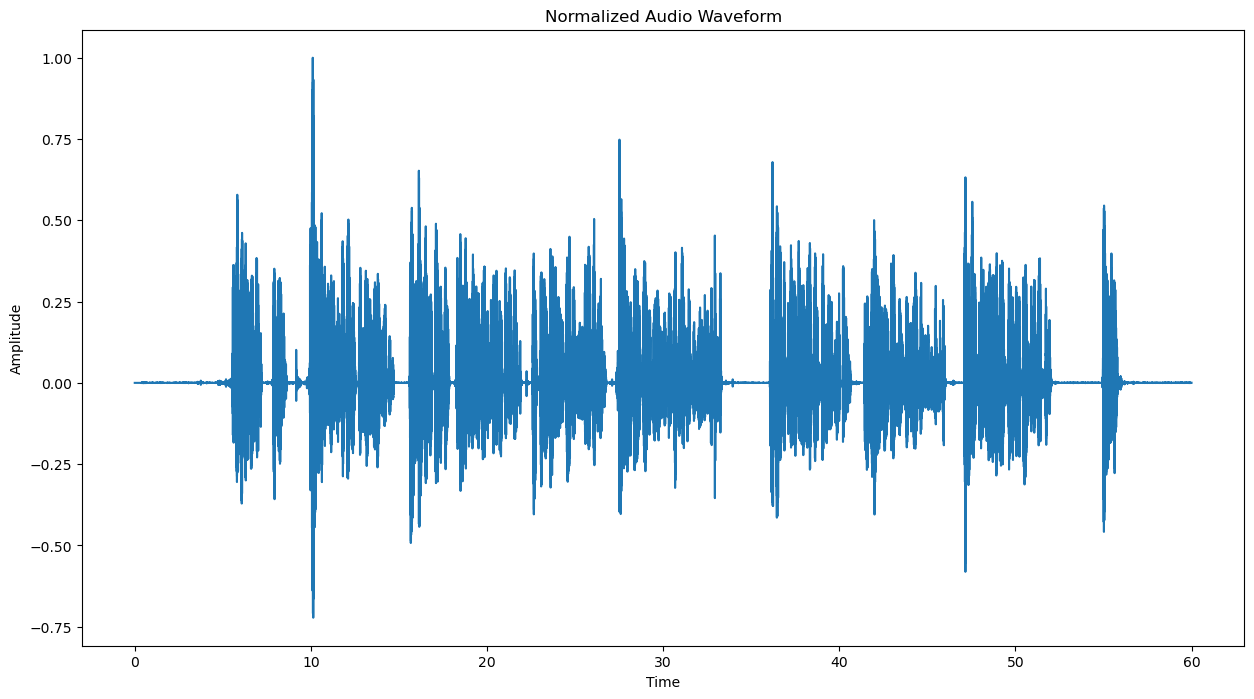

In [157]:
nomralized_audio = audio/np.max(audio)

plt.figure(figsize=(15,8))
plt.plot(audio_t,nomralized_audio)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Normalized Audio Waveform')
plt.show()

calculating audio power

In [150]:
power = np.mean(np.abs(nomralized_audio) ** 2)
power_db = 10 * np.log10(power)
print("Normalized Audio Power (dB):", power_db)

Normalized Audio Power (dB): -24.682424068450928


# 5.4

In [158]:
def ulaw_compressor(signal, mu):
    companded_signal = []
    for s in signal:
        companded_signal.append(np.sign(s) * np.log(1 + mu * np.abs(s)) / np.log(1 + mu))
    return np.array(companded_signal)

# 5.5

In [159]:
def ulaw_expander(companded_signal, mu):
    expanded_signal = []
    for s in companded_signal:
        expanded_signal.append(np.sign(s) * (1 / mu) * ((1 + mu) ** np.abs(s) - 1))
    return np.array(expanded_signal)

# 5.6

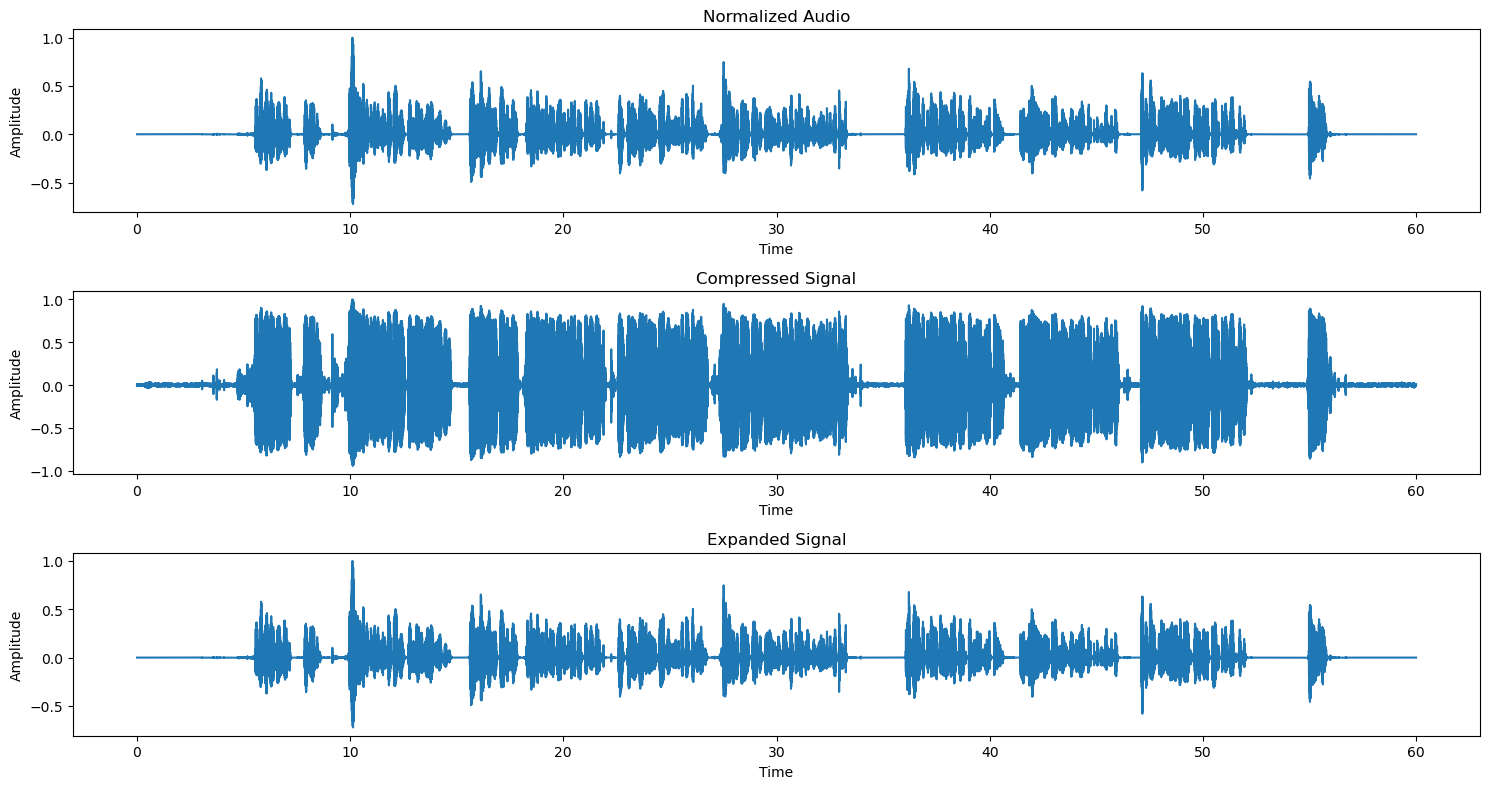

In [161]:
compressed = ulaw_compressor(nomralized_audio,255)
expanded = ulaw_expander(compressed,255)

plt.figure(figsize=(15, 8))

# Plot normalized audio
plt.subplot(3, 1, 1)
plt.plot(audio_t, nomralized_audio)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Normalized Audio')

# Plot compressed signal
plt.subplot(3, 1, 2)
plt.plot(audio_t, compressed)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Compressed Signal')

# Plot expanded signal
plt.subplot(3, 1, 3)
plt.plot(audio_t, expanded)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Expanded Signal')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [164]:
# i wanna use mu = 0 but because we have /mu  in expander function we should use a very very small mu instead of 0
mus = [0.000001,1,5,50,255,2000,10000]
for mu in mus:
    compressed = ulaw_compressor(nomralized_audio,mu)
    expanded = ulaw_expander(compressed,mu)
    rms_error = np.sqrt(np.mean((expanded - nomralized_audio) ** 2))
    string = str(mu)
    print("RMS reconstruction Error for mu = "+string+" : ",rms_error)

RMS reconstruction Error for mu = 1e-06 :  6.221533586197459e-11
RMS reconstruction Error for mu = 1 :  7.401486830834377e-19
RMS reconstruction Error for mu = 5 :  6.230381449772144e-18
RMS reconstruction Error for mu = 50 :  1.025456452771753e-17
RMS reconstruction Error for mu = 255 :  1.7148512870603542e-17
RMS reconstruction Error for mu = 2000 :  2.061682401891981e-17
RMS reconstruction Error for mu = 10000 :  4.548278365211866e-17


# 5.7

In [173]:
def quantizer(signal, num_levels):
    # Calculate the step size for quantization
    step_size = 2 / num_levels
    # Quantize the signal
    quantized_signal = (np.floor(signal / step_size) + 0.5) * step_size
    return quantized_signal

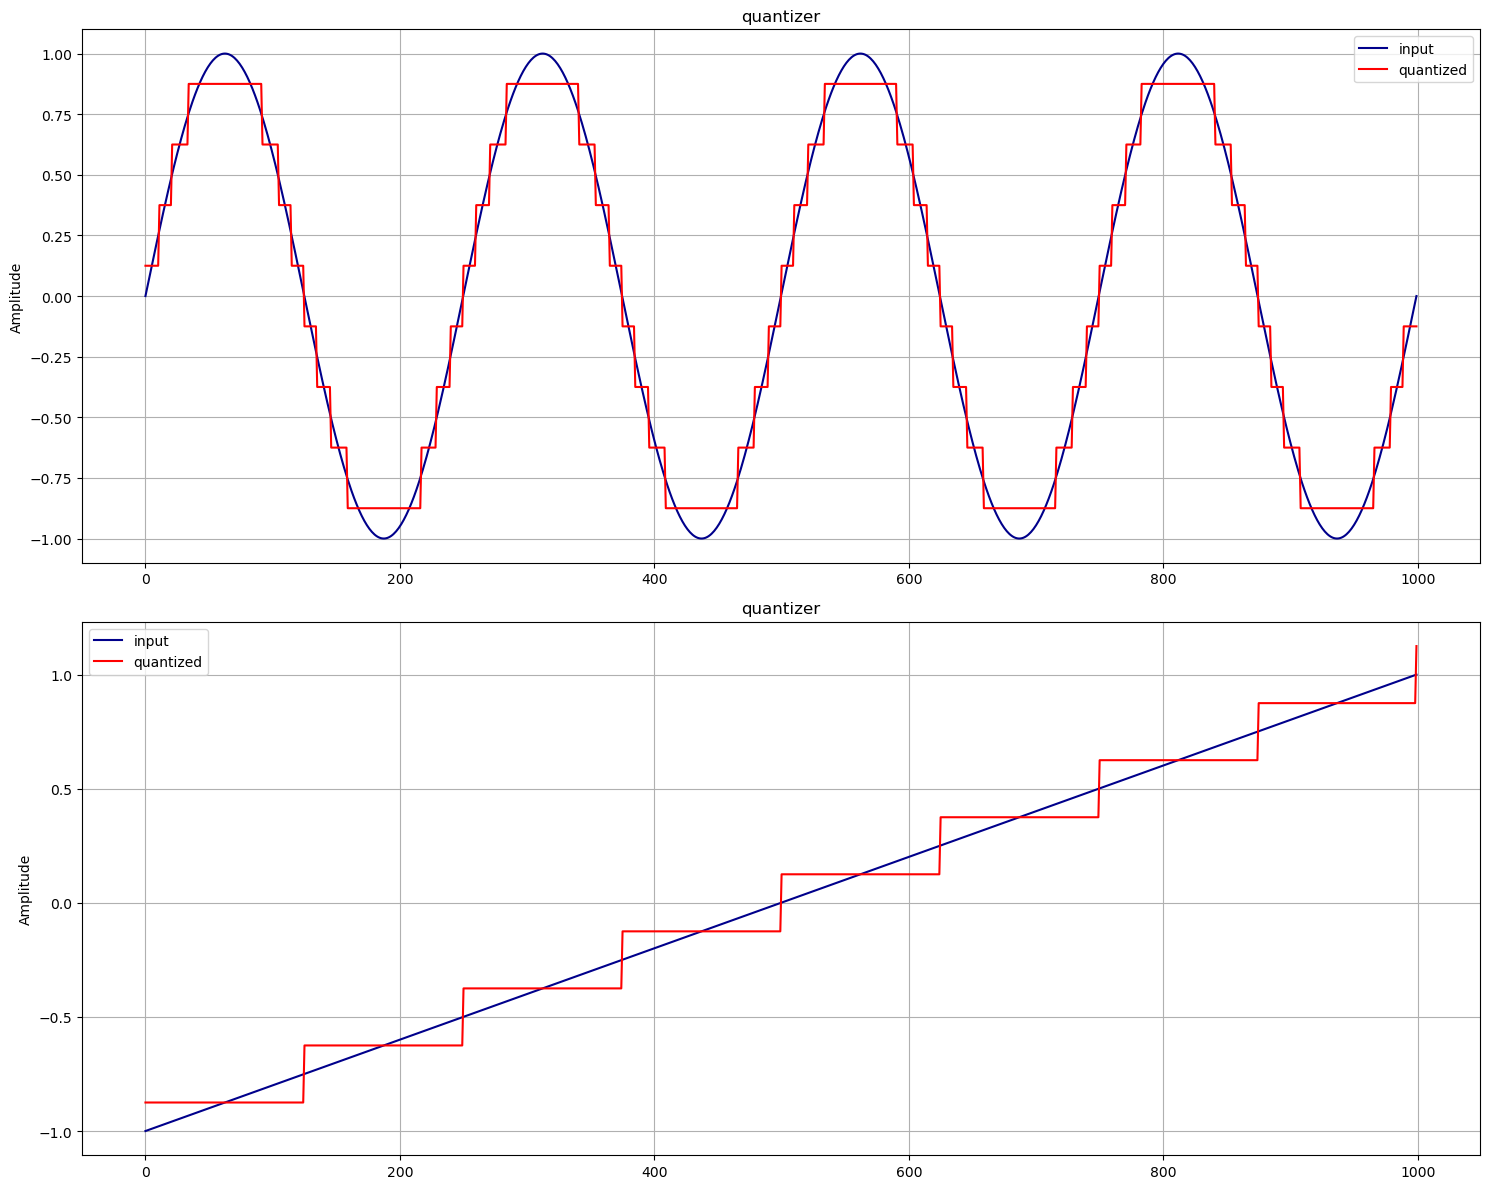

In [180]:
sst = np.linspace(-1, 1, 1000)
ss = np.sin(2*np.pi*2*sst)
L = 8
quantizedss = quantizer(ss, L)
quantizedsst = quantizer(sst, L)

plt.figure(figsize=(15, 12))
plt.subplot(2,1,1)
plt.plot(ss, label='input',color='darkblue')
plt.plot(quantizedss, label='quantized',color='red')
plt.title('quantizer')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(sst, label='input',color='darkblue')
plt.plot(quantizedsst, label='quantized',color='red')
plt.title('quantizer')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

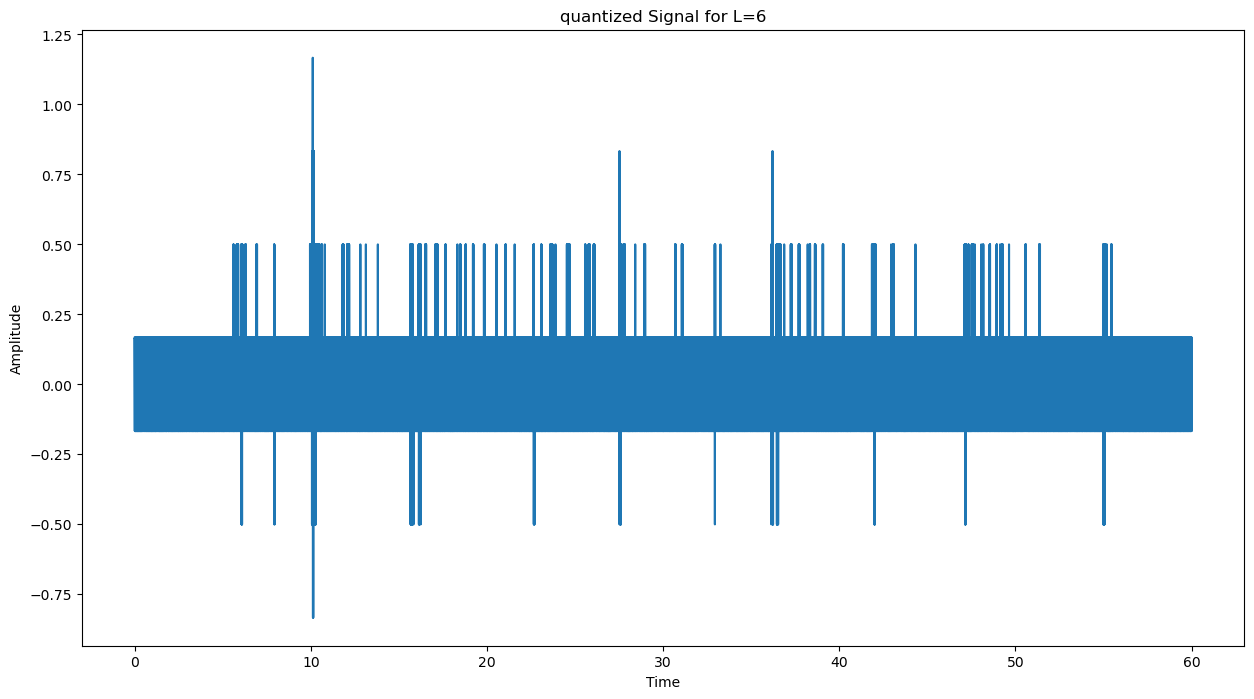

In [200]:
plt.figure(figsize=(15,8))
quantized_test = quantizer(nomralized_audio,6)
plt.plot(audio_t, quantized_test)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('quantized Signal for L=6')
plt.show()

# 5.8

In [185]:
def calculate_snr(input_signal, output_signal):
    # Calculate the power of the input signal
    input_power = np.mean(np.abs(input_signal) ** 2)
    
    # Calculate the power of the quantization error (difference between input and output signals)
    quantization_error = input_signal - output_signal
    quantization_error_power = np.mean(np.abs(quantization_error) ** 2)
    
    # Calculate the SNR in dB
    snr_db = 10 * np.log10(input_power / quantization_error_power)
    
    return snr_db

# Pass the audio signal through the quantizer for different quantization levels
quantization_levels = [4,5,6,7,8]
snr_values = []

for level in quantization_levels:
    quantized_signal = quantizer(nomralized_audio, level)
    snr = calculate_snr(nomralized_audio, quantized_signal)
    snr_values.append(snr)

# Print the SNR values for each quantization level
for level, snr in zip(quantization_levels, snr_values):
    print(f"SNR for quantization level {level}: {snr} dB")


SNR for quantization level 4: -11.792457103729248 dB
SNR for quantization level 5: -9.701957106590271 dB
SNR for quantization level 6: -7.990593910217285 dB
SNR for quantization level 7: -6.546003818511963 dB
SNR for quantization level 8: -5.298458933830261 dB


# 5.9

In [187]:
# Pass the signal through the quantizer for different quantization levels and values of µ
quantization_levels = [4, 5, 6, 7, 8]
mus = [0.000001,1,5,50,255,2000,10000]

for level in quantization_levels:
    for mu in mus:
        # Compress the signal using µ-law compression
        compressed_signal = ulaw_compressor(nomralized_audio, mu)
        
        # Quantize the compressed signal
        quantized_signal = quantizer(compressed_signal, level)
        
        # Expand the quantized signal using µ-law expansion
        expanded_signal = ulaw_expander(quantized_signal, mu)
        
        # Calculate the SNR of the output signal
        snr = calculate_snr(nomralized_audio, expanded_signal)
        
        # Print the SNR value
        print(f"SNR for quantization level {level} and µ value {mu}: {snr} dB")


SNR for quantization level 4 and µ value 1e-06: -11.79245413260728 dB
SNR for quantization level 4 and µ value 1: -9.184991182309803 dB
SNR for quantization level 4 and µ value 5: -4.482252967275084 dB
SNR for quantization level 4 and µ value 50: 0.39156631770368716 dB
SNR for quantization level 4 and µ value 255: -0.19806143581618116 dB
SNR for quantization level 4 and µ value 2000: 0.7346577306423098 dB
SNR for quantization level 4 and µ value 10000: 1.9121751375316365 dB
SNR for quantization level 5 and µ value 1e-06: -9.701950756430133 dB
SNR for quantization level 5 and µ value 1: -6.931559859205602 dB
SNR for quantization level 5 and µ value 5: -2.0937894429723096 dB
SNR for quantization level 5 and µ value 50: 4.106294933995341 dB
SNR for quantization level 5 and µ value 255: 2.9991481228996624 dB
SNR for quantization level 5 and µ value 2000: -3.3398755215567943 dB
SNR for quantization level 5 and µ value 10000: -7.992756434048786 dB
SNR for quantization level 6 and µ value 1e-

# 5.10

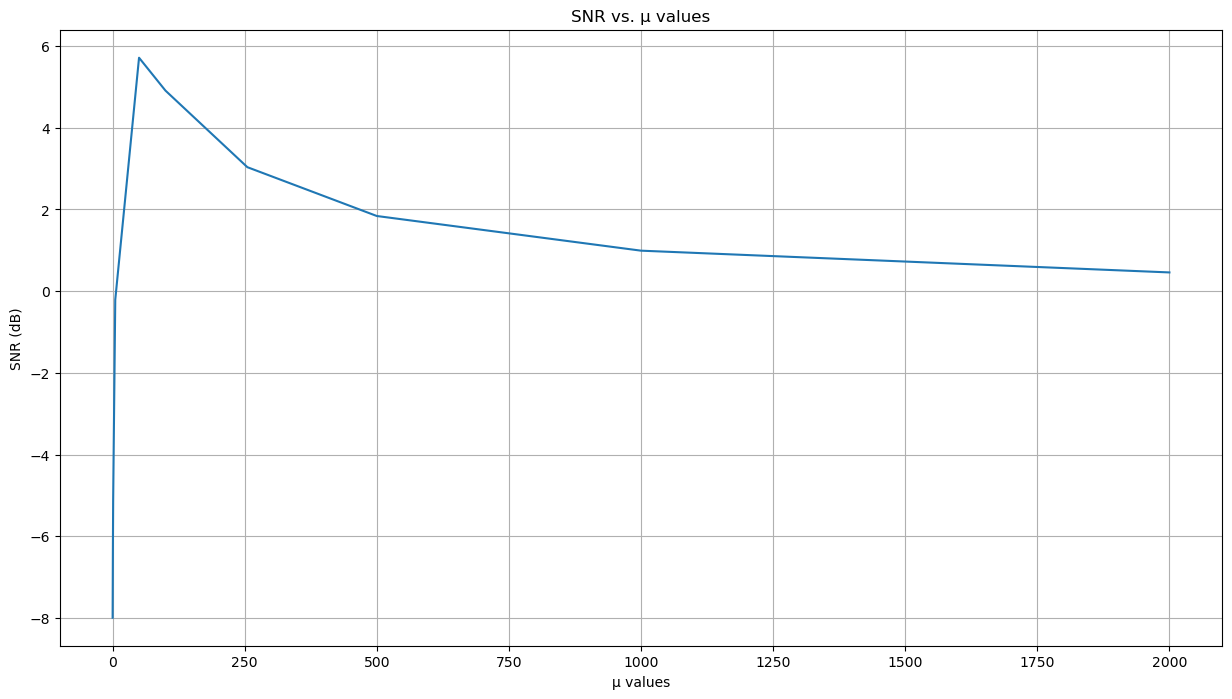

In [204]:
mus = [0.000001,0.5,1,5,50,100,255,500,1000,2000]
snrs = []
for mu in mus:
    # Compress the signal using µ-law compression
    compressed_signal = ulaw_compressor(nomralized_audio, mu)
    
    # Quantize the compressed signal
    quantized_signal = quantizer(compressed_signal, 6)
    
    # Expand the quantized signal using µ-law expansion
    expanded_signal = ulaw_expander(quantized_signal, mu)
    
    # Calculate the SNR of the output signal
    snr = calculate_snr(nomralized_audio, expanded_signal)
    snrs.append(snr)
    

plt.figure(figsize=(15, 8))
plt.plot(mus, snrs)
plt.xlabel('µ values')
plt.ylabel('SNR (dB)')
plt.title('SNR vs. µ values')
plt.grid(True)
plt.show()


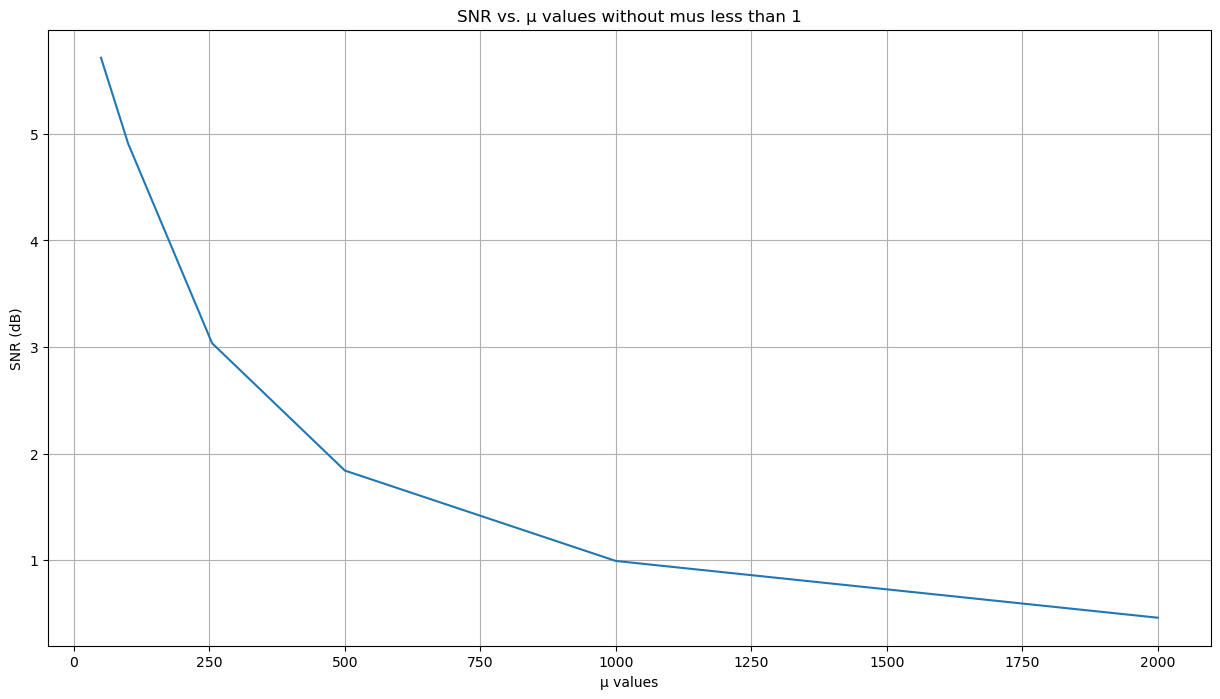

In [205]:
plt.figure(figsize=(15, 8))
plt.plot(mus[4:len(mus)], snrs[4:len(snrs)])
plt.xlabel('µ values')
plt.ylabel('SNR (dB)')
plt.title('SNR vs. µ values without mus less than 1')
plt.grid(True)
plt.show()



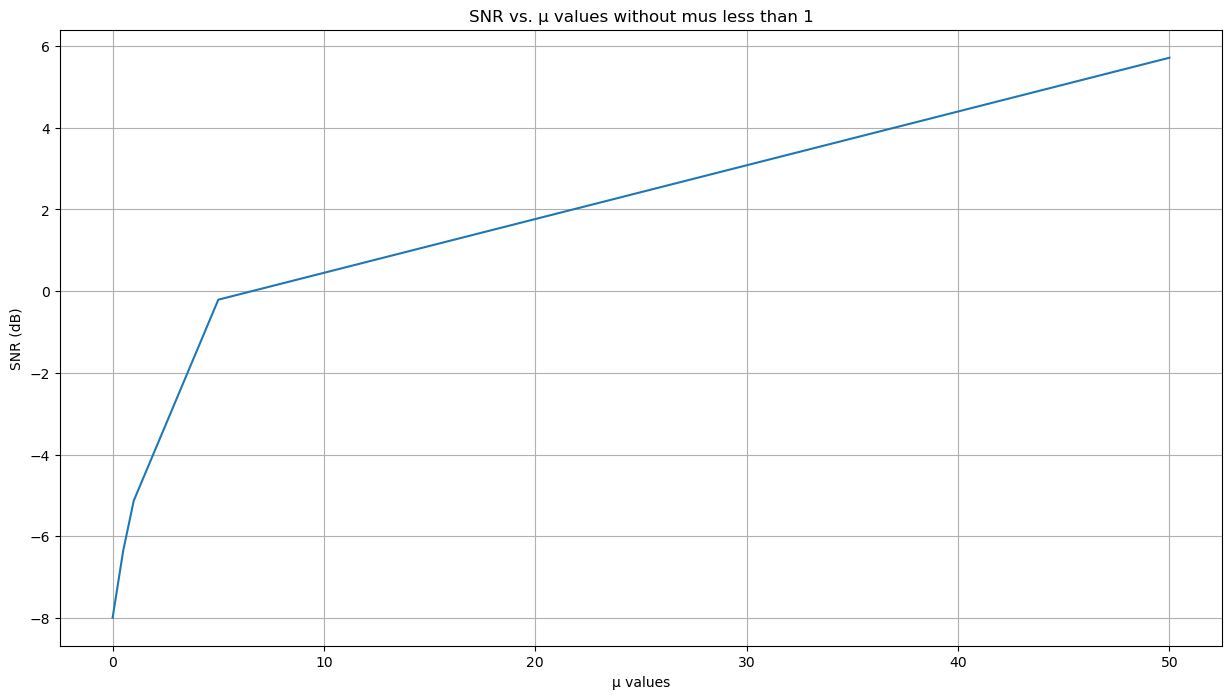

In [208]:
plt.figure(figsize=(15, 8))
plt.plot(mus[:5], snrs[:5])
plt.xlabel('µ values')
plt.ylabel('SNR (dB)')
plt.title('SNR vs. µ values without mus less than 1')
plt.grid(True)
plt.show()



# 5.11

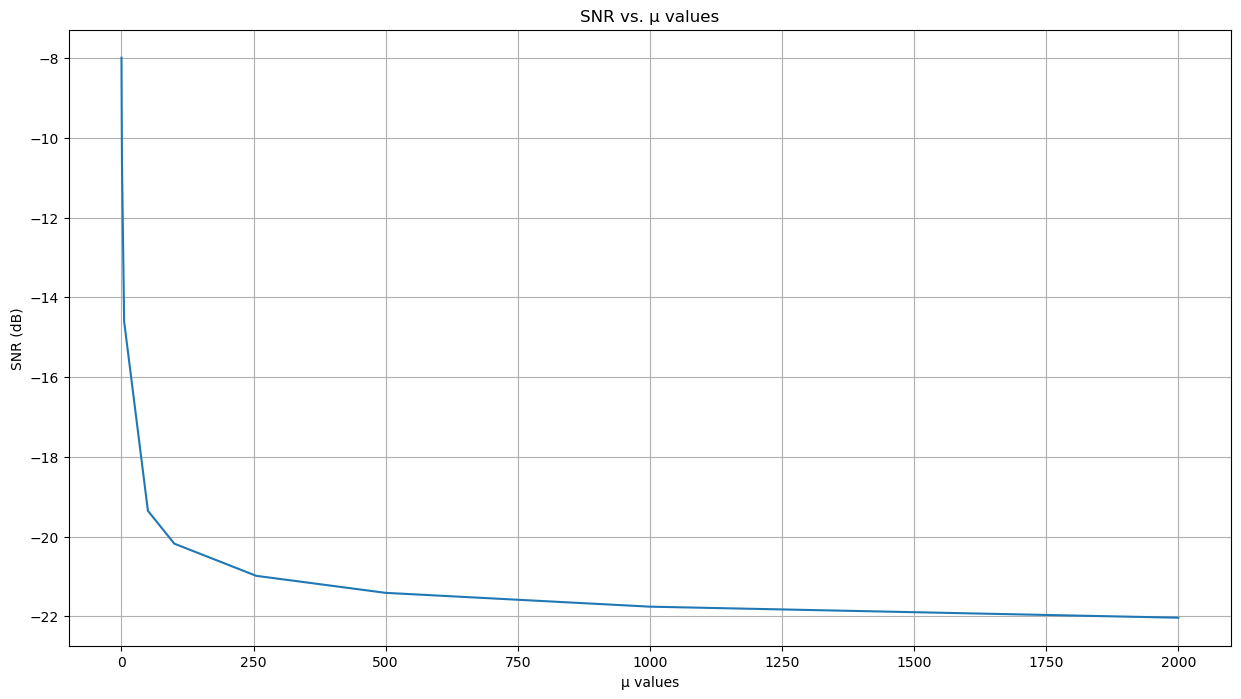

In [198]:
mus = [0.000001,0.5,1,5,50,100,255,500,1000,2000]
snrs = []
for mu in mus:
    # Compress the signal using µ-law compression
    expanded_signal = ulaw_expander(nomralized_audio, mu)
    
    # Quantize the compressed signal
    quantized_signal = quantizer(expanded_signal, 6)
    
    # Expand the quantized signal using µ-law expansion
    compressed_signal = ulaw_compressor(quantized_signal, mu)
    
    # Calculate the SNR of the output signal
    snr = calculate_snr(nomralized_audio, compressed_signal)
    snrs.append(snr)
    

plt.figure(figsize=(15, 8))
plt.plot(mus, snrs)
plt.xlabel('µ values')
plt.ylabel('SNR (dB)')
plt.title('SNR vs. µ values')
plt.grid(True)
plt.show()


In [202]:
snrs

[-7.990596967290009,
 -9.578253495139029,
 -10.69599802587264,
 -14.605695261304097,
 -19.354714774451335,
 -20.179449619446288,
 -20.986034641326974,
 -21.41290394892293,
 -21.759326906256383,
 -22.03676974804111]